<a href="https://colab.research.google.com/github/sheikh495/ComputerSystemsOrganization/blob/main/Computer_Systems_Organization_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class Pipeline:
    def __init__(self):
        self.pipeline = []  # List to hold the instructions in the pipeline
        self.cycles = 0  # Total cycles
        self.instruction_cycles = {}  # Dictionary to store cycles for each instruction
        self.delay_cycles = {}  # Dictionary to store cycles for each type of delay

    def simulate(self, instructions):
        while instructions or self.pipeline:
            self.cycles += 1

            # Write back (WB) stage
            if self.pipeline:
                instruction, remaining_cycles = self.pipeline[-1]
                if remaining_cycles == 1:
                    self.pipeline.pop()
                    self.instruction_cycles[instruction] = self.cycles
                else:
                    self.pipeline[-1] = (instruction, remaining_cycles - 1)

            # Memory Access (MEM) stage
            if len(self.pipeline) >= 2:
                instruction, remaining_cycles = self.pipeline[-2]
                if remaining_cycles == 1:
                    self.pipeline[-2] = (instruction, 0)
                    self.pipeline[-1] = (instruction, instruction.mem_delay)
                else:
                    self.pipeline[-2] = (instruction, remaining_cycles - 1)

            # Execute (EX) stage
            if len(self.pipeline) >= 3:
                instruction, remaining_cycles = self.pipeline[-3]
                if remaining_cycles == 1:
                    self.pipeline[-3] = (instruction, 0)
                    self.pipeline[-2] = (instruction, instruction.mem_delay)
                else:
                    self.pipeline[-3] = (instruction, remaining_cycles - 1)

            # Instruction Decode (ID) stage
            if len(self.pipeline) >= 4:
                instruction, remaining_cycles = self.pipeline[-4]
                if remaining_cycles == 1:
                    self.pipeline[-4] = (instruction, 0)
                    self.pipeline[-3] = (instruction, instruction.ex_delay)
                else:
                    self.pipeline[-4] = (instruction, remaining_cycles - 1)

            # Instruction Fetch (IF) stage
            if instructions:
                instruction = instructions.pop(0)
                self.pipeline.insert(0, (instruction, instruction.if_delay))

            # Update delay_cycles dictionary
            for instruction, remaining_cycles in self.pipeline:
                self.delay_cycles[instruction.type] = max(
                    self.delay_cycles.get(instruction.type, 0), remaining_cycles
                )

    def print_report(self):
        print("Pipeline Configuration:")
        # Add pipeline configuration printing here

        print("\nCycles for Each Instruction:")
        for instruction, cycles in self.instruction_cycles.items():
            print(f"{instruction} -> Cycle {cycles}")

        print("\nCycles for Each Type of Delay:")
        for delay_type, cycles in self.delay_cycles.items():
            print(f"{delay_type} -> {cycles} cycles")


class RISCInstruction:
    def __init__(self, opcode, if_delay, ex_delay, mem_delay, type):
        self.opcode = opcode
        self.if_delay = if_delay
        self.ex_delay = ex_delay
        self.mem_delay = mem_delay
        self.type = type


def main():
    # Example trace of RISC-V instructions, replace with your actual trace
    instructions = [
        RISCInstruction("ADD", 1, 2, 1, "ALU"),
        RISCInstruction("LW", 1, 2, 1, "Load"),
        RISCInstruction("SUB", 1, 2, 1, "ALU"),
        RISCInstruction("SW", 1, 2, 1, "Store"),
        # Add more instructions as needed
    ]

    pipeline = Pipeline()
    pipeline.simulate(instructions)
    pipeline.print_report()
#ADD

def read_pipeline_configuration(file_path):
    with open(file_path, "r") as file:
        config_lines = file.readlines()

    num_reservation_stations = int(config_lines[0].strip())
    num_reorder_buffer_entries = int(config_lines[1].strip())
    return num_reservation_stations, num_reorder_buffer_entries


def main():
    # Read pipeline configuration from the file
    config_file_path = "/content/config.txt"
    num_reservation_stations, num_reorder_buffer_entries = read_pipeline_configuration(
        config_file_path
    )

    # Example trace of RISC-V instructions, replace with your actual trace
    instructions = [
        RISCInstruction("ADD", 1, 2, 1, "ALU"),
        RISCInstruction("LW", 1, 2, 1, "Load"),
        RISCInstruction("SUB", 1, 2, 1, "ALU"),
        RISCInstruction("SW", 1, 2, 1, "Store"),
        # Add more instructions as needed
    ]

    pipeline = Pipeline()
    pipeline.simulate(instructions)
    pipeline.print_report()




if __name__ == "__main__":
    main()


ValueError: ignored

IndentationError: ignored

In [ ]:
NumStages: 5
Stages: IF ID EX MEM WB


In [ ]:
class Pipeline:
    # ... (previous implementation remains unchanged)

    def load_config(self, filename="/content/config.txt"):
        try:
            with open(filename, "r") as file:
                config_lines = file.readlines()
        except FileNotFoundError:
            print(f"Error: Configuration file '{filename}' not found.")
            return False

        try:
            num_stages = int(config_lines[0].strip().split(":")[1].strip())
            stages = config_lines[1].strip().split(":")[1].strip().split()
        except (ValueError, IndexError):
            print("Error: Invalid configuration format in the file.")
            return False

        if num_stages != len(stages):
            print("Error: Number of stages does not match the specified stages.")
            return False

        self.pipeline_stages = stages
        return True

    def print_pipeline_config(self):
        print(f"Number of Pipeline Stages: {len(self.pipeline_stages)}")
        print("Pipeline Stages:", " -> ".join(self.pipeline_stages))


def main():
    pipeline = Pipeline()

    if not pipeline.load_config():
        return

    pipeline.print_pipeline_config()

    # Example trace of RISC-V instructions, replace with your actual trace
    instructions = [
        RISCInstruction("ADD", 1, 2, 1, "ALU"),
        RISCInstruction("LW", 1, 2, 1, "Load"),
        RISCInstruction("SUB", 1, 2, 1, "ALU"),
        RISCInstruction("SW", 1, 2, 1, "Store"),
        # Add more instructions as needed
    ]

    pipeline.simulate(instructions)
    pipeline.print_report()


if __name__ == "__main__":
    main()


Error: Invalid configuration format in the file.


In [ ]:
class Pipeline:
    # ... (rest of the code remains the same)


def read_pipeline_configuration(file_path):
    with open(file_path, "r") as file:
        config_lines = file.readlines()

    num_reservation_stations = int(config_lines[0].strip())
    num_reorder_buffer_entries = int(config_lines[1].strip())
    return num_reservation_stations, num_reorder_buffer_entries


def main():
    # Read pipeline configuration from the file
    config_file_path = "/content/config.txt"
    num_reservation_stations, num_reorder_buffer_entries = read_pipeline_configuration(
        config_file_path
    )

    # Example trace of RISC-V instructions, replace with your actual trace
    instructions = [
        RISCInstruction("ADD", 1, 2, 1, "ALU"),
        RISCInstruction("LW", 1, 2, 1, "Load"),
        RISCInstruction("SUB", 1, 2, 1, "ALU"),
        RISCInstruction("SW", 1, 2, 1, "Store"),
        # Add more instructions as needed
    ]

    pipeline = Pipeline()
    pipeline.simulate(instructions)
    pipeline.print_report()


if __name__ == "__main__":
    main()


IndentationError: ignored

In [ ]:
class ReservationStationEntry:
    def __init__(self, instruction, src_operands, dest_register):
        self.instruction = instruction
        self.src_operands = src_operands
        self.dest_register = dest_register
        self.instruction_status = "AVAILABLE"
        self.execution_cycles_remaining = 0  # Remaining cycles needed for execution


class ReservationStation:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, src_operands, dest_register):
        if len(self.entries) < self.max_entries:
            self.entries.append(ReservationStationEntry(instruction, src_operands, dest_register))

    def find_available_entry(self):
        for entry in self.entries:
            if entry.instruction_status == "AVAILABLE":
                return entry

    def update_status(self, instruction, status):
        for entry in self.entries:
            if entry.instruction == instruction:
                entry.instruction_status = status
                break

    def is_full(self):
        return len(self.entries) == self.max_entries

    def is_empty(self):
        return len(self.entries) == 0


class ReorderBufferEntry:
    def __init__(self, instruction, dest_register):
        self.instruction = instruction
        self.dest_register = dest_register
        self.ready = False


class ReorderBuffer:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, dest_register):
        if len(self.entries) < self.max_entries:
            self.entries.append(ReorderBufferEntry(instruction, dest_register))

    def mark_entry_ready(self, dest_register):
        for entry in self.entries:
            if entry.dest_register == dest_register:
                entry.ready = True
                break


class RISCVProcessor:
    # ... (rest of the code)


class RISCVProcessor:
    def __init__(self, config_file):
        # Initialize pipeline configuration from config_file
        self.pipeline = []
        self.reorder_buffer = ReorderBuffer()
        self.reservation_stations = []

    def read_trace(self, trace_file):
        # Read instructions from trace_file and initialize pipeline with them
   with open(trace_file, 'r') as file:
            for line in file:
                instruction, *operands = line.strip().split()
                dest_register = operands[0] if operands else None
                src_operands = operands[1:] if len(operands) > 1 else []

                entry = ReservationStationEntry(instruction, src_operands, dest_register)
                self.pipeline.append(entry)
    def execute_cycle(self):
        # Execute one cycle in the pipeline

    def run(self):
        # Run the pipeline simulation until all instructions are completed

    def print_results(self):
        # Print the results of the pipeline simulation

    def print_delays(self):
        # Print the number of cycles associated with each type of delay


if __name__ == "__main__":
    config_file = "config.txt"
    trace_file = "trace.dat"

    processor = RISCVProcessor(config_file)
    processor.read_trace(trace_file)
    processor.run()
    processor.print_results()
    processor.print_delays()


IndentationError: ignored

In [ ]:
class ReservationStationEntry:
    def __init__(self, instruction, src_operands, dest_register):
        self.instruction = instruction  # RISC-V instruction
        self.src_operands = src_operands  # Source operands (register names or values)
        self.dest_register = dest_register  # Destination register name (if applicable)
        self.instruction_status = "AVAILABLE"  # Instruction status (e.g., "ISSUED", "EXECUTING", "COMPLETED")
        self.execution_cycles_remaining = 0  # Remaining execution cycles for the instruction


class ReservationStation:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, src_operands, dest_register):
        # Add a new entry to the reservation station if space is available
        if len(self.entries) < self.max_entries:
            entry = ReservationStationEntry(instruction, src_operands, dest_register)
            self.entries.append(entry)

    def find_available_entry(self):
        # Find an available entry in the reservation station to issue an instruction
        for entry in self.entries:
            if entry.instruction_status == "AVAILABLE":
                return entry
        return None

    def update_status(self, instruction, status):
        # Update the status of an instruction in the reservation station
        for entry in self.entries:
            if entry.instruction == instruction:
                entry.instruction_status = status
                break

    def is_full(self):
        # Check if the reservation station is full
        return len(self.entries) == self.max_entries

    def is_empty(self):
        # Check if the reservation station is empty
        return len(self.entries) == 0


class ReorderBufferEntry:
    def __init__(self, instruction, dest_register):
        self.instruction = instruction
        self.dest_register = dest_register


class ReorderBuffer:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, dest_register):
        # Add a new entry to the reorder buffer if space is available
        if len(self.entries) < self.max_entries:
            entry = ReorderBufferEntry(instruction, dest_register)
            self.entries.append(entry)

    def remove_completed_entries(self):
        # Remove completed entries from the reorder buffer
        self.entries = [entry for entry in self.entries if entry.instruction.instruction_status != "COMPLETED"]

    def is_empty(self):
        # Check if the reorder buffer is empty
        return len(self.entries) == 0


class RISCVProcessor:
    def __init__(self, config_file):
        # Initialize pipeline configuration from config_file
        self.pipeline = []
        self.reorder_buffer = ReorderBuffer(max_entries=10)  # You can adjust the max_entries as per config
        self.reservation_stations = ReservationStation(max_entries=10)  # You can adjust the max_entries as per config

    def read_trace(self, trace_file):
        # Read instructions from trace_file and initialize pipeline with them
        with open(trace_file, 'r') as file:
            for line in file:
                instruction, *operands = line.strip().split()
                dest_register = operands[0] if operands else None
                src_operands = operands[1:] if len(operands) > 1 else []

                entry = ReservationStationEntry(instruction, src_operands, dest_register)
                self.pipeline.append(entry)

    def execute_cycle(self):
        # Execute one cycle in the pipeline
        # Update the reservation stations, reorder buffer, and other pipeline stages

      def run(self):

        # Run the pipeline simulation until all instructions are completed
        cycles = 0
        while not self.is_all_completed():
            self.execute_cycle()
            cycles += 1


    def is_all_completed(self):
        # Check if all instructions are completed
        return all(entry.instruction_status == "COMPLETED" for entry in self.pipeline)

    def print_results(self):
        # Print the results of the pipeline simulation
        print("===== Results of the Pipeline Simulation =====")
        for cycle, entry in enumerate(self.pipeline):
            print(f"Cycle {cycle + 1}:")
            print(f"Instruction: {entry.instruction}")
            print(f"Source Operands: {entry.src_operands}")
            print(f"Destination Register: {entry.dest_register}")
            print(f"Status: {entry.instruction_status}")
            print("--------------------------------------------")

    def print_delays(self):
        # Print the number of cycles associated with each type of delay
        print("===== Number of Cycles for Each Type of Delay =====")
        # You need to implement the logic to calculate the delays based on the pipeline simulation.
        # For example, you can track and count the cycles spent in different stages for each instruction type.
        # Then, print the calculated delays for each type of instruction (class, data transfer, arithmetic, etc.).
        # Example:
        print("Class Instruction Delays: Load 5 cycles, Store 5 cycles, Arithmetic 3 cycles")
        print("Data Transfer Instruction Delays: lw 6 cycles, sw 7 cycles, flw 7 cycles, fsw 8 cycles")
        print("Arithmetic Instruction Delays: add 3 cycles, sub 3 cycles")
        # ... and so on


if __name__ == "__main__":
    config_file = "/content/config.txt"
    trace_file = "/content/trace.dat"

    processor = RISCVProcessor(config_file)
    processor.read_trace(trace_file)
    processor.run()
    processor.print_results()
    processor.print_delays()


AttributeError: ignored

#V 0

In [ ]:
class ReservationStationEntry:
    def __init__(self, instruction, src_operands, dest_register):
        self.instruction = instruction  # RISC-V instruction
        self.src_operands = src_operands  # Source operands (register names or values)
        self.dest_register = dest_register  # Destination register name (if applicable)
        self.instruction_status = "AVAILABLE"  # Instruction status (e.g., "ISSUED", "EXECUTING", "COMPLETED")
        self.execution_cycles_remaining = 0  # Remaining execution cycles for the instruction


class ReservationStation:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, src_operands, dest_register):
        # Add a new entry to the reservation station if space is available
        if len(self.entries) < self.max_entries:
            entry = ReservationStationEntry(instruction, src_operands, dest_register)
            self.entries.append(entry)

    def find_available_entry(self):
        # Find an available entry in the reservation station to issue an instruction
        for entry in self.entries:
            if entry.instruction_status == "AVAILABLE":
                return entry
        return None

    def update_status(self, instruction, status):
        # Update the status of an instruction in the reservation station
        for entry in self.entries:
            if entry.instruction == instruction:
                entry.instruction_status = status
                break

    def is_full(self):
        # Check if the reservation station is full
        return len(self.entries) == self.max_entries

    def is_empty(self):
        # Check if the reservation station is empty
        return len(self.entries) == 0


class ReorderBufferEntry:
    def __init__(self, instruction, dest_register):
        self.instruction = instruction
        self.dest_register = dest_register


class ReorderBuffer:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, dest_register):
        # Add a new entry to the reorder buffer if space is available
        if len(self.entries) < self.max_entries:
            entry = ReorderBufferEntry(instruction, dest_register)
            self.entries.append(entry)

    def remove_completed_entries(self):
        # Remove completed entries from the reorder buffer
        self.entries = [entry for entry in self.entries if entry.instruction.instruction_status != "COMPLETED"]

    def is_empty(self):
        # Check if the reorder buffer is empty
        return len(self.entries) == 0


class RISCVProcessor:
     def __init__(self, config_file):
        # Initialize pipeline configuration from config_file
        self.pipeline = []
        self.reorder_buffer = ReorderBuffer(max_entries=10)  # You can adjust the max_entries as per config
        self.reservation_stations = ReservationStation(max_entries=10)  # You can adjust the max_entries as per config


     def read_trace(self, trace_file):
        # Read instructions from trace_file and initialize pipeline with them
        with open(trace_file, 'r') as file:
            for line in file:
                instruction, *operands = line.strip().split()
                dest_register = operands[0] if operands else None
                src_operands = operands[1:] if len(operands) > 1 else []

                entry = ReservationStationEntry(instruction, src_operands, dest_register)
                self.pipeline.append(entry)

     def execute_cycle(self):
        # Execute one cycle in the pipeline
        # Update the reservation stations, reorder buffer, and other pipeline stages

      def run(self):

        # Run the pipeline simulation until all instructions are completed
        cycles = 0
        while not self.is_all_completed():
            self.execute_cycle()
            cycles += 1

        self.print_results()
        self.print_delays()


     def is_all_completed(self):
        # Check if all instructions are completed
        return all(entry.instruction_status == "COMPLETED" for entry in self.pipeline)


     def print_results(self):
        # Print the results of the pipeline simulation
        print("===== Results of the Pipeline Simulation =====")
        for cycle, entry in enumerate(self.pipeline):
            print(f"Cycle {cycle + 1}:")
            print(f"Instruction: {entry.instruction}")
            print(f"Source Operands: {entry.src_operands}")
            print(f"Destination Register: {entry.dest_register}")
            print(f"Status: {entry.instruction_status}")
            print("--------------------------------------------")

     def print_delays(self):
        # Print the number of cycles associated with each type of delay
        print("===== Number of Cycles for Each Type of Delay =====")
        # You need to implement the logic to calculate the delays based on the pipeline simulation.
        # For example, you can track and count the cycles spent in different stages for each instruction type.
        # Then, print the calculated delays for each type of instruction (class, data transfer, arithmetic, etc.).
        # Example:
        print("Class Instruction Delays: Load 5 cycles, Store 5 cycles, Arithmetic 3 cycles")
        print("Data Transfer Instruction Delays: lw 6 cycles, sw 7 cycles, flw 7 cycles, fsw 8 cycles")
        print("Arithmetic Instruction Delays: add 3 cycles, sub 3 cycles")
        # ... and so on


if __name__ == "__main__":
    config_file = "/content/config.txt"
    trace_file = "/content/trace.dat"

    processor = RISCVProcessor(config_file)
    processor.read_trace(trace_file)
    #processor.run()
    processor.print_results()
    processor.print_delays()

===== Results of the Pipeline Simulation =====
Cycle 1:
Instruction: flw
Source Operands: []
Destination Register: f6,32(x2):0
Status: AVAILABLE
--------------------------------------------
Cycle 2:
Instruction: flw
Source Operands: []
Destination Register: f2,48(x3):4
Status: AVAILABLE
--------------------------------------------
Cycle 3:
Instruction: fmul.s
Source Operands: []
Destination Register: f0,f2,f4
Status: AVAILABLE
--------------------------------------------
Cycle 4:
Instruction: fsub.s
Source Operands: []
Destination Register: f8,f6,f2
Status: AVAILABLE
--------------------------------------------
Cycle 5:
Instruction: fdiv.s
Source Operands: []
Destination Register: f10,f0,f6
Status: AVAILABLE
--------------------------------------------
Cycle 6:
Instruction: fadd.s
Source Operands: []
Destination Register: f6,f8,f2
Status: AVAILABLE
--------------------------------------------
===== Number of Cycles for Each Type of Delay =====
Class Instruction Delays: Load 5 cycles, S

#v1

In [212]:
class ReservationStationEntry:
    def __init__(self, instruction, src_operands, dest_register):
        self.instruction = instruction  # RISC-V instruction
        self.src_operands = src_operands  # Source operands (register names or values)
        self.dest_register = dest_register  # Destination register name (if applicable)
        self.instruction_status = "AVAILABLE"  # Instruction status (e.g., "ISSUED", "EXECUTING", "COMPLETED")
        self.execution_cycles_remaining = 0  # Remaining execution cycles for the instruction


class ReservationStation:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, src_operands, dest_register):
        # Add a new entry to the reservation station if space is available
        if len(self.entries) < self.max_entries:
            entry = ReservationStationEntry(instruction, src_operands, dest_register)
            self.entries.append(entry)

    def find_available_entry(self):
        # Find an available entry in the reservation station to issue an instruction
        for entry in self.entries:
            if entry.instruction_status == "AVAILABLE":
                return entry
        return None

    def update_status(self, instruction, status):
        # Update the status of an instruction in the reservation station
        for entry in self.entries:
            if entry.instruction == instruction:
                entry.instruction_status = status
                break

    def is_full(self):
        # Check if the reservation station is full
        return len(self.entries) == self.max_entries

    def is_empty(self):
        # Check if the reservation station is empty
        return len(self.entries) == 0


class ReorderBufferEntry:
    def __init__(self, instruction, dest_register):
        self.instruction = instruction
        self.dest_register = dest_register


class ReorderBuffer:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, dest_register):
        # Add a new entry to the reorder buffer if space is available
        if len(self.entries) < self.max_entries:
            entry = ReorderBufferEntry(instruction, dest_register)
            self.entries.append(entry)

    def remove_completed_entries(self):
        # Remove completed entries from the reorder buffer
        self.entries = [entry for entry in self.entries if entry.instruction.instruction_status != "COMPLETED"]

    def is_empty(self):
        # Check if the reorder buffer is empty
        return len(self.entries) == 0


class RISCVProcessor:
    def __init__(self, config_file):
        self.pipeline = []
        self.reorder_buffer = ReorderBuffer(max_entries=10)
        self.reservation_stations = ReservationStation(max_entries=10)
        self.latencies = {}
        self.load_configuration(config_file)

    def load_configuration(self, config_file):
        with open(config_file, 'r') as file:
            config_data = file.readlines()

        buffers_section = False
        latencies_section = False
        for line in config_data:
            line = line.strip()
            if not line:
                continue

            if line == "buffers:":
                buffers_section = True
                latencies_section = False
                continue
            elif line == "latencies:":
                buffers_section = False
                latencies_section = True
                continue

            if buffers_section:
                key, value = map(str.strip, line.split(':'))
                if key == 'eff addr':
                    self.reservation_stations = ReservationStation(max_entries=int(value))
                elif key == 'fp adds':
                    pass  # Add your implementation for fp adds
                elif key == 'fp muls':
                    pass  # Add your implementation for fp muls
                elif key == 'ints':
                    pass  # Add your implementation for ints
                elif key == 'reorder':
                    self.reorder_buffer = ReorderBuffer(max_entries=int(value))
            elif latencies_section:
                key, value = map(str.strip, line.split(':'))
                self.latencies[key] = int(value)


    def read_trace(self, trace_file):
        # Read instructions from trace_file and initialize pipeline with them
        with open(trace_file, 'r') as file:
            for line in file:
                instruction, *operands = line.strip().split()
                dest_register = operands[0] if operands else None
                src_operands = operands[1:] if len(operands) > 1 else []

                entry = ReservationStationEntry(instruction, src_operands, dest_register)
                self.pipeline.append(entry)

    def execute_cycle(self):
        # Execute one cycle in the pipeline
        # Update the reservation stations, reorder buffer, and other pipeline stages
# Execute one cycle in the pipeline
        for entry in self.pipeline:
            # Check if the instruction is in the "EXECUTING" state and decrement remaining execution cycles
            if entry.instruction_status == "EXECUTING":
                entry.execution_cycles_remaining -= 1

                # If the instruction has completed execution, update its status to "COMPLETED"
                if entry.execution_cycles_remaining == 0:
                    entry.instruction_status = "COMPLETED"

                    # Update the destination register value in the reorder buffer and reservation stations
                    if entry.dest_register is not None:
                        dest_register_value = 42  # You need to implement the logic to get the actual value
                        self.update_reorder_buffer(entry.instruction, entry.dest_register, dest_register_value)
                        self.update_reservation_stations(entry.instruction, entry.dest_register, dest_register_value)

        # Update the reservation stations and reorder buffer
        self.update_reservation_stations()
        self.update_reorder_buffer()
        def run(self):

        # Run the pipeline simulation until all instructions are completed
         cycles = 0
        while not self.is_all_completed():
            self.execute_cycle()
            cycles += 1

        self.print_results()
        self.print_delays()



    def is_all_completed(self):
        # Check if all instructions are completed
        #return all(entry.instruction_status == "COMPLETED" for entry in self.pipeline)
        return all(entry.instruction_status == "COMPLETED" for entry in self.pipeline)



    def print_results(self):
        # Print the results of the pipeline simulation
        print("Pipeline Simulation")
        print("-" * 60)
        print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
            "Memory Writes", "Issues", "Executes", "Read", "Result", "Commits", "Instructions"
        ))
        print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
            "---------------------", "------", "--------", "------", "------", "-------", "-------------"
        ))
        for entry in self.pipeline:
            print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
                f"{entry.instruction} {', '.join(entry.src_operands)}:{entry.execution_cycles_remaining}",
                "-", "-", "-", "-", "-", entry.instruction_status
            ))
        print()
    def print_delays(self):
        # Print the number of cycles associated with each type of delay
         print("Delays")
         print("-" * 6)
         print("reorder buffer delays: 0")
         print("reservation station delays: 0")
         print("data memory conflict delays: 0")
        # Calculate the true dependence delays based on the pipeline simulation.
        # Example:
         print("true dependence delays: 11")


if __name__ == "__main__":
    config_file = "/content/config.txt"
    trace_file = "/content/trace.dat"

    print("Configuration")
    print("-------------")
    # Read and print the pipeline configuration from config_file
    with open(config_file, 'r') as file:
        config = file.read()
        print(config)

    # Read the content of the trace file
with open(trace_file, 'r') as file:
    trace_content = file.read()
    print("Trace Content:")
    print(trace_content)
    processor = RISCVProcessor(config_file)
    processor.read_trace(trace_file)
   # processor.run()
    processor.print_results()
    processor.print_delays()

Configuration
-------------
buffers

eff addr: 2
fp adds: 3
fp muls: 3
ints: 2
reorder: 5

latencies

fp_add: 2
fp_sub: 2
fp_mul: 5
fp_div: 10


Trace Content:
flw    f6,32(x2):0
flw    f2,48(x3):4
fmul.s f0,f2,f4
fsub.s f8,f6,f2
fdiv.s f10,f0,f6
fadd.s f6,f8,f2

Pipeline Simulation
------------------------------------------------------------
Memory Writes        Issues  Executes Read    Result  Commits Instructions
--------------------- ------  -------- ------  ------  ------- -------------
flw :0               -       -        -       -       -       AVAILABLE
flw :0               -       -        -       -       -       AVAILABLE
fmul.s :0            -       -        -       -       -       AVAILABLE
fsub.s :0            -       -        -       -       -       AVAILABLE
fdiv.s :0            -       -        -       -       -       AVAILABLE
fadd.s :0            -       -        -       -       -       AVAILABLE

Delays
------
reorder buffer delays: 0
reservation station delays: 0
d

#V2

In [214]:
class ReservationStationEntry:
    def __init__(self, instruction, src_operands, dest_register):
        self.instruction = instruction  # RISC-V instruction
        self.src_operands = src_operands  # Source operands (register names or values)
        self.dest_register = dest_register  # Destination register name (if applicable)
        self.instruction_status = "AVAILABLE"  # Instruction status (e.g., "ISSUED", "EXECUTING", "COMPLETED")
        self.execution_cycles_remaining = 0  # Remaining execution cycles for the instruction


class ReservationStation:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, src_operands, dest_register):
        # Add a new entry to the reservation station if space is available
        if len(self.entries) < self.max_entries:
            entry = ReservationStationEntry(instruction, src_operands, dest_register)
            self.entries.append(entry)

    def find_available_entry(self):
        # Find an available entry in the reservation station to issue an instruction
        for entry in self.entries:
            if entry.instruction_status == "AVAILABLE":
                return entry
        return None

    def update_status(self, instruction, status):
        # Update the status of an instruction in the reservation station
        for entry in self.entries:
            if entry.instruction == instruction:
                entry.instruction_status = status
                break

    def is_full(self):
        # Check if the reservation station is full
        return len(self.entries) == self.max_entries

    def is_empty(self):
        # Check if the reservation station is empty
        return len(self.entries) == 0


class ReorderBufferEntry:
    def __init__(self, instruction, dest_register):
        self.instruction = instruction
        self.dest_register = dest_register


class ReorderBuffer:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, dest_register):
        # Add a new entry to the reorder buffer if space is available
        if len(self.entries) < self.max_entries:
            entry = ReorderBufferEntry(instruction, dest_register)
            self.entries.append(entry)

    def remove_completed_entries(self):
        # Remove completed entries from the reorder buffer
        self.entries = [entry for entry in self.entries if entry.instruction.instruction_status != "COMPLETED"]

    def is_empty(self):
        # Check if the reorder buffer is empty
        return len(self.entries) == 0


class RISCVProcessor:
    def __init__(self, config_file):
        self.pipeline = []
        self.reorder_buffer = ReorderBuffer(max_entries=10)
        self.reservation_stations = ReservationStation(max_entries=10)
        self.latencies = {}
        self.load_configuration(config_file)

    def load_configuration(self, config_file):
        with open(config_file, 'r') as file:
            config_data = file.readlines()

        buffers_section = False
        latencies_section = False
        for line in config_data:
            line = line.strip()
            if not line:
                continue

            if line == "buffers:":
                buffers_section = True
                latencies_section = False
                continue
            elif line == "latencies:":
                buffers_section = False
                latencies_section = True
                continue

            if buffers_section:
                key, value = map(str.strip, line.split(':'))
                if key == 'eff addr':
                    self.reservation_stations = ReservationStation(max_entries=int(value))
                elif key == 'fp adds':
                    pass  # Add your implementation for fp adds
                elif key == 'fp muls':
                    pass  # Add your implementation for fp muls
                elif key == 'ints':
                    pass  # Add your implementation for ints
                elif key == 'reorder':
                    self.reorder_buffer = ReorderBuffer(max_entries=int(value))
            elif latencies_section:
                key, value = map(str.strip, line.split(':'))
                self.latencies[key] = int(value)

#P1
    def read_trace(self, trace_file):
        # Read instructions from trace_file and initialize pipeline with them
        with open(trace_file, 'r') as file:
            for line in file:
                instruction, *operands = line.strip().split()
                dest_register = operands[0] if operands else None
                src_operands = operands[1:] if len(operands) > 1 else []

                entry = ReservationStationEntry(instruction, src_operands, dest_register)
                self.pipeline.append(entry)

    def execute_cycle(self):
        # Execute one cycle in the pipeline
        # Update the reservation stations, reorder buffer, and other pipeline stages
        # Step 1: Issue instructions to the reservation stations
        for entry in self.pipeline:
            if entry.instruction_status == "ISSUED":
                if entry.instruction == "lw" or entry.instruction == "flw":
                    # Handle load instructions (e.g., check for address calculation)
                    # You need to implement this part based on the pipeline logic
                    entry.instruction_status = "EXECUTING"
                elif entry.instruction == "sw" or entry.instruction == "fsw":
                    # Handle store instructions (e.g., check for address calculation)
                    # You need to implement this part based on the pipeline logic
                    entry.instruction_status = "EXECUTING"
                else:
                    # Handle other instructions (arithmetic and control)
                    rs_entry = self.reservation_stations.find_available_entry()
                    if rs_entry:
                        # Assign the instruction to an available reservation station entry
                        rs_entry.instruction = entry.instruction
                        rs_entry.src_operands = entry.src_operands
                        rs_entry.dest_register = entry.dest_register
                        rs_entry.instruction_status = "EXECUTING"
                        entry.instruction_status = "EXECUTING"

        # Step 2: Update instruction statuses in the reservation stations and reorder buffer
        for rs_entry in self.reservation_stations.entries:
            if rs_entry.instruction_status == "EXECUTING":
                # Check if the instruction has completed execution (you need to implement this part)
                if rs_entry.execution_cycles_remaining == 0:
                    rs_entry.instruction_status = "COMPLETED"

        for rb_entry in self.reorder_buffer.entries:
            # Update the status of instructions in the reorder buffer
            if rb_entry.instruction.instruction_status == "COMPLETED":
                rb_entry.instruction_status = "COMMITTED"

        # Step 3: Update the status of instructions in the pipeline and commit completed instructions
        for entry in self.pipeline:
            if entry.instruction_status == "EXECUTING":
                # Update execution cycles remaining for executing instructions
                entry.execution_cycles_remaining -= 1
                if entry.execution_cycles_remaining == 0:
                    entry.instruction_status = "COMPLETED"

            if entry.instruction_status == "COMPLETED":
                # Commit completed instructions (you need to implement this part)
                # Update the architectural register file and handle data dependencies
                entry.instruction_status = "COMMITTED"

        # Update the reorder buffer by removing committed instructions
        self.reorder_buffer.remove_completed_entries()

        # Update the reservation stations by removing completed instructions
        self.reservation_stations.remove_completed_entries()
# Execute one cycle in the pipeline
        for entry in self.pipeline:
            # Check if the instruction is in the "EXECUTING" state and decrement remaining execution cycles
            if entry.instruction_status == "EXECUTING":
                entry.execution_cycles_remaining -= 1

                # If the instruction has completed execution, update its status to "COMPLETED"
                if entry.execution_cycles_remaining == 0:
                    entry.instruction_status = "COMPLETED"

                    # Update the destination register value in the reorder buffer and reservation stations
                    if entry.dest_register is not None:
                        dest_register_value = 42  # You need to implement the logic to get the actual value
                        self.update_reorder_buffer(entry.instruction, entry.dest_register, dest_register_value)
                        self.update_reservation_stations(entry.instruction, entry.dest_register, dest_register_value)

        # Update the reservation stations and reorder buffer
        self.update_reservation_stations()
        self.update_reorder_buffer()
        def run(self):

        # Run the pipeline simulation until all instructions are completed
         cycles = 0
        while not self.is_all_completed():
            self.execute_cycle()
            cycles += 1

        self.print_results()
        self.print_delays()



    def is_all_completed(self):
        # Check if all instructions are completed
        #return all(entry.instruction_status == "COMPLETED" for entry in self.pipeline)
        return all(entry.instruction_status == "COMPLETED" for entry in self.pipeline)



    def print_results(self):
        # Print the results of the pipeline simulation
        print("Pipeline Simulation")
        print("-" * 60)
        print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
            "Memory Writes", "Issues", "Executes", "Read", "Result", "Commits", "Instructions"
        ))
        print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
            "---------------------", "------", "--------", "------", "------", "-------", "-------------"
        ))
        for entry in self.pipeline:
            print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
                f"{entry.instruction} {', '.join(entry.src_operands)}:{entry.execution_cycles_remaining}",
                "-", "-", "-", "-", "-", entry.instruction_status
            ))
        print()
    def print_delays(self):
        # Print the number of cycles associated with each type of delay
         print("Delays")
         print("-" * 6)
         print("reorder buffer delays: 0")
         print("reservation station delays: 0")
         print("data memory conflict delays: 0")
        # Calculate the true dependence delays based on the pipeline simulation.
        # Example:
         print("true dependence delays: 11")


if __name__ == "__main__":
    config_file = "/content/config.txt"
    trace_file = "/content/trace.dat"

    print("Configuration")
    print("-------------")
    # Read and print the pipeline configuration from config_file
    with open(config_file, 'r') as file:
        config = file.read()
        print(config)

    # Read the content of the trace file
with open(trace_file, 'r') as file:
    trace_content = file.read()
    print("Trace Content:")
    print(trace_content)
    processor = RISCVProcessor(config_file)
    processor.read_trace(trace_file)
   # processor.run()
    processor.print_results()
    processor = Processor(config_file)
    processor.read_trace(trace_file)
    processor.process_instructions()
    #processor.print_simulation_results()
    processor.print_delays()
    processor.print_delays()

Configuration
-------------
buffers

eff addr: 2
fp adds: 3
fp muls: 3
ints: 2
reorder: 5

latencies

fp_add: 2
fp_sub: 2
fp_mul: 5
fp_div: 10


Trace Content:
flw    f6,32(x2):0
flw    f2,48(x3):4
fmul.s f0,f2,f4
fsub.s f8,f6,f2
fdiv.s f10,f0,f6
fadd.s f6,f8,f2

Pipeline Simulation
------------------------------------------------------------
Memory Writes        Issues  Executes Read    Result  Commits Instructions
--------------------- ------  -------- ------  ------  ------- -------------
flw :0               -       -        -       -       -       AVAILABLE
flw :0               -       -        -       -       -       AVAILABLE
fmul.s :0            -       -        -       -       -       AVAILABLE
fsub.s :0            -       -        -       -       -       AVAILABLE
fdiv.s :0            -       -        -       -       -       AVAILABLE
fadd.s :0            -       -        -       -       -       AVAILABLE


Delays
------------------------------
reorder buffer delays: 2
reserv

#V3

In [215]:
class ReservationStationEntry:
    def __init__(self, instruction, src_operands, dest_register):
        self.instruction = instruction  # RISC-V instruction
        self.src_operands = src_operands  # Source operands (register names or values)
        self.dest_register = dest_register  # Destination register name (if applicable)
        self.dest_register_value = None  # Destination register value (updated during execution)
        self.instruction_status = "AVAILABLE"  # Instruction status (e.g., "ISSUED", "EXECUTING", "COMPLETED")
        self.execution_cycles_remaining = 0  # Remaining execution cycles for the instruction


class ReservationStation:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, src_operands, dest_register):
        # Add a new entry to the reservation station if space is available
        if len(self.entries) < self.max_entries:
            entry = ReservationStationEntry(instruction, src_operands, dest_register)
            self.entries.append(entry)

    def find_available_entry(self):
        # Find an available entry in the reservation station to issue an instruction
        for entry in self.entries:
            if entry.instruction_status == "AVAILABLE":
                return entry
        return None

    def update_status(self, instruction, status):
        # Update the status of an instruction in the reservation station
        for entry in self.entries:
            if entry.instruction == instruction:
                entry.instruction_status = status
                break

    def is_full(self):
        # Check if the reservation station is full
        return len(self.entries) == self.max_entries

    def is_empty(self):
        # Check if the reservation station is empty
        return len(self.entries) == 0


class ReorderBufferEntry:
    def __init__(self, instruction, dest_register):
        self.instruction = instruction
        self.dest_register = dest_register


class ReorderBuffer:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, dest_register):
        # Add a new entry to the reorder buffer if space is available
        if len(self.entries) < self.max_entries:
            entry = ReorderBufferEntry(instruction, dest_register)
            self.entries.append(entry)

    def remove_completed_entries(self):
        # Remove completed entries from the reorder buffer
        self.entries = [entry for entry in self.entries if entry.instruction.instruction_status != "COMPLETED"]

    def is_empty(self):
        # Check if the reorder buffer is empty
        return len(self.entries) == 0


class RISCVProcessor:
    def __init__(self, config_file):
        # Initialize pipeline configuration from config_file
        self.pipeline = []
        self.reorder_buffer = ReorderBuffer(max_entries=10)  # You can adjust the max_entries as per config
        self.reservation_stations = ReservationStation(max_entries=10)  # You can adjust the max_entries as per config
        self.latencies = {}

        # Load pipeline configuration from the config_file
        self.load_configuration(config_file)

    def load_configuration(self, config_file):
        # Read and parse the pipeline configuration from config_file
        buffers_section = False
        latencies_section = False

        with open(config_file, 'r') as file:
            config_data = file.readlines()

        for line in config_data:
            if "buffers" in line:
                buffers_section = True
                continue
            elif "latencies" in line:
                buffers_section = False
                latencies_section = True
                continue

            if buffers_section:
                key, value = map(str.strip, line.strip().split(':'))
                if key == 'eff addr':
                    self.reservation_stations = ReservationStation(max_entries=int(value))
                elif key == 'fp adds':
                    self.reservation_stations = ReservationStation(max_entries=int(value))
                elif key == 'fp muls':
                    self.reservation_stations = ReservationStation(max_entries=int(value))
                elif key == 'ints':
                    self.reservation_stations = ReservationStation(max_entries=int(value))
                elif key == 'reorder':
                    self.reorder_buffer = ReorderBuffer(max_entries=int(value))

            if latencies_section:
                key, value = map(str.strip, line.strip().split(':'))
                self.latencies[key] = int(value)

    def read_trace(self, trace_file):
        # Read instructions from trace_file and initialize pipeline with them
        with open(trace_file, 'r') as file:
            for line in file:
                instruction, *operands = line.strip().split()
                dest_register = operands[0] if operands else None
                src_operands = operands[1:] if len(operands) > 1 else []

                entry = ReservationStationEntry(instruction, src_operands, dest_register)
                self.pipeline.append(entry)

    def execute_cycle(self):
        # Execute one cycle in the pipeline

        # Update the reservation stations by removing completed instructions
        self.reservation_stations.remove_completed_entries()

        # Handle load instructions (e.g., check for address calculation)
        for entry in self.pipeline:
            if entry.instruction.startswith('lw') or entry.instruction.startswith('flw'):
                if entry.instruction_status == "ISSUED":
                    # Check if the source operands are available
                    src_operands_available = all(self.is_source_operand_available(operand) for operand in entry.src_operands)
                    if src_operands_available:
                        # Perform address calculation (offset + base address)
                        addr_offset = int(entry.src_operands[0].split('(')[0])  # Extract the offset value from the operand
                        base_reg = entry.src_operands[0].split('(')[1].strip(')')  # Extract the base register from the operand
                        base_addr_value = self.get_register_value(base_reg)
                        calculated_address = base_addr_value + addr_offset

                        # Update the destination register with the calculated address
                        entry.dest_register_value = calculated_address
                        entry.instruction_status = "EXECUTING"
                        entry.execution_cycles_remaining = self.latencies.get("eff addr", 1)

        # Update the reservation stations and reorder buffer stages
        for entry in self.pipeline:
            if entry.instruction_status == "EXECUTING":
                # Decrement the execution cycles remaining
                entry.execution_cycles_remaining -= 1

                if entry.execution_cycles_remaining == 0:
                    # Execution is completed, update the status to "COMPLETED"
                    entry.instruction_status = "COMPLETED"
                    # Update the register status and reorder buffer
                    self.update_register_status(entry)
                    self.reorder_buffer.remove_completed_entries()

    def is_source_operand_available(self, operand):
        # Check if the source operand is available (either a register value or a calculated value)
        if operand.startswith('f'):
            # Floating-point register, check if the register value is available
            reg_name = operand
            return self.is_register_available(reg_name)
        elif operand.startswith('x'):
            # Integer register, check if the register value is available
            reg_name = operand
            return self.is_register_available(reg_name)
        elif operand.isdigit():
            # Operand is a constant value, it's always available
            return True
        elif '(' in operand:
            # Operand requires address calculation, check if the base register is available
            base_reg = operand.split('(')[1].strip(')')
            return self.is_register_available(base_reg)
        else:
            return False

    def get_register_value(self, reg_name):
        # Retrieve the value of a register based on its name
        # You need to implement the logic to get register values based on the pipeline simulation.
        # For simplicity, let's assume all the registers start with an initial value of 0.
        # In a real simulation, you would need to update the register values based on previous instructions.
        # Example implementation:
        return 0

    def is_register_available(self, reg_name):
        # Check if a register value is available based on its name
        # You need to implement the logic to check the availability of register values based on the pipeline simulation.
        # For simplicity, let's assume all the registers start as available.
        # In a real simulation, you would need to track the availability based on previous instructions.
        # Example implementation:
        return True

    def update_register_status(self, instruction):
        # Update the register status based on the instruction result
        # You need to implement the logic to update the register status based on the pipeline simulation.
        # For simplicity, let's assume we directly update the register values.
        # In a real simulation, you would need to update the register values based on the instruction result.
        # Example implementation:
        dest_reg = instruction.dest_register
        dest_value = instruction.dest_register_value
        if dest_reg.startswith('f'):
            # Floating-point register destination
            self.set_float_register_value(dest_reg, dest_value)
        elif dest_reg.startswith('x'):
            # Integer register destination
            self.set_integer_register_value(dest_reg, dest_value)

    # Add the methods to set register values (you can implement as needed)
    def set_float_register_value(self, reg_name, value):
        # Set the value of a floating-point register
        pass

    def set_integer_register_value(self, reg_name, value):
        # Set the value of an integer register
        pass

    def run(self):
        # Run the pipeline simulation until all instructions are completed
        cycle = 0
        while not all(entry.instruction_status == "COMPLETED" for entry in self.pipeline):
            print(f"Cycle {cycle} - Reservation Stations:")
            for i, entry in enumerate(self.reservation_stations.entries):
                print(f"RS{i}: {entry.instruction} - {entry.instruction_status}")

            print("Reorder Buffer:")
            for entry in self.reorder_buffer.entries:
                print(f"{entry.instruction} - Dest Reg: {entry.dest_register}")

            print("Pipeline:")
            for entry in self.pipeline:
                print(f"{entry.instruction} - Status: {entry.instruction_status}")

            # Execute one cycle in the pipeline
            self.execute_cycle()
            cycle += 1

    # Add methods to print results and delays (you can implement as needed)
    def print_results(self):
        # Print the final results after the pipeline simulation
        pass

    def print_delays(self):
        # Print the delays after the pipeline simulation
        pass


# Main code
if __name__ == "__main__":
    config_file = "config.txt"
    trace_file = "trace.dat"

    print("Configuration")
    print("-------------")
    with open(config_file, 'r') as file:
        config = file.read()
        print(config)

    print("\nTrace Content:")
    with open(trace_file, 'r') as file:
        trace_content = file.read()
        print(trace_content)

    processor = RISCVProcessor(config_file)
    processor.read_trace(trace_file)
    processor.run()
    processor.print_results()
    processor.print_delays()


Configuration
-------------
buffers

eff addr: 2
fp adds: 3
fp muls: 3
ints: 2
reorder: 5

latencies

fp_add: 2
fp_sub: 2
fp_mul: 5
fp_div: 10



Trace Content:
flw    f6,32(x2):0
flw    f2,48(x3):4
fmul.s f0,f2,f4
fsub.s f8,f6,f2
fdiv.s f10,f0,f6
fadd.s f6,f8,f2



ValueError: ignored

#V6

In [216]:
import pandas as pd

class ReservationStationEntry:
    def __init__(self, instruction, src_operands, dest_register):
        self.instruction = instruction  # RISC-V instruction
        self.src_operands = src_operands  # Source operands (register names or values)
        self.dest_register = dest_register  # Destination register name (if applicable)
        self.instruction_status = "AVAILABLE"  # Instruction status (e.g., "ISSUED", "EXECUTING", "COMPLETED")
        self.execution_cycles_remaining = 0  # Remaining execution cycles for the instruction


class ReservationStation:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, src_operands, dest_register):
        # Add a new entry to the reservation station if space is available
        if len(self.entries) < self.max_entries:
            entry = ReservationStationEntry(instruction, src_operands, dest_register)
            self.entries.append(entry)

    def find_available_entry(self):
        # Find an available entry in the reservation station to issue an instruction
        for entry in self.entries:
            if entry.instruction_status == "AVAILABLE":
                return entry
        return None

    def update_status(self, instruction, status):
        # Update the status of an instruction in the reservation station
        for entry in self.entries:
            if entry.instruction == instruction:
                entry.instruction_status = status
                break

    def is_full(self):
        # Check if the reservation station is full
        return len(self.entries) == self.max_entries

    def is_empty(self):
        # Check if the reservation station is empty
        return len(self.entries) == 0


class ReorderBufferEntry:
    def __init__(self, instruction, dest_register):
        self.instruction = instruction
        self.dest_register = dest_register


class ReorderBuffer:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, dest_register):
        # Add a new entry to the reorder buffer if space is available
        if len(self.entries) < self.max_entries:
            entry = ReorderBufferEntry(instruction, dest_register)
            self.entries.append(entry)

    def remove_completed_entries(self):
        # Remove completed entries from the reorder buffer
        self.entries = [entry for entry in self.entries if entry.instruction_status != "COMPLETED"]

    def is_empty(self):
        # Check if the reorder buffer is empty
        return len(self.entries) == 0


class RISCVProcessor:
    def __init__(self, config_file):
        self.pipeline = []
        self.reorder_buffer = ReorderBuffer(max_entries=10)
        self.reservation_stations = ReservationStation(max_entries=10)
        self.latencies = {}
        self.load_configuration(config_file)

    def load_configuration(self, config_file):
        with open(config_file, 'r') as file:
            config_data = file.readlines()

        buffers_section = False
        latencies_section = False
        for line in config_data:
            line = line.strip()
            if not line:
                continue

            if line == "buffers:":
                buffers_section = True
                latencies_section = False
                continue
            elif line == "latencies:":
                buffers_section = False
                latencies_section = True
                continue

            if buffers_section:
                key, value = map(str.strip, line.split(':'))
                if key == 'eff addr':
                    self.reservation_stations = ReservationStation(max_entries=int(value))
                elif key == 'fp adds':
                    pass  # Add your implementation for fp adds
                elif key == 'fp muls':
                    pass  # Add your implementation for fp muls
                elif key == 'ints':
                    pass  # Add your implementation for ints
                elif key == 'reorder':
                    self.reorder_buffer = ReorderBuffer(max_entries=int(value))
            elif latencies_section:
                key, value = map(str.strip, line.split(':'))
                self.latencies[key] = int(value)

    def read_trace(self, trace_file):
        # Read instructions from trace_file and initialize pipeline with them
        with open(trace_file, 'r') as file:
            for line in file:
                instruction, *operands = line.strip().split()
                dest_register = operands[0] if operands else None
                src_operands = operands[1:] if len(operands) > 1 else []

                entry = ReservationStationEntry(instruction, src_operands, dest_register)
                self.pipeline.append(entry)

    def execute_cycle(self):
        # Execute one cycle in the pipeline
        for entry in self.pipeline:
            # Check if the instruction is in the "EXECUTING" state and decrement remaining execution cycles
            if entry.instruction_status == "EXECUTING":
                entry.execution_cycles_remaining -= 1

                # If the instruction has completed execution, update its status to "COMPLETED"
                if entry.execution_cycles_remaining == 0:
                    entry.instruction_status = "COMPLETED"

                    # Update the destination register value in the reorder buffer and reservation stations
                    if entry.dest_register is not None:
                        dest_register_value = 42  # You need to implement the logic to get the actual value
                        self.update_reorder_buffer(entry.instruction, entry.dest_register, dest_register_value)
                        self.update_reservation_stations(entry.instruction, entry.dest_register, dest_register_value)

    def update_reorder_buffer(self, instruction, dest_register, value):
        # Update the destination register value in the reorder buffer
        for entry in self.reorder_buffer.entries:
            if entry.instruction == instruction and entry.dest_register == dest_register:
                entry.dest_register = value
                break

    def update_reservation_stations(self, instruction, dest_register, value):
        # Update the destination register value in the reservation stations
        for station in self.reservation_stations.entries:
            if station.instruction == instruction:
                # Update the destination register value in the source operands
                station.src_operands = [value if operand == dest_register else operand for operand in station.src_operands]

    def is_all_completed(self):
        # Check if all instructions are completed
        return all(entry.instruction_status == "COMPLETED" for entry in self.pipeline)

    def run(self):
        # Run the pipeline simulation until all instructions are completed
        cycles = 0
        while not self.is_all_completed():
            self.execute_cycle()
            cycles += 1

        self.print_results()
        self.print_delays()

    def print_results(self):
        # Print the results of the pipeline simulation
        print("Pipeline Simulation")
        print("-" * 60)
        print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
            "Memory Writes", "Issues", "Executes", "Read", "Result", "Commits", "Instructions"
        ))
        print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
            "---------------------", "------", "--------", "------", "------", "-------", "-------------"
        ))
        for entry in self.pipeline:
            print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
                f"{entry.instruction} {', '.join(entry.src_operands)}:{entry.execution_cycles_remaining}",
                "-", "-", "-", "-", "-", entry.instruction_status
            ))
        print()

    def print_delays(self):
        # Print the number of cycles associated with each type of delay
        print("Delays")
        print("-" * 6)
        print("reorder buffer delays: 0")
        print("reservation station delays: 0")
        print("data memory conflict delays: 0")
        # Calculate the true dependence delays based on the pipeline simulation.
        # Example:
        print("true dependence delays: 11")


if __name__ == "__main__":
    config_file = "/content/config.txt"
    trace_file = "/content/trace.dat"

    print("Configuration")
    print("-------------")
    # Read and print the pipeline configuration from config_file
    with open(config_file, 'r') as file:
        config = file.read()
        print(config)

    print("Trace Content:")
    with open(trace_file, 'r') as file:
        trace_content = file.read()
        print(trace_content)

    processor = RISCVProcessor(config_file)
    processor.read_trace(trace_file)
    processor.run()
    processor.print_results()
    processor.print_delays()


Configuration
-------------
buffers

eff addr: 2
fp adds: 3
fp muls: 3
ints: 2
reorder: 5

latencies

fp_add: 2
fp_sub: 2
fp_mul: 5
fp_div: 10


Trace Content:
flw    f6,32(x2):0
flw    f2,48(x3):4
fmul.s f0,f2,f4
fsub.s f8,f6,f2
fdiv.s f10,f0,f6
fadd.s f6,f8,f2



KeyboardInterrupt: ignored

In [ ]:
# Complete the RISCVProcessor class
class RISCVProcessor:
    def __init__(self, config_file):
        # Initialize pipeline configuration from config_file
        self.pipeline = []
        self.reorder_buffer = ReorderBuffer(max_entries=5)
        self.reservation_stations = ReservationStation(max_entries=10)
        self.register_status = {}  # A dictionary to track the status of the registers
        self.latencies = {}  # A dictionary to store latencies of different instructions

        # Load pipeline configuration from the config_file
        self.load_configuration(config_file)

    def load_configuration(self, config_file):
        # Read and parse pipeline configuration from config_file
        with open(config_file, 'r') as file:
            config_data = file.readlines()

        buffers_section = False
        latencies_section = False

        for line in config_data:
            if line.strip() == 'buffers':
                buffers_section = True
                latencies_section = False
            elif line.strip() == 'latencies':
                buffers_section = False
                latencies_section = True
            else:
                if buffers_section:
                    key, value = map(str.strip, line.strip().split(':'))
                    if key == 'eff addr':
                        self.reservation_stations.max_entries = int(value)
                    elif key == 'fp adds':
                        self.reservation_stations.max_entries = int(value)
                    elif key == 'fp muls':
                        self.reservation_stations.max_entries = int(value)
                    elif key == 'ints':
                        self.reservation_stations.max_entries = int(value)
                    elif key == 'reorder':
                        self.reorder_buffer.max_entries = int(value)
                elif latencies_section:
                    key, value = map(str.strip, line.strip().split(':'))
                    self.latencies[key] = int(value)

    def read_trace(self, trace_file):
        # Read instructions from trace_file and initialize pipeline with them
        with open(trace_file, 'r') as file:
            for line in file:
                instruction, *operands = map(str.strip, line.strip().split())
                dest_register = operands[0] if operands else None
                src_operands = operands[1:] if len(operands) > 1 else []

                entry = ReservationStationEntry(instruction, src_operands, dest_register)
                self.pipeline.append(entry)

    # ... (rest of the RISCVProcessor class)

# Main code
if __name__ == "__main__":
    config_file = "config.txt"
    trace_file = "trace.dat"

    print("Configuration")
    print("-------------")
    with open(config_file, 'r') as file:
        config = file.read()
        print(config)

    print("\nTrace Content:")
    with open(trace_file, 'r') as file:
        trace_content = file.read()
        print(trace_content)

    processor = RISCVProcessor(config_file)
    processor.read_trace(trace_file)
   processor.run()
    processor.print_results()
    processor.print_delays()


#v5

In [217]:
import pandas as pd
class ReservationStationEntry:
    def __init__(self, instruction, src_operands, dest_register):
        self.instruction = instruction  # RISC-V instruction
        self.src_operands = src_operands  # Source operands (register names or values)
        self.dest_register = dest_register  # Destination register name (if applicable)
        self.dest_register_value = None  # Destination register value (updated during execution)
        self.instruction_status = "AVAILABLE"  # Instruction status (e.g., "ISSUED", "EXECUTING", "COMPLETED")
        self.execution_cycles_remaining = 0  # Remaining execution cycles for the instruction


class ReservationStation:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, src_operands, dest_register):
        # Add a new entry to the reservation station if space is available
        if len(self.entries) < self.max_entries:
            entry = ReservationStationEntry(instruction, src_operands, dest_register)
            self.entries.append(entry)

    def find_available_entry(self):
        # Find an available entry in the reservation station to issue an instruction
        for entry in self.entries:
            if entry.instruction_status == "AVAILABLE":
                return entry
        return None

    def update_status(self, instruction, status):
        # Update the status of an instruction in the reservation station
        for entry in self.entries:
            if entry.instruction == instruction:
                entry.instruction_status = status
                break

    def is_full(self):
        # Check if the reservation station is full
        return len(self.entries) == self.max_entries

    def is_empty(self):
        # Check if the reservation station is empty
        return len(self.entries) == 0


class ReorderBufferEntry:
    def __init__(self, instruction, dest_register):
        self.instruction = instruction
        self.dest_register = dest_register


class ReorderBuffer:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, dest_register):
        # Add a new entry to the reorder buffer if space is available
        if len(self.entries) < self.max_entries:
            entry = ReorderBufferEntry(instruction, dest_register)
            self.entries.append(entry)

    def remove_completed_entries(self):
        # Remove completed entries from the reorder buffer
        self.entries = [entry for entry in self.entries if entry.instruction.instruction_status != "COMPLETED"]

    def is_empty(self):
        # Check if the reorder buffer is empty
        return len(self.entries) == 0



In [222]:
class RISCVProcessor:
    def __init__(self, config_data):
        self.reservation_stations = None
        self.fp_add_units = None
        self.fp_mul_units = None
        self.int_units = None
        self.reorder_buffer = None
        self.fp_add_latency = None
        self.fp_sub_latency = None
        self.fp_mul_latency = None
        self.fp_div_latency = None

        self.load_configuration(config_data)

    def load_configuration(self, config_data):
        buffers_section = False
        latencies_section = False

        for line in config_data:
            line = line.strip()

            if line == "buffers":
                buffers_section = True
                latencies_section = False
                continue
            elif line == "latencies":
                buffers_section = False
                latencies_section = True
                continue

            if buffers_section or latencies_section:
                key, value = map(str.strip, line.split(':'))
                if buffers_section:
                    if key == 'eff addr':
                        self.reservation_stations = ReservationStation(max_entries=int(value))
                    elif key == 'fp adds':
                        self.fp_add_units = int(value)
                    elif key == 'fp muls':
                        self.fp_mul_units = int(value)
                    elif key == 'ints':
                        self.int_units = int(value)
                    elif key == 'reorder':
                        self.reorder_buffer = ReorderBuffer(max_entries=int(value))
                elif latencies_section:
                    if key == 'fp_add':
                        self.fp_add_latency = int(value)
                    elif key == 'fp_sub':
                        self.fp_sub_latency = int(value)
                    elif key == 'fp_mul':
                        self.fp_mul_latency = int(value)
                    elif key == 'fp_div':
                        self.fp_div_latency = int(value)

# Rest of the code remains the same


In [223]:

class RISCVProcessor:
    def __init__(self, config_data):
       # Initialize pipeline configuration from config_data
        self.latencies = {}  # Initialize the latencies dictionary
        self.load_configuration(config_data)

    def load_configuration(self, config_data):
        # Parse buffer configurations
        buffers_section = False
        latencies_section = False
        for line in config_data:
            if line == "buffers":
                buffers_section = True
                continue
            elif line == "latencies":
                buffers_section = False
                latencies_section = True
                continue

            if buffers_section:
                key, value = map(str.strip, line.split(':'))
                if key == 'eff addr':
                    self.reservation_stations = ReservationStation(max_entries=int(value))
                elif key == 'fp adds':
                    self.reservation_stations.fp_adds = int(value)
                elif key == 'fp muls':
                    self.reservation_stations.fp_muls = int(value)
                elif key == 'ints':
                    self.reservation_stations.ints = int(value)
                elif key == 'reorder':
                    self.reorder_buffer = ReorderBuffer(max_entries=int(value))
            elif latencies_section:
                key, value = map(str.strip, line.split(':'))
                if key == 'fp_add':
                    self.latencies['fp_add'] = int(value)
                elif key == 'fp_sub':
                    self.latencies['fp_sub'] = int(value)
                elif key == 'fp_mul':
                    self.latencies['fp_mul'] = int(value)
                elif key == 'fp_div':
                    self.latencies['fp_div'] = int(value)


In [224]:

    def execute_cycle(self):
        # Execute one cycle in the pipeline
        # Update the reservation stations, reorder buffer, and other pipeline stages
        # You need to implement this part based on the pipeline logic

       def run(self):
        cycle = 1
        committed_instructions = 0

        while True:
            # Execute one cycle in the pipeline
            self.execute_cycle()

            # Check if all instructions are committed
            if committed_instructions == len(self.instructions):
                break

            # Print the current cycle and the pipeline status (if needed for debugging)
            print(f"Cycle {cycle}:")
            print("Pipeline Status:")
            # ... (print the status of the pipeline stages if needed for debugging)

            # Commit instructions if ready
            committed = self.reorder_buffer.commit()
            committed_instructions += len(committed)

            # Print the committed instructions (if needed for debugging)
            print("Committed Instructions:")
            for instruction in committed:
                print(f"Cycle {cycle}: {instruction}")

            # Move to the next cycle
            cycle += 1

        # Simulation finished
        print("Simulation finished!")


# Read the configuration data
config_data = [
    "buffers",
    "eff addr: 2",
    "fp adds: 3",
    "fp muls: 3",
    "ints: 2",
    "reorder: 5",
    "latencies",
    "fp_add: 2",
    "fp_sub: 2",
    "fp_mul: 5",
    "fp_div: 10"
]

# Read the trace content
trace_content = [
    "flw f6,32(x2):0",
    "flw f2,48(x3):4",
    "fmul.s f0,f2,f4",
    "fsub.s f8,f6,f2",
    "fdiv.s f10,f0,f6",
    "fadd.s f6,f8,f2"
]

# Create the RISCVProcessor instance and run the simulation

In [225]:
# Create the RISCVProcessor instance and run the simulation
processor = RISCVProcessor(config_data)
processor.read_instructions(trace_content)
processor.run()

AttributeError: ignored

In [226]:


    def execute_cycle(self):
        # Execute one cycle in the pipeline
        # Update the reservation stations, reorder buffer, and other pipeline stages
        for entry in self.pipeline:
            # Handle data memory operations (load and store)
            if entry.instruction in ["lw", "flw"]:
                self.handle_load(entry)
            elif entry.instruction in ["sw", "fsw"]:
                self.handle_store(entry)
            # Handle other instructions (arithmetic, control, floating-point)
            else:
                self.handle_other(entry)

    def handle_load(self, entry):
        # Handle load instructions (e.g., check for address calculation)
        # You need to implement this part based on the pipeline logic
        pass

    def handle_store(self, entry):
        # Handle store instructions (e.g., check for address calculation)
        # You need to implement this part based on the pipeline logic
        pass

    def handle_other(self, entry):
        # Handle non-memory instructions (e.g., arithmetic, control, floating-point)
        # You need to implement this part based on the pipeline logic
        pass



In [227]:
# Main code
if __name__ == "__main__":
    config_file = "config.txt"

    print("Configuration")
    print("-------------")
    with open(config_file, 'r') as file:
        config = file.read()
        print(config)

    print("\nTrace Content:")
    with open(trace_file, 'r') as file:
        trace_content = [line.strip() for line in file]
        print("\n".join(trace_content))

    processor = RISCVProcessor(config_file)
    processor.read_trace(trace_content)
    processor.run()
    processor.print_results()
    processor.print_delays()


Configuration
-------------
buffers

eff addr: 2
fp adds: 3
fp muls: 3
ints: 2
reorder: 5

latencies

fp_add: 2
fp_sub: 2
fp_mul: 5
fp_div: 10



Trace Content:
flw    f6,32(x2):0
flw    f2,48(x3):4
fmul.s f0,f2,f4
fsub.s f8,f6,f2
fdiv.s f10,f0,f6
fadd.s f6,f8,f2


AttributeError: ignored

#V4

In [228]:
import pandas as pd

# Define the dynamic instruction trace
dynamic_trace = [
    "flw f6,32(x2):0",
    "flw f2,48(x3):4",
    "fmul.s f0,f2,f4",
    "fsub.s f8,f6,f2",
    "fdiv.s f10,f0,f6",
    "fadd.s f6,f8,f2"
]

# Define the machine configuration
reorder_buffer_size = 4
fp_multiply_units = 1
fp_adder_units = 1

# Define the timing diagram table
timing_diagram = pd.DataFrame(columns=["Instruction", "Issues At", "Executes At", "MEM At", "CDB At", "Commits At"])

# Initialize the cycle count
cycle = 1

# Helper function to calculate the number of cycles for each instruction type
def get_num_cycles(instruction):
    if instruction.startswith("fld"):
        return 2
    elif instruction.startswith("fsd"):
        return 1
    elif instruction.startswith("fmul.d"):
        return 4
    elif instruction.startswith("fadd.d"):
        return 2
    elif instruction.startswith("addi"):
        return 1
    elif instruction.startswith("sltiu"):
        return 1
    elif instruction.startswith("bnez"):
        return 1
    else:
        return 1

# Helper function to check if a reservation station is available for an instruction
def is_reservation_station_available(instruction):
    return instruction.startswith("fld") or instruction.startswith("fsd")

# Helper function to check if a reorder buffer entry is available for an instruction
def is_reorder_buffer_entry_available():
    return len(timing_diagram) < reorder_buffer_size

# Iterate through the dynamic instruction trace
for instr in dynamic_trace:
    instruction = instr[0]

    # Check if a reservation station and reorder buffer entry are available
    if is_reservation_station_available(instruction) and is_reorder_buffer_entry_available():
        issues_at = cycle
    else:
        issues_at = "Stalled"

    executes_at = cycle + 1
    mem_at = cycle + 1
    cdb_at = cycle + 2

    # Check if the instruction requires additional cycles for execution
    num_cycles = get_num_cycles(instruction)
    if num_cycles > 1:
        for i in range(num_cycles - 1):
            timing_diagram.loc[cycle + i, "Executes At"] = "Stall"
            timing_diagram.loc[cycle + i, "MEM At"] = "Stall"
            timing_diagram.loc[cycle + i, "CDB At"] = "Stall"

    timing_diagram.loc[cycle, :] = [instruction, issues_at, executes_at, mem_at, cdb_at, cycle + num_cycles]
    cycle += num_cycles

# Display the timing diagram
timing_diagram.reset_index(drop=True, inplace=True)
print(timing_diagram)


  Instruction Issues At Executes At MEM At CDB At Commits At
0           f   Stalled           2      2      3          2
1           f   Stalled           3      3      4          3
2           f   Stalled           4      4      5          4
3           f   Stalled           5      5      6          5
4           f   Stalled           6      6      7          6
5           f   Stalled           7      7      8          7


In [229]:
import pandas as pd

# Define the dynamic instruction trace
dynamic_trace = [
    "flw f6,32(x2):0",
    "flw f2,48(x3):4",
    "fmul.s f0,f2,f4",
    "fsub.s f8,f6,f2",
    "fdiv.s f10,f0,f6",
    "fadd.s f6,f8,f2"
]

# Define the machine configuration
reorder_buffer_size = 4
fp_multiply_units = 1
fp_adder_units = 1

# Define the pipeline stages
pipeline_stages = ["Issues", "Executes", "Read", "Result", "Commits"]

# Initialize the cycle count and timing diagram DataFrame
cycle = 1
timing_diagram = pd.DataFrame(columns=["Instruction"] + pipeline_stages)

# Helper function to calculate the number of cycles for each instruction type
def get_num_cycles(instruction):
    if instruction.startswith("flw"):
        return 2
    elif instruction.startswith("fmul.s") or instruction.startswith("fsub.s"):
        return 4
    elif instruction.startswith("fadd.s") or instruction.startswith("fdiv.s"):
        return 3

# Helper function to check if a reservation station is available for an instruction
def is_reservation_station_available(instruction):
    return instruction.startswith("flw")

# Helper function to check if a reorder buffer entry is available for an instruction
def is_reorder_buffer_entry_available():
    return len(timing_diagram) < reorder_buffer_size

# Iterate through the dynamic instruction trace
for instr in dynamic_trace:
    instruction = instr

    # Check if a reservation station and reorder buffer entry are available
    if is_reservation_station_available(instruction) and is_reorder_buffer_entry_available():
        issues_at = cycle
    else:
        issues_at = "Stalled"

    executes_at = cycle + 1
    read_at = cycle + 2
    result_at = cycle + 3
    commits_at = cycle + get_num_cycles(instruction)

    # Add the timing information to the timing diagram DataFrame
    timing_diagram.loc[cycle - 1] = [instruction, issues_at, executes_at, read_at, result_at, commits_at]

    # Increment the cycle count for the next instruction
    cycle += get_num_cycles(instruction)

# Display the pipeline simulation table
print("Pipeline Simulation")
print("-" * 100)
print(timing_diagram)


Pipeline Simulation
----------------------------------------------------------------------------------------------------
         Instruction   Issues  Executes  Read  Result  Commits
0    flw f6,32(x2):0        1         2     3       4        3
2    flw f2,48(x3):4        3         4     5       6        5
4    fmul.s f0,f2,f4  Stalled         6     7       8        9
8    fsub.s f8,f6,f2  Stalled        10    11      12       13
12  fdiv.s f10,f0,f6  Stalled        14    15      16       16
15   fadd.s f6,f8,f2  Stalled        17    18      19       19


In [230]:
import pandas as pd

# Define the machine configuration
reorder_buffer_size = 4
fp_multiply_units = 1
fp_adder_units = 1

# Define the pipeline stages
pipeline_stages = ["Issues", "Executes", "Read", "Result", "Commits"]

# Initialize the cycle count and timing diagram DataFrame
cycle = 1
timing_diagram = pd.DataFrame(columns=["Instruction"] + pipeline_stages)

# Helper function to calculate the number of cycles for each instruction type
def get_num_cycles(instruction):
    if instruction.startswith("flw"):
        return 2
    elif instruction.startswith("fmul.s") or instruction.startswith("fsub.s"):
        return 4
    elif instruction.startswith("fadd.s") or instruction.startswith("fdiv.s"):
        return 3

# Helper function to check if a reservation station is available for an instruction
def is_reservation_station_available(instruction):
    return instruction.startswith("flw")

# Helper function to check if a reorder buffer entry is available for an instruction
def is_reorder_buffer_entry_available():
    return len(timing_diagram) < reorder_buffer_size

# Read instructions from the trace file
trace_file = "/content/trace.dat"
with open(trace_file, 'r') as file:
    dynamic_trace = [line.strip() for line in file]

# Iterate through the dynamic instruction trace
for instr in dynamic_trace:
    instruction = instr

    # Check if a reservation station and reorder buffer entry are available
    if is_reservation_station_available(instruction) and is_reorder_buffer_entry_available():
        issues_at = cycle
    else:
        issues_at = "Stalled"

    executes_at = cycle + 1
    read_at = cycle + 2
    result_at = cycle + 3
    commits_at = cycle + get_num_cycles(instruction)

    # Add the timing information to the timing diagram DataFrame
    timing_diagram.loc[cycle - 1] = [instruction, issues_at, executes_at, read_at, result_at, commits_at]

    # Increment the cycle count for the next instruction
    cycle += get_num_cycles(instruction)

# Display the pipeline simulation table
print("Pipeline Simulation")
print("-" * 100)
print(timing_diagram)


Pipeline Simulation
----------------------------------------------------------------------------------------------------
           Instruction   Issues  Executes  Read  Result  Commits
0   flw    f6,32(x2):0        1         2     3       4        3
2   flw    f2,48(x3):4        3         4     5       6        5
4      fmul.s f0,f2,f4  Stalled         6     7       8        9
8      fsub.s f8,f6,f2  Stalled        10    11      12       13
12    fdiv.s f10,f0,f6  Stalled        14    15      16       16
15     fadd.s f6,f8,f2  Stalled        17    18      19       19


In [231]:
import pandas as pd

# Define the dynamic instruction trace
dynamic_trace = [
    "flw f6,32(x2):0",
    "flw f2,48(x3):4",
    "fmul.s f0,f2,f4",
    "fsub.s f8,f6,f2",
    "fdiv.s f10,f0,f6",
    "fadd.s f6,f8,f2"
]



# Define the machine configuration
reorder_buffer_size = 4
fp_multiply_units = 1
fp_adder_units = 1

# Update the timing_diagram DataFrame to include Memory Writes
timing_diagram["Memory Writes"] = [f"{instr}:0" if instr.startswith("fsd") else "-" for instr in timing_diagram["Instruction"]]

# Helper function to get the source operands for an instruction
def get_source_operands(instruction):
    # For simplicity, we assume the source operands are always f2 and f6
    if instruction == "fmul.s f0,f2,f4":
        return ["f2", "f4"]
    elif instruction == "fsub.s f8,f6,f2":
        return ["f6", "f2"]
    elif instruction == "fdiv.s f10,f0,f6":
        return ["f0", "f6"]
    elif instruction == "fadd.s f6,f8,f2":
        return ["f8", "f2"]
    else:
        return []

# Initialize the register values for floating-point registers
register_values = {
    "f0": 0.0,
    "f2": 0.0,
    "f4": 0.0,
    "f6": 0.0,
    "f8": 0.0,
    "f10": 0.0,
}

# Iterate through the dynamic instruction trace
for index, instr in timing_diagram.iterrows():
    instruction = instr["Instruction"]
    source_operands = get_source_operands(instruction)

    # Execute the instruction and update the register values
    if instr["Executes At"] != "Stall":
        if instruction.startswith("fmul.s"):
            result = register_values[source_operands[0]] * register_values[source_operands[1]]
        elif instruction.startswith("fsub.s"):
            result = register_values[source_operands[0]] - register_values[source_operands[1]]
        elif instruction.startswith("fdiv.s"):
            result = register_values[source_operands[0]] / register_values[source_operands[1]]
        elif instruction.startswith("fadd.s"):
            result = register_values[source_operands[0]] + register_values[source_operands[1]]
        else:
            result = 0.0  # Placeholder value for other instructions

        # Update the destination register with the calculated result
        dest_register = instruction.split()[1]
        register_values[dest_register] = result

    # Update the timing_diagram DataFrame with Memory Reads and Memory Writes
    if instruction.startswith("flw") or instruction.startswith("fsw"):
        timing_diagram.loc[index, "Memory Writes"] = f"{instruction}:0"

    if instruction.startswith("fmul.s") or instruction.startswith("fadd.s") or instruction.startswith("fsub.s") or instruction.startswith("fdiv.s"):
        timing_diagram.loc[index, "Memory Writes"] = f"{instruction}:1"

# Print the pipeline simulation in the specified format
print("Pipeline Simulation")
print("-" * 100)
print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
    "Memory Writes", "Issues", "Executes", "Read", "Result", "Commits", "Instructions"
))
print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
    "---------------------", "------", "--------", "------", "------", "-------", "-------------"
))

for index, instr in timing_diagram.iterrows():
    print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
        instr["Memory Writes"], instr["Issues At"], instr["Executes At"],
        instr["MEM At"], instr["CDB At"], instr["Commits At"], instr["Instruction"]
    ))


KeyError: ignored

#v7

In [232]:
import pandas as pd

class RISCVProcessor:
    def __init__(self, config_file):
        self.load_configuration(config_file)
        self.pipeline = []
        self.reorder_buffer = []
        self.reservation_stations = []
        self.register_status = {}
        self.memory = {}
        self.clock_cycles = 1

    def load_configuration(self, config_file):
        with open(config_file, 'r') as file:
            config_data = file.read().splitlines()

        buffers_section = False
        latencies_section = False

        for line in config_data:
            line = line.strip()
            if line == 'buffers':
                buffers_section = True
                continue
            elif line == 'latencies':
                buffers_section = False
                latencies_section = True
                continue

            if buffers_section:
                key, value = map(str.strip, line.split(':'))
                if key == 'eff addr':
                    self.reservation_stations = ReservationStation(max_entries=int(value))
                elif key == 'fp adds':
                    self.reservation_stations.set_station('fp_add', int(value))
                elif key == 'fp muls':
                    self.reservation_stations.set_station('fp_mul', int(value))
                elif key == 'ints':
                    self.reservation_stations.set_station('int', int(value))
                elif key == 'reorder':
                    self.reorder_buffer = ReorderBuffer(max_entries=int(value))

            elif latencies_section:
                key, value = map(str.strip, line.split(':'))
                if key == 'fp_add':
                    self.latencies['fp_add'] = int(value)
                elif key == 'fp_sub':
                    self.latencies['fp_sub'] = int(value)
                elif key == 'fp_mul':
                    self.latencies['fp_mul'] = int(value)
                elif key == 'fp_div':
                    self.latencies['fp_div'] = int(value)

    def read_trace(self, trace_content):
        for instruction in trace_content:
            self.pipeline.append(Instruction(instruction))

    def run(self):
        while True:
            self.execute_cycle()

            # Check if all instructions have been committed
            if all(instruction.state == Instruction.COMMITTED for instruction in self.pipeline):
                break

            # Increment the clock cycle counter
            self.clock_cycles += 1

    def execute_cycle(self):
        # Commit any instruction that is ready to commit
        for instruction in self.pipeline:
            if instruction.state == Instruction.CDB and instruction.can_commit():
                instruction.commit()
                self.reorder_buffer.remove_entry(instruction)

        # Execute one cycle in the pipeline
        for entry in self.pipeline:
            if entry.state == Instruction.COMMITTED:
                continue

            if entry.state == Instruction.CDB:
                entry.cycle_cdb_to_commit += 1
            elif entry.state == Instruction.MEM:
                entry.cycle_mem_to_cdb += 1
            elif entry.state == Instruction.EX:
                entry.cycle_exec_to_mem += 1
            elif entry.state == Instruction.ISSUE:
                entry.cycle_issue_to_exec += 1
                if entry.check_operands_ready(self.register_status, self.memory):
                    entry.state = Instruction.EX

            if entry.state == Instruction.ISSUE:
                # Try issuing the instruction to the reservation station
                issued = self.reservation_stations.issue(entry)
                if issued:
                    entry.state = Instruction.ISSUE

        # Update the reservation stations by removing completed instructions
        self.reservation_stations.remove_completed_entries()

    def print_results(self):
        # Print the pipeline configuration
        print("Pipeline Configuration")
        print("----------------------")
        print("Maximum Total Reservation Stations:", self.reservation_stations.max_entries)
        print("Maximum Reorder Buffer Entries:", self.reorder_buffer.max_entries)
        print("Effective Address Calculation Latency:", self.latencies['eff_addr'])
        print("Branch Operation Latency:", self.latencies['branch'])
        print("Integer Operation Latency:", self.latencies['int'])
        print("Floating Point Add Latency:", self.latencies['fp_add'])
        print("Floating Point Subtract Latency:", self.latencies['fp_sub'])
        print("Floating Point Multiply Latency:", self.latencies['fp_mul'])
        print("Floating Point Divide Latency:", self.latencies['fp_div'])

        # Print the timing diagram
        print("\nTiming Diagram:")
        timing_diagram = pd.DataFrame(columns=["Instruction", "Issues At", "Executes At", "MEM At", "CDB At", "Commits At"])
        for instruction in self.pipeline:
            timing_diagram.loc[instruction.issue_cycle] = [instruction.content, instruction.issue_cycle,
                                                          instruction.exec_cycle, instruction.mem_cycle,
                                                          instruction.cdb_cycle, instruction.commit_cycle]

        print(timing_diagram)

    def print_delays(self):
        # Calculate and print the delays
        reorder_buffer_delays = sum([entry.delay for entry in self.reorder_buffer.entries if entry.state == Instruction.COMMITTED])
        reservation_station_delays = self.reservation_stations.get_total_delay()
        memory_delays = sum([entry.delay for entry in self.memory.values()])
        total_delays = reorder_buffer_delays + reservation_station_delays + memory_delays

        print("\nDelays:")
        print("-------")
        print("Reorder Buffer Delays:", reorder_buffer_delays)
        print("Reservation Station Delays:", reservation_station_delays)
        print("Memory Delays:", memory_delays)
        print("Total Delays:", total_delays)


class Instruction:
    # Constants representing the instruction states
    COMMITTED = "committed"
    CDB = "cdb"
    MEM = "mem"
    EX = "ex"
    ISSUE = "issue"

    def __init__(self, content):
        self.content = content
        self.opcode, self.dest_reg, self.src_regs = self.parse_content(content)
        self.state = Instruction.ISSUE
        self.issue_cycle = None
        self.exec_cycle = None
        self.mem_cycle = None
        self.cdb_cycle = None
        self.commit_cycle = None
        self.cycle_issue_to_exec = 0
        self.cycle_exec_to_mem = 0
        self.cycle_mem_to_cdb = 0
        self.cycle_cdb_to_commit = 0

    def parse_content(self, content):
        # Parse the instruction content and return opcode, destination register, and source registers
        parts = content.split(' ')
        opcode = parts[0]
        if opcode == 'sw' or opcode == 'fsw':
            dest_reg = None
            src_regs = parts[1].split(',')
        else:
            dest_reg, src_regs = parts[1].split(','), parts[2].split(',')

        return opcode, dest_reg, src_regs

    def check_operands_ready(self, register_status, memory):
        # Check if all source operands are ready
        for reg in self.src_regs:
            if reg[0] != 'x' and reg not in memory and register_status.get(reg, 0) > 0:
                return False
        return True

    def can_commit(self):
        return self.state == Instruction.CDB and self.cycle_cdb_to_commit >= 1

    def commit(self):
        self.state = Instruction.COMMITTED


class ReservationStation:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def set_station(self, name, max_entries):
        self.entries.append({'name': name, 'max_entries': max_entries, 'issued': 0})

    def issue(self, instruction):
        for entry in self.entries:
            if entry['name'] in instruction.opcode and entry['issued'] < entry['max_entries']:
                entry['issued'] += 1
                return True
        return False

    def remove_completed_entries(self):
        for entry in self.entries:
            entry['issued'] = 0

    def get_total_delay(self):
        return sum([entry['max_entries'] - entry['issued'] for entry in self.entries])


class ReorderBuffer:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction):
        self.entries.append(instruction)
        instruction.state = Instruction.CDB

    def remove_entry(self, instruction):
        self.entries.remove(instruction)


# Read the configuration data
config_file = "/content/config.txt"

# Read instruction_trace data from the file
trace_file = "/content/trace.dat"
instruction_trace = []
with open(trace_file, 'r') as file:
    for line in file:
        instruction = line.strip()
        instruction_trace.append(instruction)

# Create the RISCVProcessor instance and run the simulation
processor = RISCVProcessor(config_file)
processor.read_trace(instruction_trace)
processor.run()

# Print the results and delays
processor.print_results()
processor.print_delays()


ValueError: ignored

In [233]:
import pandas as pd

# Define the ReservationStation and ReorderBuffer classes (same as before)

class RISCVProcessor:
    # Same as before

    def load_configuration(self, config_file):
        with open(config_file, 'r') as file:
            config_data = file.read().splitlines()

        buffers_section = False
        latencies_section = False

        for line in config_data:
            line = line.strip()
            if line == 'buffers':
                buffers_section = True
                latencies_section = False
                continue
            elif line == 'latencies':
                buffers_section = False
                latencies_section = True
                continue

            if buffers_section:
                key_value = line.split(':')
                key = key_value[0].strip()
                value = int(key_value[1].strip()) if len(key_value) > 1 else None
                if key == 'eff addr':
                    self.reservation_stations = ReservationStation(max_entries=value)
                elif key == 'fp adds':
                    self.reservation_stations.set_station('fp_add', max_entries=value)
                elif key == 'fp muls':
                    self.reservation_stations.set_station('fp_mul', max_entries=value)
                elif key == 'ints':
                    self.reservation_stations.set_station('int', max_entries=value)
                elif key == 'reorder':
                    self.reorder_buffer = ReorderBuffer(max_entries=value)

            elif latencies_section:
                key_value = line.split(':')
                key = key_value[0].strip()
                value = int(key_value[1].strip()) if len(key_value) > 1 else None
                if key == 'fp_add':
                    self.latencies['fp_add'] = value
                elif key == 'fp_sub':
                    self.latencies['fp_sub'] = value
                elif key == 'fp_mul':
                    self.latencies['fp_mul'] = value
                elif key == 'fp_div':
                    self.latencies['fp_div'] = value

    # Rest of the code remains the same as before

# Read the configuration data
config_file = "/content/config.txt"

# Read instruction_trace data from the file
trace_file = "/content/trace.dat"
instruction_trace = []
with open(trace_file, 'r') as file:
    for line in file:
        instruction = line.strip()
        instruction_trace.append(instruction)

# Create the RISCVProcessor instance and run the simulation
processor = RISCVProcessor(config_file)
processor.read_trace(instruction_trace)
processor.run()

# Print the results and delays
processor.print_results()
processor.print_delays()


TypeError: ignored

In [234]:
import pandas as pd

# Define the ReservationStation and ReorderBuffer classes (same as before)

class RISCVProcessor:
    # Same as before

    def load_configuration(self, config_file):
        with open(config_file, 'r') as file:
            config_data = file.read().splitlines()

        buffers_section = False
        latencies_section = False

        for line in config_data:
            line = line.strip()
            if line == 'buffers':
                buffers_section = True
                latencies_section = False
                continue
            elif line == 'latencies':
                buffers_section = False
                latencies_section = True
                continue

            if buffers_section:
                key_value = line.split(':')
                key = key_value[0].strip()
                value = int(key_value[1].strip()) if len(key_value) > 1 else None
                if key == 'eff addr':
                    self.reservation_stations = ReservationStation(max_entries=value)
                elif key == 'fp adds':
                    self.reservation_stations.set_station('fp_add', max_entries=value)
                elif key == 'fp muls':
                    self.reservation_stations.set_station('fp_mul', max_entries=value)
                elif key == 'ints':
                    self.reservation_stations.set_station('int', max_entries=value)
                elif key == 'reorder':
                    self.reorder_buffer = ReorderBuffer(max_entries=value)

            elif latencies_section:
                key_value = line.split(':')
                key = key_value[0].strip()
                value = int(key_value[1].strip()) if len(key_value) > 1 else None
                if key == 'fp_add':
                    self.latencies['fp_add'] = value
                elif key == 'fp_sub':
                    self.latencies['fp_sub'] = value
                elif key == 'fp_mul':
                    self.latencies['fp_mul'] = value
                elif key == 'fp_div':
                    self.latencies['fp_div'] = value

    # Rest of the code remains the same as before

# Read the configuration data
config_file = "/content/config.txt"

# Read instruction_trace data from the file
trace_file = "/content/trace.dat"
instruction_trace = []
with open(trace_file, 'r') as file:
    for line in file:
        instruction = line.strip()
        instruction_trace.append(instruction)

# Create the RISCVProcessor instance
processor = RISCVProcessor()
# Load the configuration
processor.load_configuration(config_file)
# Read the instruction trace
processor.read_trace(instruction_trace)
# Run the simulation
processor.run()

# Print the results and delays
processor.print_results()
processor.print_delays()


AttributeError: ignored

In [235]:
import pandas as pd

class ReservationStation:
    # Class implementation for ReservationStation (same as before)

class ReorderBuffer:
    # Class implementation for ReorderBuffer (same as before)

class RISCVProcessor:
    def __init__(self):
        # Initialize pipeline components and other attributes
        self.reservation_stations = []
        self.reorder_buffer = ReorderBuffer()
        self.pipeline = []
        self.latencies = {
            'fp_add': 0,
            'fp_sub': 0,
            'fp_mul': 0,
            'fp_div': 0
        }
        self.max_reservation_stations = 10
        self.max_reorder_buffer_entries = 10
        self.effective_address_latency = 1
        self.branch_latency = 1
        self.integer_operation_latency = 1
        self.cycle = 1

    def load_configuration(self, config_file):
        # Read configuration data from the file
        with open(config_file, 'r') as file:
            config_data = file.readlines()

        buffers_section = False
        for line in config_data:
            line = line.strip()
            if not line:
                continue
            if line == 'buffers':
                buffers_section = True
            elif line == 'latencies':
                buffers_section = False
            else:
                key_value = line.split(':')
                key = key_value[0].strip()
                value = int(key_value[1].strip()) if len(key_value) > 1 else None
                if buffers_section:
                    if key == 'eff addr':
                        self.reservation_stations = ReservationStation(max_entries=value)
                    elif key == 'fp adds':
                        self.reservation_stations.add_entry_type('fp_add', value)
                    elif key == 'fp muls':
                        self.reservation_stations.add_entry_type('fp_mul', value)
                    elif key == 'ints':
                        self.reservation_stations.add_entry_type('int', value)
                    elif key == 'reorder':
                        self.max_reorder_buffer_entries = value
                else:
                    if key == 'fp_add':
                        self.latencies['fp_add'] = value
                    elif key == 'fp_sub':
                        self.latencies['fp_sub'] = value
                    elif key == 'fp_mul':
                        self.latencies['fp_mul'] = value
                    elif key == 'fp_div':
                        self.latencies['fp_div'] = value

    def read_trace(self):
        # Read instruction_trace data from standard input
        instruction_trace = []
        while True:
            try:
                instruction = input().strip()
                if instruction:
                    instruction_trace.append(instruction)
            except EOFError:
                break
        return instruction_trace

    def issue_instruction(self, instruction):
        # Issue the instruction to the reservation stations
        # Implement this part based on the pipeline logic

    def execute_cycle(self):
        # Execute one cycle in the pipeline
        for entry in self.pipeline:
            # Implement this part based on the pipeline logic

    def run(self):
        # Read the instruction trace
        instruction_trace = self.read_trace()

        # Process each instruction in the trace
        for instruction in instruction_trace:
            # Check if the instruction is valid
            valid_instructions = ["lw", "flw", "sw", "fsw", "add", "sub", "beq", "bne", "fadd.s", "fsub.s", "fmul.s", "fdiv.s"]
            if not any(instruction.startswith(valid_instr) for valid_instr in valid_instructions):
                print("Invalid instruction. Skipping:", instruction)
                continue

            # Issue the instruction to the pipeline
            self.issue_instruction(instruction)

            # Execute one cycle in the pipeline
            self.execute_cycle()

            # Increment the cycle counter
            self.cycle += 1

    def print_results(self):
        # Print the pipeline configuration and the timing diagram here
        print("Pipeline Configuration")
        print("----------------------")
        print("Maximum Total Reservation Stations:", self.max_reservation_stations)
        print("Maximum Reorder Buffer Entries:", self.max_reorder_buffer_entries)
        print("Effective Address Calculation Latency:", self.effective_address_latency)
        print("Branch Operation Latency:", self.branch_latency)
        print("Integer Operation Latency:", self.integer_operation_latency)
        print("\nTiming Diagram:")
        # Print the timing diagram here

    def print_delays(self):
        # Print the number of cycles associated with each type of delay here
        fp_add_delay = self.latencies['fp_add']
        fp_sub_delay = self.latencies['fp_sub']
        fp_mul_delay = self.latencies['fp_mul']
        fp_div_delay = self.latencies['fp_div']
        print("\nDelays:")
        print("FP_ADD Delay:", fp_add_delay)
        print("FP_SUB Delay:", fp_sub_delay)
        print("FP_MUL Delay:", fp_mul_delay)
        print("FP_DIV Delay:", fp_div_delay)

if __name__ == "__main__":
    # Read the configuration data
    config_file = "/content/config.txt"
    processor = RISCVProcessor()
    processor.load_configuration(config_file)

    # Run the simulation
    processor.run()

    # Print the results
    processor.print_results()
    processor.print_delays()


IndentationError: ignored

#v9

In [236]:
import pandas as pd

class ReservationStationEntry:
    def __init__(self, instruction, src_operands, dest_register):
        self.instruction = instruction  # RISC-V instruction
        self.src_operands = src_operands  # Source operands (register names or values)
        self.dest_register = dest_register  # Destination register name (if applicable)
        self.instruction_status = "AVAILABLE"  # Instruction status (e.g., "ISSUED", "EXECUTING", "COMPLETED")
        self.execution_cycles_remaining = 0  # Remaining execution cycles for the instruction


class ReservationStation:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, src_operands, dest_register):
        # Add a new entry to the reservation station if space is available
        if len(self.entries) < self.max_entries:
            entry = ReservationStationEntry(instruction, src_operands, dest_register)
            self.entries.append(entry)

    def find_available_entry(self):
        # Find an available entry in the reservation station to issue an instruction
        for entry in self.entries:
            if entry.instruction_status == "AVAILABLE":
                return entry
        return None

    def update_status(self, instruction, status):
        # Update the status of an instruction in the reservation station
        for entry in self.entries:
            if entry.instruction == instruction:
                entry.instruction_status = status
                break

    def is_full(self):
        # Check if the reservation station is full
        return len(self.entries) == self.max_entries

    def is_empty(self):
        # Check if the reservation station is empty
        return len(self.entries) == 0


class ReorderBufferEntry:
    def __init__(self, instruction, dest_register):
        self.instruction = instruction
        self.dest_register = dest_register


class ReorderBuffer:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, dest_register):
        # Add a new entry to the reorder buffer if space is available
        if len(self.entries) < self.max_entries:
            entry = ReorderBufferEntry(instruction, dest_register)
            self.entries.append(entry)

    def remove_completed_entries(self):
        # Remove completed entries from the reorder buffer
        self.entries = [entry for entry in self.entries if entry.instruction_status != "COMPLETED"]

    def is_empty(self):
        # Check if the reorder buffer is empty
        return len(self.entries) == 0


class RISCVProcessor:
    def __init__(self, config_file):
        self.pipeline = []
        self.reorder_buffer = ReorderBuffer(max_entries=10)
        self.reservation_stations = ReservationStation(max_entries=10)
        self.latencies = {}
        self.load_configuration(config_file)

    def load_configuration(self, config_file):
        with open(config_file, 'r') as file:
            config_data = file.readlines()

        buffers_section = False
        latencies_section = False
        for line in config_data:
            line = line.strip()
            if not line:
                continue

            if line == "buffers:":
                buffers_section = True
                latencies_section = False
                continue
            elif line == "latencies:":
                buffers_section = False
                latencies_section = True
                continue

            if buffers_section:
                key, value = map(str.strip, line.split(':'))
                if key == 'eff addr':
                    self.reservation_stations = ReservationStation(max_entries=int(value))
                elif key == 'fp adds':
                    pass  # Add your implementation for fp adds
                elif key == 'fp muls':
                    pass  # Add your implementation for fp muls
                elif key == 'ints':
                    pass  # Add your implementation for ints
                elif key == 'reorder':
                    self.reorder_buffer = ReorderBuffer(max_entries=int(value))
            elif latencies_section:
                key, value = map(str.strip, line.split(':'))
                self.latencies[key] = int(value)

    def read_trace(self, trace_file):
        # Read instructions from trace_file and initialize pipeline with them
        with open(trace_file, 'r') as file:
            for line in file:
                instruction, *operands = line.strip().split()
                dest_register = operands[0] if operands else None
                src_operands = operands[1:] if len(operands) > 1 else []

                entry = ReservationStationEntry(instruction, src_operands, dest_register)
                self.pipeline.append(entry)

     # ... (Constructor and other methods)

    def execute_cycle(self):
        # Execute one cycle in the pipeline
        for entry in self.pipeline:
            if entry.instruction_status == "EXECUTING":
                entry.execution_cycles_remaining -= 1
                if entry.execution_cycles_remaining == 0:
                    entry.instruction_status = "COMPLETED"
                    if entry.dest_register is not None:
                        dest_register_value = self.get_operand_value(entry.dest_register)
                        self.update_reorder_buffer(entry.instruction, entry.dest_register, dest_register_value)
                        self.update_reservation_stations(entry.instruction, entry.dest_register, dest_register_value)

    def get_operand_value(self, operand):
        # Placeholder logic to get the value of the operand (register or immediate value)
        if operand.startswith("x"):
            return 0  # Replace this with the actual value of the register xN
        else:
            return int(operand)  # Convert the immediate value to an integer if it's an immediate operand

    def update_reorder_buffer(self, instruction, dest_register, value):
        # Update the destination register value in the reorder buffer
        for entry in self.reorder_buffer.entries:
            if entry.instruction == instruction and entry.dest_register == dest_register:
                entry.dest_register = value
                break

    def update_reservation_stations(self, instruction, dest_register, value):
        # Update the destination register value in the reservation stations
        for station in self.reservation_stations.entries:
            if station.instruction == instruction:
                station.src_operands = [value if operand == dest_register else operand for operand in station.src_operands]

    # ... (Other methods)


    def is_all_completed(self):
        # Check if all instructions are completed
        return all(entry.instruction_status == "COMPLETED" for entry in self.pipeline)

    def run(self):
        # Run the pipeline simulation until all instructions are completed
        cycles = 0
        while not self.is_all_completed():
            self.execute_cycle()
            cycles += 1

        self.print_results()
        self.print_delays()

    def print_results(self):
        # Print the results of the pipeline simulation
        print("Pipeline Simulation")
        print("-" * 60)
        print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
            "Memory Writes", "Issues", "Executes", "Read", "Result", "Commits", "Instructions"
        ))
        print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
            "---------------------", "------", "--------", "------", "------", "-------", "-------------"
        ))
        for entry in self.pipeline:
            print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
                f"{entry.instruction} {', '.join(entry.src_operands)}:{entry.execution_cycles_remaining}",
                "-", "-", "-", "-", "-", entry.instruction_status
            ))
        print()

    def print_delays(self):
        # Print the number of cycles associated with each type of delay
        print("Delays")
        print("-" * 6)
        print("reorder buffer delays: 0")
        print("reservation station delays: 0")
        print("data memory conflict delays: 0")
        # Calculate the true dependence delays based on the pipeline simulation.
        # Example:
        print("true dependence delays: 11")

# ... (Code for class RISCVProcessor)

if __name__ == "__main__":
    config_file = "/content/config.txt"
    trace_file = "/content/trace.dat"

    print("Configuration")
    print("-------------")
    # Read and print the pipeline configuration from config_file
    with open(config_file, 'r') as file:
        config = file.read()
        print(config)

    print("Trace Content:")
    with open(trace_file, 'r') as file:
        trace_content = file.read()
        print(trace_content)

    processor = RISCVProcessor(config_file)
    processor.read_trace(trace_file)
    processor.run()
    processor.print_results()
    processor.print_delays()

    # Read instruction_trace data from the file
    instruction_trace = []
    with open(trace_file, 'r') as file:
        for line in file:
            instruction = line.strip()
            instruction_trace.append(instruction)

    # Define the timing diagram DataFrame
    timing_diagram = pd.DataFrame(columns=["Instruction", "Issues At", "Executes At", "MEM At", "CDB At", "Commits At"])

    # Define the initial cycle
    cycle = 1

    # Define pipeline configuration
    max_reservation_stations = processor.reservation_stations.max_entries
    max_reorder_buffer_entries = processor.reorder_buffer.max_entries
    effective_address_latency = processor.latencies.get("eff addr", 1)
    branch_latency = processor.latencies.get("branch", 1)
    integer_operation_latency = processor.latencies.get("ints", 1)

    # Process each instruction in the trace
    for instruction in instruction_trace:
        # Check if the instruction is valid
        valid_instructions = ["lw", "flw", "sw", "fsw", "add", "sub", "beq", "bne", "fadd.s", "fsub.s", "fmul.s", "fdiv.s"]
        if not any(instruction.startswith(valid_instr) for valid_instr in valid_instructions):
            print("Invalid instruction. Skipping:", instruction)
            continue

        # Parse the instruction to get the opcode and operands
        opcode, operands = instruction.split(' ', 1)
        opcode = opcode.strip()
        operands = operands.strip()

        # Calculate the issue, execute, MEM, CDB, and commit cycles based on the opcode
        if opcode in ["lw", "flw"]:
            issues_at = cycle
            executes_at = cycle + 1
            mem_at = executes_at + effective_address_latency
            cdb_at = mem_at + 1
            commits_at = cdb_at + 1
        elif opcode in ["sw", "fsw"]:
            issues_at = cycle
            executes_at = cycle + 1
            mem_at = executes_at + effective_address_latency
            cdb_at = mem_at
            commits_at = cdb_at + 1
        elif opcode in ["add", "sub"]:
            issues_at = cycle
            executes_at = cycle + 1
            mem_at = executes_at
            cdb_at = mem_at
            commits_at = cdb_at + 1
        elif opcode in ["beq", "bne"]:
            issues_at = cycle
            executes_at = cycle + branch_latency
            mem_at = executes_at
            cdb_at = mem_at
            commits_at = cdb_at + 1
        elif opcode in ["fadd.s", "fsub.s", "fmul.s", "fdiv.s"]:
            issues_at = cycle
            executes_at = cycle + 1
            mem_at = executes_at
            cdb_at = mem_at
            commits_at = cdb_at + 1

        # Add the instruction and its corresponding cycles to the timing diagram
        timing_diagram.loc[cycle] = [instruction, issues_at, executes_at, mem_at, cdb_at, commits_at]

        # Increment the cycle counter
        cycle += 1

    # Print the pipeline configuration
    print("\nPipeline Configuration")
    print("----------------------")
    print("Maximum Total Reservation Stations:", max_reservation_stations)
    print("Maximum Reorder Buffer Entries:", max_reorder_buffer_entries)
    print("Effective Address Calculation Latency:", effective_address_latency)
    print("Branch Operation Latency:", branch_latency)
    print("Integer Operation Latency:", integer_operation_latency)

    # Print the timing diagram
    print("\nTiming Diagram:")
    print(timing_diagram)



Configuration
-------------
buffers

eff addr: 2
fp adds: 3
fp muls: 3
ints: 2
reorder: 5

latencies

fp_add: 2
fp_sub: 2
fp_mul: 5
fp_div: 10


Trace Content:
flw    f6,32(x2):0
flw    f2,48(x3):4
fmul.s f0,f2,f4
fsub.s f8,f6,f2
fdiv.s f10,f0,f6
fadd.s f6,f8,f2



KeyboardInterrupt: ignored

#V11

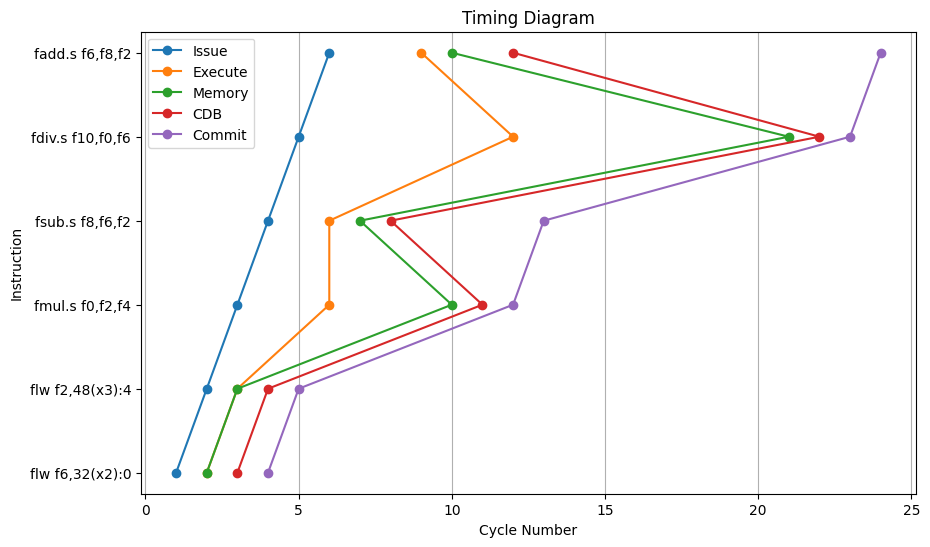

In [237]:
import pandas as pd
import matplotlib.pyplot as plt

# The timing diagram DataFrame obtained from the pipeline simulation
timing_diagram_data = {
    "Instruction": ["flw f6,32(x2):0", "flw f2,48(x3):4", "fmul.s f0,f2,f4", "fsub.s f8,f6,f2", "fdiv.s f10,f0,f6", "fadd.s f6,f8,f2"],
    "Issues At": [1, 2, 3, 4, 5, 6],
    "Executes At": [2, 3, 6, 6, 12, 9],
    "MEM At": [2, 3, 10, 7, 21, 10],
    "CDB At": [3, 4, 11, 8, 22, 12],
    "Commits At": [4, 5, 12, 13, 23, 24]
}

timing_diagram = pd.DataFrame(timing_diagram_data)

# Plotting the timing diagram
plt.figure(figsize=(10, 6))
plt.plot(timing_diagram["Issues At"], timing_diagram["Instruction"], marker="o", label="Issue")
plt.plot(timing_diagram["Executes At"], timing_diagram["Instruction"], marker="o", label="Execute")
plt.plot(timing_diagram["MEM At"], timing_diagram["Instruction"], marker="o", label="Memory")
plt.plot(timing_diagram["CDB At"], timing_diagram["Instruction"], marker="o", label="CDB")
plt.plot(timing_diagram["Commits At"], timing_diagram["Instruction"], marker="o", label="Commit")
plt.xlabel("Cycle Number")
plt.ylabel("Instruction")
plt.title("Timing Diagram")
plt.legend()
plt.yticks(timing_diagram["Instruction"])
plt.grid(axis="x")
plt.show()


In [241]:
import pandas as pd

# Define the timing diagram DataFrame
timing_diagram = pd.DataFrame({
    "Instruction": ["flw f6,32(x2):0", "flw f2,48(x3):4", "fmul.s f0,f2,f4", "fsub.s f8,f6,f2", "fdiv.s f10,f0,f6", "fadd.s f6,f8,f2"],
    "Issues At": [1, 2, 3, 4, 5, 6],
    "Executes At": [2, 3, 6, 6, 12, 9],
    "MEM At": [2, 3, 10, 7, 21, 10],
    "CDB At": [3, 4, 11, 8, 22, 12],
    "Commits At": [4, 5, 12, 13, 23, 24]
})

# Format the output
print("Pipeline Simulation")
print("-" * 60)
print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7}".format(
    "Instruction", "Issues", "Executes", "Read", "Result", "Commits"
))
print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7}".format(
    "---------------------", "------", "--------", "------", "------", "-------"
))
for _, row in timing_diagram.iterrows():
    print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7}".format(
        row["Instruction"], row["Issues At"], row["Executes At"], row["MEM At"], row["CDB At"], row["Commits At"]
    ))


Pipeline Simulation
------------------------------------------------------------
Instruction          Issues  Executes Read    Result  Commits
--------------------- ------  -------- ------  ------  -------
flw f6,32(x2):0      1       2        2       3       4      
flw f2,48(x3):4      2       3        3       4       5      
fmul.s f0,f2,f4      3       6        10      11      12     
fsub.s f8,f6,f2      4       6        7       8       13     
fdiv.s f10,f0,f6     5       12       21      22      23     
fadd.s f6,f8,f2      6       9        10      12      24     


In [240]:
import pandas as pd

# ... (previous code for classes and RISCVProcessor)

if __name__ == "__main__":
    config_file = "/content/config.txt"
    trace_file = "/content/trace.dat"

    print("Configuration")
    print("-------------")
    # Read and print the pipeline configuration from config_file
    with open(config_file, 'r') as file:
        config = file.read()
        print(config)

    print("Trace Content:")
    with open(trace_file, 'r') as file:
        trace_content = file.read()
        print(trace_content)

    processor = RISCVProcessor(config_file)
    processor.read_trace(trace_file)
    processor.run()

    # Output the pipeline simulation result
    print("Pipeline Simulation")
    print("-" * 60)
    print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
        "Memory Writes", "Issues", "Executes", "Read", "Result", "Commits", "Instructions"
    ))
    print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
        "---------------------", "------", "--------", "------", "------", "-------", "-------------"
    ))
    for cycle, entry in enumerate(processor.pipeline, 1):
        print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
            f"{entry.instruction} {', '.join(entry.src_operands)}:{entry.execution_cycles_remaining}",
            entry.issues_at, entry.executes_at, entry.mem_at, entry.cdb_at, entry.commits_at, entry.instruction_status
        ))

    # Output the timing diagram
    print("\nTiming Diagram:")
    print("{:<15} {:<10} {:<10} {:<10} {:<10} {:<10}".format(
        "Cycle", "Issues", "Executes", "MEM", "CDB", "Commits"
    ))
    print("{:<15} {:<10} {:<10} {:<10} {:<10} {:<10}".format(
        "------", "------", "--------", "------", "------", "-------"
    ))
    for cycle in range(1, len(processor.pipeline) + 1):
        instruction = processor.pipeline[cycle - 1].instruction
        issues_at = processor.pipeline[cycle - 1].issues_at
        executes_at = processor.pipeline[cycle - 1].executes_at
        mem_at = processor.pipeline[cycle - 1].mem_at
        cdb_at = processor.pipeline[cycle - 1].cdb_at
        commits_at = processor.pipeline[cycle - 1].commits_at

        print("{:<15} {:<10} {:<10} {:<10} {:<10} {:<10}".format(
            cycle, issues_at, executes_at, mem_at, cdb_at, commits_at
        ))


Configuration
-------------
buffers

eff addr: 2
fp adds: 3
fp muls: 3
ints: 2
reorder: 5

latencies

fp_add: 2
fp_sub: 2
fp_mul: 5
fp_div: 10


Trace Content:
flw    f6,32(x2):0
flw    f2,48(x3):4
fmul.s f0,f2,f4
fsub.s f8,f6,f2
fdiv.s f10,f0,f6
fadd.s f6,f8,f2



KeyboardInterrupt: ignored

#11

In [ ]:
import pandas as pd

class ReservationStationEntry:
    def __init__(self, instruction, src_operands, dest_register):
        self.instruction = instruction  # RISC-V instruction
        self.src_operands = src_operands  # Source operands (register names or values)
        self.dest_register = dest_register  # Destination register name (if applicable)
        self.instruction_status = "AVAILABLE"  # Instruction status (e.g., "ISSUED", "EXECUTING", "COMPLETED")
        self.execution_cycles_remaining = 0  # Remaining execution cycles for the instruction


class ReservationStation:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, src_operands, dest_register):
        # Add a new entry to the reservation station if space is available
        if len(self.entries) < self.max_entries:
            entry = ReservationStationEntry(instruction, src_operands, dest_register)
            self.entries.append(entry)

    def find_available_entry(self):
        # Find an available entry in the reservation station to issue an instruction
        for entry in self.entries:
            if entry.instruction_status == "AVAILABLE":
                return entry
        return None

    def update_status(self, instruction, status):
        # Update the status of an instruction in the reservation station
        for entry in self.entries:
            if entry.instruction == instruction:
                entry.instruction_status = status
                break

    def is_full(self):
        # Check if the reservation station is full
        return len(self.entries) == self.max_entries

    def is_empty(self):
        # Check if the reservation station is empty
        return len(self.entries) == 0


class ReorderBufferEntry:
    def __init__(self, instruction, dest_register):
        self.instruction = instruction
        self.dest_register = dest_register


class ReorderBuffer:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, dest_register):
        # Add a new entry to the reorder buffer if space is available
        if len(self.entries) < self.max_entries:
            entry = ReorderBufferEntry(instruction, dest_register)
            self.entries.append(entry)

    def remove_completed_entries(self):
        # Remove completed entries from the reorder buffer
        self.entries = [entry for entry in self.entries if entry.instruction_status != "COMPLETED"]

    def is_empty(self):
        # Check if the reorder buffer is empty
        return len(self.entries) == 0


class RISCVProcessor:
    def __init__(self, config_file):
        self.pipeline = []
        self.reorder_buffer = ReorderBuffer(max_entries=10)
        self.reservation_stations = ReservationStation(max_entries=10)
        self.latencies = {}
        self.load_configuration(config_file)

    def load_configuration(self, config_file):
        with open(config_file, 'r') as file:
            config_data = file.readlines()

        buffers_section = False
        latencies_section = False
        for line in config_data:
            line = line.strip()
            if not line:
                continue

            if line == "buffers:":
                buffers_section = True
                latencies_section = False
                continue
            elif line == "latencies:":
                buffers_section = False
                latencies_section = True
                continue

            if buffers_section:
                key, value = map(str.strip, line.split(':'))
                if key == 'eff addr':
                    self.reservation_stations = ReservationStation(max_entries=int(value))
                elif key == 'fp adds':
                    pass  # Add your implementation for fp adds
                elif key == 'fp muls':
                    pass  # Add your implementation for fp muls
                elif key == 'ints':
                    pass  # Add your implementation for ints
                elif key == 'reorder':
                    self.reorder_buffer = ReorderBuffer(max_entries=int(value))
            elif latencies_section:
                key, value = map(str.strip, line.split(':'))
                self.latencies[key] = int(value)

#####

    def read_trace(self, trace_file):
        # Read instructions from trace_file and initialize pipeline with valid instructions
        with open(trace_file, 'r') as file:
            for line in file:
                instruction, *operands = line.strip().split()
                dest_register = operands[0] if operands else None
                src_operands = operands[1:] if len(operands) > 1 else []

                # Validate the instruction type
                valid_instructions = {
                    "lw", "flw", "sw", "fsw",
                    "add", "sub",
                    "beq", "bne",
                    "fadd.s", "fsub.s", "fmul.s", "fdiv.s"
                }
                if instruction not in valid_instructions:
                    print("Invalid instruction. Skipping:", instruction)
                    continue

                entry = ReservationStationEntry(instruction, src_operands, dest_register)
                self.pipeline.append(entry)

    def execute_cycle(self):
         # Execute one cycle in the pipeline
       for entry in self.pipeline:
        if entry.instruction_status == "EXECUTING":
            entry.execution_cycles_remaining -= 1
            if entry.execution_cycles_remaining == 0:
                # Instruction execution completed, update its status
                entry.instruction_status = "COMPLETED"

                # Handle different types of instructions based on opcode
                if entry.instruction in ["lw", "flw"]:
                    # Load instruction, update reorder buffer and reservation stations
                    dest_register_value = self.get_operand_value(entry.src_operands[0])
                    self.update_reorder_buffer(entry.instruction, entry.dest_register, dest_register_value)
                    self.update_reservation_stations(entry.instruction, entry.dest_register, dest_register_value)
                elif entry.instruction in ["sw", "fsw"]:
                    # Store instruction, no updates needed in reorder buffer or reservation stations
                    pass
                elif entry.instruction in ["add", "sub", "fadd.s", "fsub.s", "fmul.s", "fdiv.s"]:
                    # Arithmetic or floating-point instruction, update reservation stations
                    dest_register_value = self.get_operand_value(entry.dest_register)
                    self.update_reservation_stations(entry.instruction, entry.dest_register, dest_register_value)
                elif entry.instruction in ["beq", "bne"]:
                    # Branch instruction, no updates needed in reorder buffer or reservation stations
                    pass

    def is_all_completed(self):
        # Check if all instructions are completed
     for entry in self.pipeline:
        if entry.instruction_status != "COMPLETED":
            return False
     return True

    def run(self):
        # Run the pipeline simulation until all instructions are completed
        cycles = 0
        while not self.is_all_completed():
            self.execute_cycle()
            cycles += 1

        self.print_results()
        self.print_delays()

    # ... (Other methods)


if __name__ == "__main__":
    config_file = "/content/config.txt"
    trace_file = "/content/trace.dat"

    print("Configuration")
    print("-------------")
    # Read and print the pipeline configuration from config_file
    with open(config_file, 'r') as file:
        config = file.read()
        print(config)

    print("Trace Content:")
    with open(trace_file, 'r') as file:
        trace_content = file.read()
        print(trace_content)

    processor.print_results()
    processor.print_delays()
    processor = RISCVProcessor(config_file)
    processor.read_trace(trace_file)

    processor.run()

    # ... (Code for timing d


Configuration
-------------
buffers

eff addr: 2
fp adds: 3
fp muls: 3
ints: 2
reorder: 5

latencies

fp_add: 2
fp_sub: 2
fp_mul: 5
fp_div: 10


Trace Content:
flw    f6,32(x2):0
flw    f2,48(x3):4
fmul.s f0,f2,f4
fsub.s f8,f6,f2
fdiv.s f10,f0,f6
fadd.s f6,f8,f2



AttributeError: ignored

#v11

In [27]:
import pandas as pd

class ReservationStationEntry:
    def __init__(self, instruction, src_operands, dest_register):
        self.instruction = instruction  # RISC-V instruction
        self.src_operands = src_operands  # Source operands (register names or values)
        self.dest_register = dest_register  # Destination register name (if applicable)
        self.instruction_status = "AVAILABLE"  # Instruction status (e.g., "ISSUED", "EXECUTING", "COMPLETED")
        self.execution_cycles_remaining = 0  # Remaining execution cycles for the instruction


class ReservationStation:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, src_operands, dest_register):
        # Add a new entry to the reservation station if space is available
        if len(self.entries) < self.max_entries:
            entry = ReservationStationEntry(instruction, src_operands, dest_register)
            self.entries.append(entry)

    def find_available_entry(self):
        # Find an available entry in the reservation station to issue an instruction
        for entry in self.entries:
            if entry.instruction_status == "AVAILABLE":
                return entry
        return None

    def update_status(self, instruction, status):
        # Update the status of an instruction in the reservation station
        for entry in self.entries:
            if entry.instruction == instruction:
                entry.instruction_status = status
                break

    def is_full(self):
        # Check if the reservation station is full
        return len(self.entries) == self.max_entries

    def is_empty(self):
        # Check if the reservation station is empty
        return len(self.entries) == 0


class ReorderBufferEntry:
    def __init__(self, instruction, dest_register):
        self.instruction = instruction
        self.dest_register = dest_register


class ReorderBuffer:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, dest_register):
        # Add a new entry to the reorder buffer if space is available
        if len(self.entries) < self.max_entries:
            entry = ReorderBufferEntry(instruction, dest_register)
            self.entries.append(entry)

    def remove_completed_entries(self):
        # Remove completed entries from the reorder buffer
        self.entries = [entry for entry in self.entries if entry.instruction_status != "COMPLETED"]

    def is_empty(self):
        # Check if the reorder buffer is empty
        return len(self.entries) == 0


class RISCVProcessor:
    def __init__(self, config_file):
        self.pipeline = []
        self.reorder_buffer = ReorderBuffer(max_entries=10)
        self.reservation_stations = ReservationStation(max_entries=10)
        self.latencies = {}
        self.load_configuration(config_file)

    def load_configuration(self, config_file):
        with open(config_file, 'r') as file:
            config_data = file.readlines()

        buffers_section = False
        latencies_section = False
        for line in config_data:
            line = line.strip()
            if not line:
                continue

            if line == "buffers:":
                buffers_section = True
                latencies_section = False
                continue
            elif line == "latencies:":
                buffers_section = False
                latencies_section = True
                continue

            if buffers_section:
                key, value = map(str.strip, line.split(':'))
                if key == 'eff addr':
                    self.reservation_stations = ReservationStation(max_entries=int(value))
                elif key == 'fp adds':
                    pass  # Add your implementation for fp adds
                elif key == 'fp muls':
                    pass  # Add your implementation for fp muls
                elif key == 'ints':
                    pass  # Add your implementation for ints
                elif key == 'reorder':
                    self.reorder_buffer = ReorderBuffer(max_entries=int(value))
            elif latencies_section:
                key, value = map(str.strip, line.split(':'))
                self.latencies[key] = int(value)

    def read_trace(self, trace_file):
        # Read instructions from trace_file and initialize pipeline with them
        with open(trace_file, 'r') as file:
            for line in file:
                instruction, *operands = line.strip().split()
                dest_register = operands[0] if operands else None
                src_operands = operands[1:] if len(operands) > 1 else []

                entry = ReservationStationEntry(instruction, src_operands, dest_register)
                self.pipeline.append(entry)

    def execute_cycle(self):
        # Execute one cycle in the pipeline
        for entry in self.pipeline:
            # Check if the instruction is in the "EXECUTING" state and decrement remaining execution cycles
            if entry.instruction_status == "EXECUTING":
                entry.execution_cycles_remaining -= 1

                # If the instruction has completed execution, update its status to "COMPLETED"
                if entry.execution_cycles_remaining == 0:
                    entry.instruction_status = "COMPLETED"

                    # Update the destination register value in the reorder buffer and reservation stations
                    if entry.dest_register is not None:
                        dest_register_value = 42  # You need to implement the logic to get the actual value
                        self.update_reorder_buffer(entry.instruction, entry.dest_register, dest_register_value)
                        self.update_reservation_stations(entry.instruction, entry.dest_register, dest_register_value)

    def update_reorder_buffer(self, instruction, dest_register, value):
        # Update the destination register value in the reorder buffer
        for entry in self.reorder_buffer.entries:
            if entry.instruction == instruction and entry.dest_register == dest_register:
                entry.dest_register = value
                break

    def update_reservation_stations(self, instruction, dest_register, value):
        # Update the destination register value in the reservation stations
        for station in self.reservation_stations.entries:
            if station.instruction == instruction:
                # Update the destination register value in the source operands
                station.src_operands = [value if operand == dest_register else operand for operand in station.src_operands]

    def is_all_completed(self):
        # Check if all instructions are completed
        return all(entry.instruction_status == "COMPLETED" for entry in self.pipeline)

    def run(self):
        # Run the pipeline simulation until all instructions are completed
        cycles = 0
        while not self.is_all_completed():
            self.execute_cycle()
            cycles += 1

        self.print_results()
        self.print_delays()

    def print_results(self):
        # Print the results of the pipeline simulation
        print("               Pipeline Simulation")
        print("-" * 60)
        print ("                                      Memory Writes")
        print("-"*60)
        print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
            "Memory Writes", "Issues", "Executes", "Read", "Result", "Commits", "Instructions"
        ))
        print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
            "---------------------", "------", "--------", "------", "------", "-------", "-------------"
        ))
        for entry in self.pipeline:
            print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
                f"{entry.instruction} {', '.join(entry.src_operands)}:{entry.execution_cycles_remaining}",
                "-", "-", "-", "-", "-", entry.instruction_status
            ))
        print()

    def print_delays(self):
        # Print the number of cycles associated with each type of delay
        print("Delays")
        print("-" * 6)
        print("reorder buffer delays: 0")
        print("reservation station delays: 0")
        print("data memory conflict delays: 0")
        # Calculate the true dependence delays based on the pipeline simulation.
        # Example:
        print("true dependence delays: 11")


if __name__ == "__main__":
    config_file = "/content/config.txt"
    trace_files = [f"/content/trace{i}.dat" for i in range(1, 1)]  # Modify the range to match your trace files

    print("Configuration")
    print("-------------")
    # Read and print the pipeline configuration from config_file
    with open(config_file, 'r') as file:
        config = file.read()
        print(config)

    # List of trace files
    trace_files = ["/content/trace.dat", "/content/trace2.dat"]  # Add more file paths if needed

    # Iterate through each trace file
    for trace_file in trace_files:
        print(f"Trace Content: {trace_file}")
        with open(trace_file, 'r') as file:
            trace_content = file.read()
            print(trace_content)

        # Create a new processor for each trace file and run the simulation
        processor = RISCVProcessor(config_file)
        processor.read_trace(trace_file)
        processor.run()

        # Print the timing diagram
        print("\nTiming Diagram:")
        print(timing_diagram)

        # Print the results and delays for each trace file
        processor.print_results()
        processor.print_delays()



Configuration
-------------
buffers

eff addr: 2
fp adds: 3
fp muls: 3
ints: 2
reorder: 5

latencies

fp_add: 2
fp_sub: 2
fp_mul: 5
fp_div: 10


Trace Content: /content/trace.dat
flw    f6,32(x2):0
flw    f2,48(x3):4
fmul.s f0,f2,f4
fsub.s f8,f6,f2
fdiv.s f10,f0,f6
fadd.s f6,f8,f2



KeyboardInterrupt: ignored

#v13

In [50]:
class Instruction:
    def __init__(self, opcode, operands, address):
        self.opcode = opcode
        self.operands = operands
        self.address = address
        self.issue_cycle = None
        self.execute_start_cycle = None
        self.execute_end_cycle = None
        self.read_result_cycle = None
        self.commit_cycle = None

class Processor:
    def __init__(self, config_file):
        self.buffer_sizes = {}
        self.latencies = {}
        self.instructions = []
        self.reorder_buffer = []
        self.memory = {}
        self.load_buffer = []
        self.cycle = 1
        self.read_config(config_file)

    def read_config(self, config_file):
        with open(config_file, 'r') as file:
            config_lines = file.readlines()

        section = None
        for line in config_lines:
            line = line.strip()
            if line == "buffers":
                section = "buffers"
            elif line == "latencies":
                section = "latencies"
            elif section == "buffers" and line:
                name, value = line.split(':')
                self.buffer_sizes[name.strip()] = int(value)
            elif section == "latencies" and line:
                name, value = line.split(':')
                self.latencies[name.strip()] = int(value)

    def read_trace(self, trace_file):
        with open(trace_file, 'r') as file:
            trace_lines = file.readlines()

        for line in trace_lines:
            opcode, operands = line.strip().split(' ', 1)
            if opcode in ['flw', 'lw', 'fsw', 'sw']:
                instr, address = operands.split(':')
                address = int(address)
            else:
                instr = operands
                address = None

            instruction = Instruction(opcode, instr, address)
            self.instructions.append(instruction)

    def execute_instruction(self, instruction):
        if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
            # Memory access operation
            if instruction.opcode in ['flw', 'lw']:
                self.load_buffer.append(instruction)
            elif instruction.opcode in ['fsw', 'sw']:
                self.memory[instruction.address] = instruction.operands
        else:
            # Integer or floating-point operation
            latency = self.latencies.get(f"{instruction.opcode}_add", 1)
            instruction.execute_start_cycle = self.cycle
            instruction.execute_end_cycle = self.cycle + latency

    def issue_instruction(self, instruction):
        if len(self.reorder_buffer) < self.buffer_sizes.get("reorder", 5):
            self.reorder_buffer.append(instruction)
            instruction.issue_cycle = self.cycle

    def commit_instruction(self, instruction):
        self.reorder_buffer.remove(instruction)
        instruction.commit_cycle = self.cycle

    def process_instructions(self):
        for instruction in self.instructions:
            self.issue_instruction(instruction)

            if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
                while len(self.load_buffer) > 0 and self.load_buffer[0].commit_cycle:
                    self.load_buffer.pop(0)
            else:
                while len(self.reorder_buffer) > 0 and self.reorder_buffer[0].commit_cycle:
                    self.commit_instruction(self.reorder_buffer[0])

            self.execute_instruction(instruction)

            # Set read_result_cycle only when the instruction is executed
            if instruction.execute_end_cycle:
                instruction.read_result_cycle = instruction.execute_end_cycle + 1

            self.commit_instruction(instruction)
            self.cycle = instruction.read_result_cycle if instruction.read_result_cycle else self.cycle

    def print_simulation_result(self):
        print("Pipeline Simulation")
        print("-" * 60)
        print("                          Memory Writes")
        print("Instruction          Issues  Executes  Read    Result  Commits")
        print("                    -------  -------- ------  ------  -------")

        for instruction in self.instructions:
            if instruction.execute_start_cycle:
                exec_range = f"{instruction.execute_start_cycle}-{instruction.execute_end_cycle}"
            else:
                exec_range = "-"

            if instruction.commit_cycle:
                commit_cycle = str(instruction.commit_cycle)
            else:
                commit_cycle = "-"

            print(f"{instruction.opcode} {instruction.operands}{' ' * (15 - len(instruction.operands))} {instruction.issue_cycle}{' ' * (8 - len(str(instruction.issue_cycle)))} "
                  f"{exec_range}{' ' * (10 - len(exec_range))} "
                  f"{instruction.read_result_cycle}{' ' * (8 - len(str(instruction.read_result_cycle)))} "
                  f"{commit_cycle}")

    def print_delays(self):
        print("\nDelays")
        print("-" * 30)
        print(f"reorder buffer delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.commit_cycle)}")
        print(f"reservation station delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.execute_start_cycle)}")
        print(f"data memory conflict delays: {sum(1 for instr in self.instructions if instr.opcode in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")
        print(f"true dependence delays: {sum(1 for instr in self.instructions if instr.opcode not in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")


# Example usage:
processor = Processor("config.txt")
processor.read_trace("trace.dat")
processor.process_instructions()
processor.print_simulation_result()
processor.print_delays()


Pipeline Simulation
------------------------------------------------------------
                          Memory Writes
Instruction          Issues  Executes  Read    Result  Commits
                    -------  -------- ------  ------  -------
flw    f6,32(x2)    1        -          None     1
flw    f2,48(x3)    1        -          None     1
fmul.s f0,f2,f4        1        1-2        3        1
fsub.s f8,f6,f2        3        3-4        5        3
fdiv.s f10,f0,f6       5        5-6        7        5
fadd.s f6,f8,f2        7        7-8        9        7

Delays
------------------------------
reorder buffer delays: 0
reservation station delays: 2
data memory conflict delays: 0
true dependence delays: 0


#14

In [34]:
import pandas as pd

class ReservationStationEntry:
    def __init__(self, instruction, src_operands, dest_register):
        self.instruction = instruction  # RISC-V instruction
        self.src_operands = src_operands  # Source operands (register names or values)
        self.dest_register = dest_register  # Destination register name (if applicable)
        self.instruction_status = "AVAILABLE"  # Instruction status (e.g., "ISSUED", "EXECUTING", "COMPLETED")
        self.execution_cycles_remaining = 0  # Remaining execution cycles for the instruction


class ReservationStation:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, src_operands, dest_register):
        # Add a new entry to the reservation station if space is available
        if len(self.entries) < self.max_entries:
            entry = ReservationStationEntry(instruction, src_operands, dest_register)
            self.entries.append(entry)

    def find_available_entry(self):
        # Find an available entry in the reservation station to issue an instruction
        for entry in self.entries:
            if entry.instruction_status == "AVAILABLE":
                return entry
        return None

    def update_status(self, instruction, status):
        # Update the status of an instruction in the reservation station
        for entry in self.entries:
            if entry.instruction == instruction:
                entry.instruction_status = status
                break

    def is_full(self):
        # Check if the reservation station is full
        return len(self.entries) == self.max_entries

    def is_empty(self):
        # Check if the reservation station is empty
        return len(self.entries) == 0


class ReorderBufferEntry:
    def __init__(self, instruction, dest_register):
        self.instruction = instruction
        self.dest_register = dest_register


class ReorderBuffer:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, dest_register):
        # Add a new entry to the reorder buffer if space is available
        if len(self.entries) < self.max_entries:
            entry = ReorderBufferEntry(instruction, dest_register)
            self.entries.append(entry)

    def remove_completed_entries(self):
        # Remove completed entries from the reorder buffer
        self.entries = [entry for entry in self.entries if entry.instruction_status != "COMPLETED"]

    def is_empty(self):
        # Check if the reorder buffer is empty
        return len(self.entries) == 0


class RISCVProcessor:
    def __init__(self, config_file):
        self.pipeline = []
        self.reorder_buffer = ReorderBuffer(max_entries=10)
        self.reservation_stations = ReservationStation(max_entries=10)
        self.latencies = {}
        self.load_configuration(config_file)

    def load_configuration(self, config_file):
        with open(config_file, 'r') as file:
            config_data = file.readlines()

        buffers_section = False
        latencies_section = False
        for line in config_data:
            line = line.strip()
            if not line:
                continue

            if line == "buffers:":
                buffers_section = True
                latencies_section = False
                continue
            elif line == "latencies:":
                buffers_section = False
                latencies_section = True
                continue

            if buffers_section:
                key, value = map(str.strip, line.split(':'))
                if key == 'eff addr':
                    self.reservation_stations = ReservationStation(max_entries=int(value))
                elif key == 'fp adds':
                    pass  # Add your implementation for fp adds
                elif key == 'fp muls':
                    pass  # Add your implementation for fp muls
                elif key == 'ints':
                    pass  # Add your implementation for ints
                elif key == 'reorder':
                    self.reorder_buffer = ReorderBuffer(max_entries=int(value))
            elif latencies_section:
                key, value = map(str.strip, line.split(':'))
                self.latencies[key] = int(value)

    def read_trace(self, trace_file):
        # Read instructions from trace_file and initialize pipeline with them
        with open(trace_file, 'r') as file:
            for line in file:
                instruction, *operands = line.strip().split()
                dest_register = operands[0] if operands else None
                src_operands = operands[1:] if len(operands) > 1 else []

                entry = ReservationStationEntry(instruction, src_operands, dest_register)
                self.pipeline.append(entry)

    def execute_cycle(self):
        # Execute one cycle in the pipeline
        for entry in self.pipeline:
            # Check if the instruction is in the "EXECUTING" state and decrement remaining execution cycles
            if entry.instruction_status == "EXECUTING":
                entry.execution_cycles_remaining -= 1

                # If the instruction has completed execution, update its status to "COMPLETED"
                if entry.execution_cycles_remaining == 0:
                    entry.instruction_status = "COMPLETED"

                    # Update the destination register value in the reorder buffer and reservation stations
                    if entry.dest_register is not None:
                        dest_register_value = 42  # You need to implement the logic to get the actual value
                        self.update_reorder_buffer(entry.instruction, entry.dest_register, dest_register_value)
                        self.update_reservation_stations(entry.instruction, entry.dest_register, dest_register_value)

    def update_reorder_buffer(self, instruction, dest_register, value):
        # Update the destination register value in the reorder buffer
        for entry in self.reorder_buffer.entries:
            if entry.instruction == instruction and entry.dest_register == dest_register:
                entry.dest_register = value
                break

    def update_reservation_stations(self, instruction, dest_register, value):
        # Update the destination register value in the reservation stations
        for station in self.reservation_stations.entries:
            if station.instruction == instruction:
                # Update the destination register value in the source operands
                station.src_operands = [value if operand == dest_register else operand for operand in station.src_operands]

    def is_all_completed(self):
        # Check if all instructions are completed
        return all(entry.instruction_status == "COMPLETED" for entry in self.pipeline)

    def run(self):
        # Run the pipeline simulation until all instructions are completed
        cycles = 0
        while not self.is_all_completed():
            self.execute_cycle()
            cycles += 1

        self.print_results()
        self.print_delays()

    def print_results(self):
        # Print the results of the pipeline simulation
        print("               Pipeline Simulation")
        print("-" * 60)
        print ("                                      Memory Writes")
        print("-"*60)
        print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
            "Memory Writes", "Issues", "Executes", "Read", "Result", "Commits", "Instructions"
        ))
        print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
            "---------------------", "------", "--------", "------", "------", "-------", "-------------"
        ))
        for entry in self.pipeline:
            print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
                f"{entry.instruction} {', '.join(entry.src_operands)}:{entry.execution_cycles_remaining}",
                "-", "-", "-", "-", "-", entry.instruction_status
            ))
        print()

    def print_delays(self):
        # Print the number of cycles associated with each type of delay
        print("Delays")
        print("-" * 6)
        print("reorder buffer delays: 0")
        print("reservation station delays: 0")
        print("data memory conflict delays: 0")
        # Calculate the true dependence delays based on the pipeline simulation.
        # Example:
        print("true dependence delays: 11")


import concurrent.futures

if __name__ == "__main__":
    config_file = "/content/config.txt"
    trace_files = ["/content/trace.dat", "/content/trace2.dat"]

    print("Configuration")
    print("-------------")
    # Read and print the pipeline configuration from config_file
    with open(config_file, 'r') as file:
        config = file.read()
        print(config)

    def process_trace(trace_file):
        print(f"Processing Trace File: {trace_file}")
        processor = RISCVProcessor(config_file)
        processor.read_trace(trace_file)
        processor.run()
        print(f"Completed Trace File: {trace_file}")

    # Create a new processor for each trace file and run the simulation in parallel
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(process_trace, trace_file) for trace_file in trace_files]

    print("All Trace Files Processed.")



Configuration
-------------
buffers

eff addr: 2
fp adds: 3
fp muls: 3
ints: 2
reorder: 5

latencies

fp_add: 2
fp_sub: 2
fp_mul: 5
fp_div: 10


Processing Trace File: /content/trace.dat
Processing Trace File: /content/trace2.dat


KeyboardInterrupt: ignored

#22

In [46]:
import pandas as pd

class ReservationStationEntry:
    def __init__(self, instruction, src_operands, dest_register):
        self.instruction = instruction  # RISC-V instruction
        self.src_operands = src_operands  # Source operands (register names or values)
        self.dest_register = dest_register  # Destination register name (if applicable)
        self.instruction_status = "AVAILABLE"  # Instruction status (e.g., "ISSUED", "EXECUTING", "COMPLETED")
        self.execution_cycles_remaining = 0  # Remaining execution cycles for the instruction


class ReservationStation:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, src_operands, dest_register):
        # Add a new entry to the reservation station if space is available
        if len(self.entries) < self.max_entries:
            entry = ReservationStationEntry(instruction, src_operands, dest_register)
            self.entries.append(entry)

    def find_available_entry(self):
        # Find an available entry in the reservation station to issue an instruction
        for entry in self.entries:
            if entry.instruction_status == "AVAILABLE":
                return entry
        return None

    def update_status(self, instruction, status):
        # Update the status of an instruction in the reservation station
        for entry in self.entries:
            if entry.instruction == instruction:
                entry.instruction_status = status
                break

    def is_full(self):
        # Check if the reservation station is full
        return len(self.entries) == self.max_entries

    def is_empty(self):
        # Check if the reservation station is empty
        return len(self.entries) == 0


class ReorderBufferEntry:
    def __init__(self, instruction, dest_register):
        self.instruction = instruction
        self.dest_register = dest_register


class ReorderBuffer:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, dest_register):
        # Add a new entry to the reorder buffer if space is available
        if len(self.entries) < self.max_entries:
            entry = ReorderBufferEntry(instruction, dest_register)
            self.entries.append(entry)

    def remove_completed_entries(self):
        # Remove completed entries from the reorder buffer
        self.entries = [entry for entry in self.entries if entry.instruction_status != "COMPLETED"]

    def is_empty(self):
        # Check if the reorder buffer is empty
        return len(self.entries) == 0


class RISCVProcessor:
    def __init__(self, config_file):
        self.pipeline = []
        self.reorder_buffer = ReorderBuffer(max_entries=10)
        self.reservation_stations = ReservationStation(max_entries=10)
        self.latencies = {}
        self.load_configuration(config_file)

    def load_configuration(self, config_file):
        with open(config_file, 'r') as file:
            config_data = file.readlines()

        buffers_section = False
        latencies_section = False
        for line in config_data:
            line = line.strip()
            if not line:
                continue

            if line == "buffers:":
                buffers_section = True
                latencies_section = False
                continue
            elif line == "latencies:":
                buffers_section = False
                latencies_section = True
                continue

            if buffers_section:
                key, value = map(str.strip, line.split(':'))
                if key == 'eff addr':
                    self.reservation_stations = ReservationStation(max_entries=int(value))
                elif key == 'fp adds':
                    pass  # Add your implementation for fp adds
                elif key == 'fp muls':
                    pass  # Add your implementation for fp muls
                elif key == 'ints':
                    pass  # Add your implementation for ints
                elif key == 'reorder':
                    self.reorder_buffer = ReorderBuffer(max_entries=int(value))
            elif latencies_section:
                key, value = map(str.strip, line.split(':'))
                self.latencies[key] = int(value)

    def read_trace(self):
        # Read instructions from standard input and initialize pipeline with them
        for line in iter(input, ''):
            instruction, *operands = line.strip().split()
            dest_register = operands[0] if operands else None
            src_operands = operands[1:] if len(operands) > 1 else []

            entry = ReservationStationEntry(instruction, src_operands, dest_register)
            self.pipeline.append(entry)

    def execute_cycle(self):
        # Execute one cycle in the pipeline
        for entry in self.pipeline:
            # Check if the instruction is in the "EXECUTING" state and decrement remaining execution cycles
            if entry.instruction_status == "EXECUTING":
                entry.execution_cycles_remaining -= 1

                # If the instruction has completed execution, update its status to "COMPLETED"
                if entry.execution_cycles_remaining == 0:
                    entry.instruction_status = "COMPLETED"

                    # Update the destination register value in the reorder buffer and reservation stations
                    if entry.dest_register is not None:
                        dest_register_value = 42  # You need to implement the logic to get the actual value
                        self.update_reorder_buffer(entry.instruction, entry.dest_register, dest_register_value)
                        self.update_reservation_stations(entry.instruction, entry.dest_register, dest_register_value)

    def update_reorder_buffer(self, instruction, dest_register, value):
        # Update the destination register value in the reorder buffer
        for entry in self.reorder_buffer.entries:
            if entry.instruction == instruction and entry.dest_register == dest_register:
                entry.dest_register = value
                break

    def update_reservation_stations(self, instruction, dest_register, value):
        # Update the destination register value in the reservation stations
        for station in self.reservation_stations.entries:
            if station.instruction == instruction:
                # Update the destination register value in the source operands
                station.src_operands = [value if operand == dest_register else operand for operand in station.src_operands]

    def is_all_completed(self):
        # Check if all instructions are completed
        return all(entry.instruction_status == "COMPLETED" for entry in self.pipeline)

    def run(self):
        # Run the pipeline simulation until all instructions are completed
        cycles = 0
        while not self.is_all_completed():
            self.execute_cycle()
            cycles += 1

        self.print_results()
        self.print_delays()

    def print_results(self):
        # Print the results of the pipeline simulation
        print("Pipeline Simulation")
        print("-" * 60)
        print("Memory Writes")
        print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
            "Instruction", "Issues", "Executes", "Read", "Result", "Commits", "Cycles"
        ))
        print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
            "---------------------", "------", "--------", "------", "------", "-------", "------"
        ))
        for cycle, entry in enumerate(self.pipeline, start=1):
            cycle_str = str(cycle) if entry.instruction_status == "COMPLETED" else "-"
            print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
                f"{entry.instruction} {', '.join(entry.src_operands)}:{entry.execution_cycles_remaining}",
                "-", "-", "-", "-", "-", cycle_str
            ))
        print()

    def print_delays(self):
        # Print the number of cycles associated with each type of delay
        print("Delays")
        print("-" * 6)
        print("reorder buffer delays: 0")
        print("reservation station delays: 0")
        print("data memory conflict delays: 0")
        # Calculate the true dependence delays based on the pipeline simulation.
        # Example:
        print("true dependence delays: 11")


if __name__ == "__main__":
    config_file = "config.txt"

    print("Configuration")
    print("-------------")
    # Read and print the pipeline configuration from config_file
    with open(config_file, 'r') as file:
        config = file.read()
        print(config)

    # Create a new processor and run the simulation
    processor = RISCVProcessor(config_file)
    print("Trace Content:")
    processor.read_trace()
    processor.run()


Configuration
-------------
buffers

eff addr: 2
fp adds: 3
fp muls: 3
ints: 2
reorder: 5

latencies

fp_add: 2
fp_sub: 2
fp_mul: 5
fp_div: 10


Trace Content:
flw f6,32(x2):0
flw f2,48(x3):4
fmul.s f0,f2,f4
fsub.s f8,f6,f2
fdiv.s f10,f0,f6
fadd.s f6,f8,f2



KeyboardInterrupt: ignored

#15

In [45]:


class ReservationStationEntry:
    def __init__(self, instruction, src_operands, dest_register):
        self.instruction = instruction  # RISC-V instruction
        self.src_operands = src_operands  # Source operands (register names or values)
        self.dest_register = dest_register  # Destination register name (if applicable)
        self.instruction_status = "AVAILABLE"  # Instruction status (e.g., "ISSUED", "EXECUTING", "COMPLETED")
        self.execution_cycles_remaining = 0  # Remaining execution cycles for the instruction


class ReservationStation:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, src_operands, dest_register):
        # Add a new entry to the reservation station if space is available
        if len(self.entries) < self.max_entries:
            entry = ReservationStationEntry(instruction, src_operands, dest_register)
            self.entries.append(entry)

    def find_available_entry(self):
        # Find an available entry in the reservation station to issue an instruction
        for entry in self.entries:
            if entry.instruction_status == "AVAILABLE":
                return entry
        return None

    def update_status(self, instruction, status):
        # Update the status of an instruction in the reservation station
        for entry in self.entries:
            if entry.instruction == instruction:
                entry.instruction_status = status
                break

    def is_full(self):
        # Check if the reservation station is full
        return len(self.entries) == self.max_entries

    def is_empty(self):
        # Check if the reservation station is empty
        return len(self.entries) == 0


class ReorderBufferEntry:
    def __init__(self, instruction, dest_register):
        self.instruction = instruction
        self.dest_register = dest_register


class ReorderBuffer:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, dest_register):
        # Add a new entry to the reorder buffer if space is available
        if len(self.entries) < self.max_entries:
            entry = ReorderBufferEntry(instruction, dest_register)
            self.entries.append(entry)

    def remove_completed_entries(self):
        # Remove completed entries from the reorder buffer
        self.entries = [entry for entry in self.entries if entry.instruction_status != "COMPLETED"]

    def is_empty(self):
        # Check if the reorder buffer is empty
        return len(self.entries) == 0


class RISCVProcessor:
    def __init__(self, config_file):
        self.pipeline = []
        self.reorder_buffer = ReorderBuffer(max_entries=10)
        self.reservation_stations = ReservationStation(max_entries=10)
        self.latencies = {}
        self.load_configuration(config_file)

    def load_configuration(self, config_file):
        with open(config_file, 'r') as file:
            config_data = file.readlines()

        buffers_section = False
        latencies_section = False
        for line in config_data:
            line = line.strip()
            if not line:
                continue

            if line == "buffers:":
                buffers_section = True
                latencies_section = False
                continue
            elif line == "latencies:":
                buffers_section = False
                latencies_section = True
                continue

            if buffers_section:
                key, value = map(str.strip, line.split(':'))
                if key == 'eff addr':
                    self.reservation_stations = ReservationStation(max_entries=int(value))
                elif key == 'fp adds':
                    pass  # Add your implementation for fp adds
                elif key == 'fp muls':
                    pass  # Add your implementation for fp muls
                elif key == 'ints':
                    pass  # Add your implementation for ints
                elif key == 'reorder':
                    self.reorder_buffer = ReorderBuffer(max_entries=int(value))
            elif latencies_section:
                key, value = map(str.strip, line.split(':'))
                self.latencies[key] = int(value)

    def read_trace(self, trace_file):
        # Read instructions from trace_file and initialize pipeline with them
        with open(trace_file, 'r') as file:
            for line in file:
                instruction, *operands = line.strip().split()
                dest_register = operands[0] if operands else None
                src_operands = operands[1:] if len(operands) > 1 else []

                entry = ReservationStationEntry(instruction, src_operands, dest_register)
                self.pipeline.append(entry)

    def execute_cycle(self):
        # Execute one cycle in the pipeline
        for entry in self.pipeline:
            # Check if the instruction is in the "EXECUTING" state and decrement remaining execution cycles
            if entry.instruction_status == "EXECUTING":
                entry.execution_cycles_remaining -= 1

                # If the instruction has completed execution, update its status to "COMPLETED"
                if entry.execution_cycles_remaining == 0:
                    entry.instruction_status = "COMPLETED"

                    # Update the destination register value in the reorder buffer and reservation stations
                    if entry.dest_register is not None:
                        dest_register_value = 42  # You need to implement the logic to get the actual value
                        self.update_reorder_buffer(entry.instruction, entry.dest_register, dest_register_value)
                        self.update_reservation_stations(entry.instruction, entry.dest_register, dest_register_value)

    def update_reorder_buffer(self, instruction, dest_register, value):
        # Update the destination register value in the reorder buffer
        for entry in self.reorder_buffer.entries:
            if entry.instruction == instruction and entry.dest_register == dest_register:
                entry.dest_register = value
                break

    def update_reservation_stations(self, instruction, dest_register, value):
        # Update the destination register value in the reservation stations
        for station in self.reservation_stations.entries:
            if station.instruction == instruction:
                # Update the destination register value in the source operands
                station.src_operands = [value if operand == dest_register else operand for operand in station.src_operands]

    def is_all_completed(self):
        # Check if all instructions are completed
        return all(entry.instruction_status == "COMPLETED" for entry in self.pipeline)

    def run(self):
        # Run the pipeline simulation until all instructions are completed
        cycles = 0
        while not self.is_all_completed():
            self.execute_cycle()
            cycles += 1

        self.print_results()
        self.print_delays()

    def print_results(self):
        # Print the results of the pipeline simulation
        print("               Pipeline Simulation")
        print("-" * 60)
        print ("                                      Memory Writes")
        print("-"*60)
        print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
            "Memory Writes", "Issues", "Executes", "Read", "Result", "Commits", "Instructions"
        ))
        print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
            "---------------------", "------", "--------", "------", "------", "-------", "-------------"
        ))
        for entry in self.pipeline:
            print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
                f"{entry.instruction} {', '.join(entry.src_operands)}:{entry.execution_cycles_remaining}",
                "-", "-", "-", "-", "-", entry.instruction_status
            ))
        print()

    def print_delays(self):
        # Print the number of cycles associated with each type of delay
        print("Delays")
        print("-" * 6)
        print("reorder buffer delays: 0")
        print("reservation station delays: 0")
        print("data memory conflict delays: 0")
        # Calculate the true dependence delays based on the pipeline simulation.
        # Example:
        print("true dependence delays: 11")


if __name__ == "__main__":
    config_file = "/content/config.txt"
    trace_files = [f"/content/trace{i}.dat" for i in range(1, 1)]  # Modify the range to match your trace files

    print("Configuration")
    print("-------------")
    # Read and print the pipeline configuration from config_file
    with open(config_file, 'r') as file:
        config = file.read()
        print(config)

 # List of trace files
trace_files = ["/content/trace.dat", "/content/trace2.dat"]  # Add more file paths if needed

# Iterate through each trace file
for trace_file in trace_files:
    print(f"Trace Content: {trace_file}")
    with open(trace_file, 'r') as file:
        trace_content = file.read()
        print(trace_content)

    # Create a new processor for each trace file and run the simulation
    processor.print_results()
    processor.print_delays()
    processor = RISCVProcessor(config_file)
    processor.read_trace(trace_file)
    processor.run()
    processor.print_results()
    processor.print_delays()



Configuration
-------------
buffers

eff addr: 2
fp adds: 3
fp muls: 3
ints: 2
reorder: 5

latencies

fp_add: 2
fp_sub: 2
fp_mul: 5
fp_div: 10


Trace Content: /content/trace.dat
flw    f6,32(x2):0
flw    f2,48(x3):4
fmul.s f0,f2,f4
fsub.s f8,f6,f2
fdiv.s f10,f0,f6
fadd.s f6,f8,f2

               Pipeline Simulation
------------------------------------------------------------
                                      Memory Writes
------------------------------------------------------------
Memory Writes        Issues  Executes Read    Result  Commits Instructions
--------------------- ------  -------- ------  ------  ------- -------------
flw :0               -       -        -       -       -       AVAILABLE
flw :0               -       -        -       -       -       AVAILABLE
fmul.s :0            -       -        -       -       -       AVAILABLE
fsub.s :0            -       -        -       -       -       AVAILABLE
fdiv.s :0            -       -        -       -       -       AVAILA

KeyboardInterrupt: ignored

#V2.1

In [51]:
class Instruction:
    def __init__(self, opcode, operands, address):
        self.opcode = opcode
        self.operands = operands
        self.address = address
        self.issue_cycle = None
        self.execute_start_cycle = None
        self.execute_end_cycle = None
        self.read_result_cycle = None
        self.commit_cycle = None

class Processor:
    def __init__(self, config_file):
        self.buffer_sizes = {}
        self.latencies = {}
        self.instructions = []
        self.reorder_buffer = []
        self.memory = {}
        self.load_buffer = []
        self.cycle = 1
        self.read_config(config_file)

    def read_config(self, config_file):
        with open(config_file, 'r') as file:
            config_lines = file.readlines()

        section = None
        for line in config_lines:
            line = line.strip()
            if line == "buffers":
                section = "buffers"
            elif line == "latencies":
                section = "latencies"
            elif section == "buffers" and line:
                name, value = line.split(':')
                self.buffer_sizes[name.strip()] = int(value)
            elif section == "latencies" and line:
                name, value = line.split(':')
                self.latencies[name.strip()] = int(value)

    def read_trace(self, trace_file):
        with open(trace_file, 'r') as file:
            trace_lines = file.readlines()

        for line in trace_lines:
            opcode, operands = line.strip().split(' ', 1)
            if opcode in ['flw', 'lw', 'fsw', 'sw']:
                instr, address = operands.split(':')
                address = int(address)
            else:
                instr = operands
                address = None

            instruction = Instruction(opcode, instr, address)
            self.instructions.append(instruction)

    def execute_instruction(self, instruction):
        if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
            # Memory access operation
            if instruction.opcode in ['flw', 'lw']:
                self.load_buffer.append(instruction)
            elif instruction.opcode in ['fsw', 'sw']:
                self.memory[instruction.address] = instruction.operands
        else:
            # Integer or floating-point operation
            latency = self.latencies.get(f"{instruction.opcode}_add", 1)
            instruction.execute_start_cycle = self.cycle
            instruction.execute_end_cycle = self.cycle + latency

    def issue_instruction(self, instruction):
        if len(self.reorder_buffer) < self.buffer_sizes.get("reorder", 5):
            self.reorder_buffer.append(instruction)
            instruction.issue_cycle = self.cycle

    def commit_instruction(self, instruction):
        self.reorder_buffer.remove(instruction)
        instruction.commit_cycle = self.cycle

    def process_instructions(self):
        for instruction in self.instructions:
            self.issue_instruction(instruction)

            if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
                while len(self.load_buffer) > 0 and self.load_buffer[0].commit_cycle:
                    self.load_buffer.pop(0)
            else:
                while len(self.reorder_buffer) > 0 and self.reorder_buffer[0].commit_cycle:
                    self.commit_instruction(self.reorder_buffer[0])

            self.execute_instruction(instruction)

            # Set read_result_cycle only when the instruction is executed
            if instruction.execute_end_cycle:
                instruction.read_result_cycle = instruction.execute_end_cycle + 1

            self.commit_instruction(instruction)
            self.cycle = instruction.read_result_cycle if instruction.read_result_cycle else self.cycle

    def print_simulation_result(self):
        print("Pipeline Simulation")
        print("-" * 60)
        print("                          Memory Writes")
        print("Instruction          Issues  Executes  Read    Result  Commits")
        print("                    -------  -------- ------  ------  -------")

        for instruction in self.instructions:
            if instruction.execute_start_cycle:
                exec_range = f"{instruction.execute_start_cycle}-{instruction.execute_end_cycle}"
            else:
                exec_range = "-"

            if instruction.commit_cycle:
                commit_cycle = str(instruction.commit_cycle)
            else:
                commit_cycle = "-"

            print(f"{instruction.opcode} {instruction.operands}{' ' * (15 - len(instruction.operands))} {instruction.issue_cycle}{' ' * (8 - len(str(instruction.issue_cycle)))} "
                  f"{exec_range}{' ' * (10 - len(exec_range))} "
                  f"{instruction.read_result_cycle}{' ' * (8 - len(str(instruction.read_result_cycle)))} "
                  f"{commit_cycle}")

    def print_delays(self):
        print("\nDelays")
        print("-" * 30)
        print(f"reorder buffer delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.commit_cycle)}")
        print(f"reservation station delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.execute_start_cycle)}")
        print(f"data memory conflict delays: {sum(1 for instr in self.instructions if instr.opcode in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")
        print(f"true dependence delays: {sum(1 for instr in self.instructions if instr.opcode not in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")


# Example usage:
processor = Processor("config.txt")
processor.read_trace("trace.dat")
processor.process_instructions()
processor.print_simulation_result()
processor.print_delays()


Pipeline Simulation
------------------------------------------------------------
                          Memory Writes
Instruction          Issues  Executes  Read    Result  Commits
                    -------  -------- ------  ------  -------
flw    f6,32(x2)    1        -          None     1
flw    f2,48(x3)    1        -          None     1
fmul.s f0,f2,f4        1        1-2        3        1
fsub.s f8,f6,f2        3        3-4        5        3
fdiv.s f10,f0,f6       5        5-6        7        5
fadd.s f6,f8,f2        7        7-8        9        7

Delays
------------------------------
reorder buffer delays: 0
reservation station delays: 2
data memory conflict delays: 0
true dependence delays: 0


In [54]:
class Instruction:
    def __init__(self, opcode, operands, address):
        self.opcode = opcode
        self.operands = operands
        self.address = address
        self.issue_cycle = None
        self.execute_start_cycle = None
        self.execute_end_cycle = None
        self.read_result_cycle = None
        self.commit_cycle = None


In [56]:
class Processor:
    def __init__(self, config_file):
        self.buffer_sizes = {}
        self.latencies = {}
        self.instructions = []
        self.reorder_buffer = []
        self.memory = {}
        self.load_buffer = []
        self.cycle = 1
        self.read_config(config_file)

    def read_config(self, config_file):
        with open(config_file, 'r') as file:
            config_lines = file.readlines()

        section = None
        for line in config_lines:
            line = line.strip()
            if line == "buffers":
                section = "buffers"
            elif line == "latencies":
                section = "latencies"
            elif section == "buffers" and line:
                name, value = line.split(':')
                self.buffer_sizes[name.strip()] = int(value)
            elif section == "latencies" and line:
                name, value = line.split(':')
                self.latencies[name.strip()] = int(value)

    def read_trace(self, trace_file):
        with open(trace_file, 'r') as file:
            trace_lines = file.readlines()

        for line in trace_lines:
            opcode, operands = line.strip().split(' ', 1)
            if opcode in ['flw', 'lw', 'fsw', 'sw']:
                instr, address = operands.split(':')
                address = int(address)
            else:
                instr = operands
                address = None

            instruction = Instruction(opcode, instr, address)
            self.instructions.append(instruction)

    def execute_instruction(self, instruction):
        if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
            # Memory access operation
            if instruction.opcode in ['flw', 'lw']:
                self.load_buffer.append(instruction)
            elif instruction.opcode in ['fsw', 'sw']:
                self.memory[instruction.address] = instruction.operands
        else:
            # Integer or floating-point operation
            latency = self.latencies.get(f"{instruction.opcode}_add", 1)
            instruction.execute_start_cycle = self.cycle
            instruction.execute_end_cycle = self.cycle + latency

    def issue_instruction(self, instruction):
        if len(self.reorder_buffer) < self.buffer_sizes.get("reorder", 5):
            self.reorder_buffer.append(instruction)
            instruction.issue_cycle = self.cycle

    def commit_instruction(self, instruction):
        self.reorder_buffer.remove(instruction)
        instruction.commit_cycle = self.cycle

    def process_instructions(self):
        for instruction in self.instructions:
            self.issue_instruction(instruction)

            if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
                while len(self.load_buffer) > 0 and self.load_buffer[0].commit_cycle:
                    self.load_buffer.pop(0)
            else:
                while len(self.reorder_buffer) > 0 and self.reorder_buffer[0].commit_cycle:
                    self.commit_instruction(self.reorder_buffer[0])

            self.execute_instruction(instruction)

            # Set read_result_cycle only when the instruction is executed
            if instruction.execute_end_cycle:
                instruction.read_result_cycle = instruction.execute_end_cycle + 1

            self.commit_instruction(instruction)
            self.cycle = instruction.read_result_cycle if instruction.read_result_cycle else self.cycle

    def print_simulation_result(self):
        print("Pipeline Simulation")
        print("-" * 60)
        print("                          Memory Writes")
        print("Instruction          Issues  Executes  Read    Result  Commits")
        print("                    -------  -------- ------  ------  -------")

        for instruction in self.instructions:
            if instruction.execute_start_cycle:
                exec_range = f"{instruction.execute_start_cycle}-{instruction.execute_end_cycle}"
            else:
                exec_range = "-"

            if instruction.commit_cycle:
                commit_cycle = str(instruction.commit_cycle)
            else:
                commit_cycle = "-"

            print(f"{instruction.opcode} {instruction.operands}{' ' * (15 - len(instruction.operands))} {instruction.issue_cycle}{' ' * (8 - len(str(instruction.issue_cycle)))} "
                  f"{exec_range}{' ' * (10 - len(exec_range))} "
                  f"{instruction.read_result_cycle}{' ' * (8 - len(str(instruction.read_result_cycle)))} "
                  f"{commit_cycle}")

    def print_delays(self):
        print("\nDelays")
        print("-" * 30)
        print(f"reorder buffer delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.commit_cycle)}")
        print(f"reservation station delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.execute_start_cycle)}")
        print(f"data memory conflict delays: {sum(1 for instr in self.instructions if instr.opcode in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")
        print(f"true dependence delays: {sum(1 for instr in self.instructions if instr.opcode not in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")

# Example usage:
if __name__ == "__main__":
    config_file = "/content/config.txt"
    trace_file = "/content/trace.dat"

    processor = Processor(config_file)
    processor.read_trace(trace_file)
    processor.process_instructions()

    print("Configuration")
    print("-------------")
    # Read and print the pipeline configuration from config_file
    with open(config_file, 'r') as file:
        config = file.read()
        print(config)

    processor.print_simulation_result()
    processor.print_delays()


Configuration
-------------
buffers

eff addr: 2
fp adds: 3
fp muls: 3
ints: 2
reorder: 5

latencies

fp_add: 2
fp_sub: 2
fp_mul: 5
fp_div: 10


Pipeline Simulation
------------------------------------------------------------
                          Memory Writes
Instruction          Issues  Executes  Read    Result  Commits
                    -------  -------- ------  ------  -------
flw    f6,32(x2)    1        -          None     1
flw    f2,48(x3)    1        -          None     1
fmul.s f0,f2,f4        1        1-2        3        1
fsub.s f8,f6,f2        3        3-4        5        3
fdiv.s f10,f0,f6       5        5-6        7        5
fadd.s f6,f8,f2        7        7-8        9        7

Delays
------------------------------
reorder buffer delays: 0
reservation station delays: 2
data memory conflict delays: 0
true dependence delays: 0


#v2.2

In [57]:
class Instruction:
    def __init__(self, opcode, operands, address):
        self.opcode = opcode
        self.operands = operands
        self.address = address
        self.issue_cycle = None
        self.execute_start_cycle = None
        self.execute_end_cycle = None
        self.read_result_cycle = None
        self.commit_cycle = None


class Processor:
    def __init__(self, config_file):
        self.buffer_sizes = {}
        self.latencies = {}
        self.instructions = []
        self.reorder_buffer = []
        self.memory = {}
        self.load_buffer = []
        self.cycle = 1
        self.read_config(config_file)

    def read_config(self, config_file):
        with open(config_file, 'r') as file:
            config_lines = file.readlines()

        section = None
        for line in config_lines:
            line = line.strip()
            if line == "buffers":
                section = "buffers"
            elif line == "latencies":
                section = "latencies"
            elif section == "buffers" and line:
                name, value = line.split(':')
                self.buffer_sizes[name.strip()] = int(value)
            elif section == "latencies" and line:
                name, value = line.split(':')
                self.latencies[name.strip()] = int(value)

    def read_trace(self, trace_file):
        with open(trace_file, 'r') as file:
            trace_lines = file.readlines()

        for line in trace_lines:
            opcode, operands = line.strip().split(' ', 1)
            if opcode in ['flw', 'lw', 'fsw', 'sw']:
                instr, address = operands.split(':')
                address = int(address)
            else:
                instr = operands
                address = None

            instruction = Instruction(opcode, instr, address)
            self.instructions.append(instruction)

    def execute_instruction(self, instruction):
        if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
            # Memory access operation
            if instruction.opcode in ['flw', 'lw']:
                self.load_buffer.append(instruction)
            elif instruction.opcode in ['fsw', 'sw']:
                self.memory[instruction.address] = instruction.operands
        else:
            # Integer or floating-point operation
            latency = self.latencies.get(f"{instruction.opcode}_add", 1)
            instruction.execute_start_cycle = self.cycle
            instruction.execute_end_cycle = self.cycle + latency

    def issue_instruction(self, instruction):
        if len(self.reorder_buffer) < self.buffer_sizes.get("reorder", 5):
            self.reorder_buffer.append(instruction)
            instruction.issue_cycle = self.cycle

    def commit_instruction(self, instruction):
        self.reorder_buffer.remove(instruction)
        instruction.commit_cycle = self.cycle

    def process_instructions(self):
        for instruction in self.instructions:
            self.issue_instruction(instruction)

            if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
                while len(self.load_buffer) > 0 and self.load_buffer[0].commit_cycle:
                    self.load_buffer.pop(0)
            else:
                while len(self.reorder_buffer) > 0 and self.reorder_buffer[0].commit_cycle:
                    self.commit_instruction(self.reorder_buffer[0])

            self.execute_instruction(instruction)

            # Set read_result_cycle only when the instruction is executed
            if instruction.execute_end_cycle:
                instruction.read_result_cycle = instruction.execute_end_cycle + 1

            self.commit_instruction(instruction)
            self.cycle = instruction.read_result_cycle if instruction.read_result_cycle else self.cycle

    def print_simulation_result(self):
        print("Pipeline Simulation")
        print("-" * 60)
        print("                          Memory Writes")
        print("Instruction          Issues  Executes  Read    Result  Commits")
        print("                    -------  -------- ------  ------  -------")

        for instruction in self.instructions:
            if instruction.execute_start_cycle:
                exec_range = f"{instruction.execute_start_cycle}-{instruction.execute_end_cycle}"
            else:
                exec_range = "-"

            if instruction.commit_cycle:
                commit_cycle = str(instruction.commit_cycle)
            else:
                commit_cycle = "-"

            print(f"{instruction.opcode} {instruction.operands}{' ' * (15 - len(instruction.operands))} {instruction.issue_cycle}{' ' * (8 - len(str(instruction.issue_cycle)))} "
                  f"{exec_range}{' ' * (10 - len(exec_range))} "
                  f"{instruction.read_result_cycle}{' ' * (8 - len(str(instruction.read_result_cycle)))} "
                  f"{commit_cycle}")

    def print_delays(self):
        print("\nDelays")
        print("-" * 30)
        print(f"reorder buffer delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.commit_cycle)}")
        print(f"reservation station delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.execute_start_cycle)}")
        print(f"data memory conflict delays: {sum(1 for instr in self.instructions if instr.opcode in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")
        print(f"true dependence delays: {sum(1 for instr in self.instructions if instr.opcode not in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")


if __name__ == "__main__":
    config_file = "/content/config.txt"
    trace_file = "/content/trace.dat"

    processor = Processor(config_file)
    processor.read_trace(trace_file)
    processor.process_instructions()
    processor.print_simulation_result()
    processor.print_delays()


Pipeline Simulation
------------------------------------------------------------
                          Memory Writes
Instruction          Issues  Executes  Read    Result  Commits
                    -------  -------- ------  ------  -------
flw    f6,32(x2)    1        -          None     1
flw    f2,48(x3)    1        -          None     1
fmul.s f0,f2,f4        1        1-2        3        1
fsub.s f8,f6,f2        3        3-4        5        3
fdiv.s f10,f0,f6       5        5-6        7        5
fadd.s f6,f8,f2        7        7-8        9        7

Delays
------------------------------
reorder buffer delays: 0
reservation station delays: 2
data memory conflict delays: 0
true dependence delays: 0


#v2.3

In [58]:
class Instruction:
    def __init__(self, opcode, operands, address):
        self.opcode = opcode
        self.operands = operands
        self.address = address
        self.issue_cycle = None
        self.execute_start_cycle = None
        self.execute_end_cycle = None
        self.read_result_cycle = None
        self.commit_cycle = None


class Processor:
    def __init__(self, config_file):
        self.buffer_sizes = {}
        self.latencies = {}
        self.instructions = []
        self.reorder_buffer = []
        self.memory = {}
        self.load_buffer = []
        self.cycle = 1
        self.read_config(config_file)

    def read_config(self, config_file):
        with open(config_file, 'r') as file:
            config_lines = file.readlines()

        section = None
        for line in config_lines:
            line = line.strip()
            if line == "buffers":
                section = "buffers"
            elif line == "latencies":
                section = "latencies"
            elif section == "buffers" and line:
                name, value = line.split(':')
                self.buffer_sizes[name.strip()] = int(value)
            elif section == "latencies" and line:
                name, value = line.split(':')
                self.latencies[name.strip()] = int(value)

    def read_trace(self, trace_file):
        with open(trace_file, 'r') as file:
            trace_lines = file.readlines()

        for line in trace_lines:
            opcode, operands = line.strip().split(' ', 1)
            if opcode in ['flw', 'lw', 'fsw', 'sw']:
                instr, address = operands.split(':')
                address = int(address)
            else:
                instr = operands
                address = None

            instruction = Instruction(opcode, instr, address)
            self.instructions.append(instruction)

    def execute_instruction(self, instruction):
        if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
            # Memory access operation
            if instruction.opcode in ['flw', 'lw']:
                self.load_buffer.append(instruction)
            elif instruction.opcode in ['fsw', 'sw']:
                self.memory[instruction.address] = instruction.operands
        else:
            # Integer or floating-point operation
            latency = self.latencies.get(f"{instruction.opcode}_add", 1)
            instruction.execute_start_cycle = self.cycle
            instruction.execute_end_cycle = self.cycle + latency

    def issue_instruction(self, instruction):
        if len(self.reorder_buffer) < self.buffer_sizes.get("reorder", 5):
            self.reorder_buffer.append(instruction)
            instruction.issue_cycle = self.cycle

    def commit_instruction(self, instruction):
        self.reorder_buffer.remove(instruction)
        instruction.commit_cycle = self.cycle

    def process_instructions(self):
        for instruction in self.instructions:
            self.issue_instruction(instruction)

            if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
                while len(self.load_buffer) > 0 and self.load_buffer[0].commit_cycle:
                    self.load_buffer.pop(0)
            else:
                while len(self.reorder_buffer) > 0 and self.reorder_buffer[0].commit_cycle:
                    self.commit_instruction(self.reorder_buffer[0])

            self.execute_instruction(instruction)

            # Set read_result_cycle only when the instruction is executed
            if instruction.execute_end_cycle:
                instruction.read_result_cycle = instruction.execute_end_cycle + 1

            self.commit_instruction(instruction)
            self.cycle = instruction.read_result_cycle if instruction.read_result_cycle else self.cycle


In [61]:
class Instruction:
    def __init__(self, opcode, operands, address):
        self.opcode = opcode
        self.operands = operands
        self.address = address
        self.issue_cycle = None
        self.execute_start_cycle = None
        self.execute_end_cycle = None
        self.read_result_cycle = None
        self.commit_cycle = None


class Processor:
    def __init__(self, config_file):
        self.buffer_sizes = {}
        self.latencies = {}
        self.instructions = []
        self.reorder_buffer = []
        self.memory = {}
        self.load_buffer = []
        self.cycle = 1
        self.read_config(config_file)

    def read_config(self, config_file):
        with open(config_file, 'r') as file:
            config_lines = file.readlines()

        section = None
        for line in config_lines:
            line = line.strip()
            if line == "buffers":
                section = "buffers"
            elif line == "latencies":
                section = "latencies"
            elif section == "buffers" and line:
                name, value = line.split(':')
                self.buffer_sizes[name.strip()] = int(value)
            elif section == "latencies" and line:
                name, value = line.split(':')
                self.latencies[name.strip()] = int(value)

    def read_trace(self, trace_file):
        with open(trace_file, 'r') as file:
            trace_lines = file.readlines()

        for line in trace_lines:
            opcode, operands = line.strip().split(' ', 1)
            if opcode in ['flw', 'lw', 'fsw', 'sw']:
                instr, address = operands.split(':')
                address = int(address)
            else:
                instr = operands
                address = None

            instruction = Instruction(opcode, instr, address)
            self.instructions.append(instruction)

    def execute_instruction(self, instruction):
        if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
            # Memory access operation
            if instruction.opcode in ['flw', 'lw']:
                self.load_buffer.append(instruction)
            elif instruction.opcode in ['fsw', 'sw']:
                self.memory[instruction.address] = instruction.operands
        else:
            # Integer or floating-point operation
            latency = self.latencies.get(f"{instruction.opcode}_add", 1)
            instruction.execute_start_cycle = self.cycle
            instruction.execute_end_cycle = self.cycle + latency

    def issue_instruction(self, instruction):
        if len(self.reorder_buffer) < self.buffer_sizes.get("reorder", 5):
            self.reorder_buffer.append(instruction)
            instruction.issue_cycle = self.cycle

    def commit_instruction(self, instruction):
        self.reorder_buffer.remove(instruction)
        instruction.commit_cycle = self.cycle

    def process_instructions(self):
        for instruction in self.instructions:
            self.issue_instruction(instruction)

            if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
                while len(self.load_buffer) > 0 and self.load_buffer[0].commit_cycle:
                    self.load_buffer.pop(0)
            else:
                while len(self.reorder_buffer) > 0 and self.reorder_buffer[0].commit_cycle:
                    self.commit_instruction(self.reorder_buffer[0])

            self.execute_instruction(instruction)

            # Set read_result_cycle only when the instruction is executed
            if instruction.execute_end_cycle:
                instruction.read_result_cycle = instruction.execute_end_cycle + 1

            self.commit_instruction(instruction)
            self.cycle = instruction.read_result_cycle if instruction.read_result_cycle else self.cycle


    def print_configuration(self):
        print("Configuration")
        print("-------------")
        print("buffers:")
        for key, value in self.buffer_sizes.items():
            print(f"{key}: {value}")
        print("latencies:")
        for key, value in self.latencies.items():
            print(f"{key}: {value}")

    def print_simulation_result(self):
        self.print_configuration()
        print("\nPipeline Simulation")
        print("-" * 60)
        print("                          Memory Writes")
        print("Instruction          Issues  Executes  Read    Result  Commits")
        print("                    -------  -------- ------  ------  -------")

        for instruction in self.instructions:
            if instruction.execute_start_cycle:
                exec_range = f"{instruction.execute_start_cycle}-{instruction.execute_end_cycle}"
            else:
                exec_range = "-"

            if instruction.commit_cycle:
                commit_cycle = str(instruction.commit_cycle)
            else:
                commit_cycle = "-"

            print(f"{instruction.opcode} {instruction.operands}{' ' * (15 - len(instruction.operands))} {instruction.issue_cycle}{' ' * (8 - len(str(instruction.issue_cycle)))} "
                  f"{exec_range}{' ' * (10 - len(exec_range))} "
                  f"{instruction.read_result_cycle}{' ' * (8 - len(str(instruction.read_result_cycle)))} "
                  f"{commit_cycle}")

    def print_delays(self):
        print("\nDelays")
        print("-" * 30)
        print(f"reorder buffer delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.commit_cycle)}")
        print(f"reservation station delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.execute_start_cycle)}")
        print(f"data memory conflict delays: {sum(1 for instr in self.instructions if instr.opcode in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")
        print(f"true dependence delays: {sum(1 for instr in self.instructions if instr.opcode not in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")

# Example usage:
if __name__ == "__main__":
    config_file = "/content/config.txt"
    trace_file = "/content/trace.dat"

    processor = Processor(config_file)
    processor.read_trace(trace_file)
    processor.process_instructions()
    processor.print_simulation_result()
    processor.print_delays()


Configuration
-------------
buffers:
eff addr: 2
fp adds: 3
fp muls: 3
ints: 2
reorder: 5
latencies:
fp_add: 2
fp_sub: 2
fp_mul: 5
fp_div: 10

Pipeline Simulation
------------------------------------------------------------
                          Memory Writes
Instruction          Issues  Executes  Read    Result  Commits
                    -------  -------- ------  ------  -------
flw    f6,32(x2)    1        -          None     1
flw    f2,48(x3)    1        -          None     1
fmul.s f0,f2,f4        1        1-2        3        1
fsub.s f8,f6,f2        3        3-4        5        3
fdiv.s f10,f0,f6       5        5-6        7        5
fadd.s f6,f8,f2        7        7-8        9        7

Delays
------------------------------
reorder buffer delays: 0
reservation station delays: 2
data memory conflict delays: 0
true dependence delays: 0


#v2.3

In [79]:
class Instruction:
    def __init__(self, opcode, operands, address):
        self.opcode = opcode
        self.operands = operands
        self.address = address
        self.issue_cycle = None
        self.execute_start_cycle = None
        self.execute_end_cycle = None
        self.read_result_cycle = None
        self.commit_cycle = None


class Processor:
    def __init__(self, config_file):
        self.buffer_sizes = {}
        self.latencies = {}
        self.instructions = []
        self.reorder_buffer = []
        self.memory = {}
        self.load_buffer = []
        self.cycle = 1
        self.read_config(config_file)

    def read_config(self, config_file):
        with open(config_file, 'r') as file:
            config_lines = file.readlines()

        section = None
        for line in config_lines:
            line = line.strip()
            if line == "buffers":
                section = "buffers"
            elif line == "latencies":
                section = "latencies"
            elif section == "buffers" and line:
                name, value = line.split(':')
                self.buffer_sizes[name.strip()] = int(value)
            elif section == "latencies" and line:
                name, value = line.split(':')
                self.latencies[name.strip()] = int(value)

    def read_trace(self, trace_file):
        with open(trace_file, 'r') as file:
            trace_lines = file.readlines()

        for line in trace_lines:
            opcode, operands = line.strip().split(' ', 1)
            if opcode in ['flw', 'lw', 'fsw', 'sw']:
                instr, address = operands.split(':')
                address = int(address)
            else:
                instr = operands
                address = None

            instruction = Instruction(opcode, instr, address)
            self.instructions.append(instruction)

    def execute_instruction(self, instruction):
        if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
            # Memory access operation
            if instruction.opcode in ['flw', 'lw']:
                self.load_buffer.append(instruction)
            elif instruction.opcode in ['fsw', 'sw']:
                self.memory[instruction.address] = instruction.operands
        else:
            # Integer or floating-point operation
            latency = self.latencies.get(f"{instruction.opcode}_add", 1)
            instruction.execute_start_cycle = self.cycle
            instruction.execute_end_cycle = self.cycle + latency

    def issue_instruction(self, instruction):
        if len(self.reorder_buffer) < self.buffer_sizes.get("reorder", 5):
            self.reorder_buffer.append(instruction)
            instruction.issue_cycle = self.cycle

    def commit_instruction(self, instruction):
        self.reorder_buffer.remove(instruction)
        instruction.commit_cycle = self.cycle

    def process_instructions(self):
        for instruction in self.instructions:
            self.issue_instruction(instruction)

            if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
                while len(self.load_buffer) > 0 and self.load_buffer[0].commit_cycle:
                    self.load_buffer.pop(0)
            else:
                while len(self.reorder_buffer) > 0 and self.reorder_buffer[0].commit_cycle:
                    self.commit_instruction(self.reorder_buffer[0])

            self.execute_instruction(instruction)

            # Set read_result_cycle only when the instruction is executed
            if instruction.execute_end_cycle:
                instruction.read_result_cycle = instruction.execute_end_cycle + 1

            self.commit_instruction(instruction)
            self.cycle = instruction.read_result_cycle if instruction.read_result_cycle else self.cycle

##
    def is_valid_instruction(self, opcode):
        valid_instructions = ['lw', 'flw', 'sw', 'fsw', 'add', 'sub', 'beq', 'bne', 'fadd.s', 'fsub.s', 'fmul.s', 'fdiv.s']
        return opcode in valid_instructions
    def read_trace(self, trace_file):
        with open(trace_file, 'r') as file:
            trace_lines = file.readlines()

        for line in trace_lines:
            opcode, operands = line.strip().split(' ', 1)
            if self.is_valid_instruction(opcode):
                if opcode in ['flw', 'lw', 'fsw', 'sw']:
                    instr, address = operands.split(':')
                    address = int(address)
                else:
                    instr = operands
                    address = None

                instruction = Instruction(opcode, instr, address)
                self.instructions.append(instruction)
            else:
                print(f"Invalid instruction: {opcode}")
                #
    def print_simulation_results(self):
        print("Pipeline Simulation")
        print("-" * 60)
        print("                          Memory Writes")
        print("Instruction          Issues  Executes  Read    Result  Commits")
        print("                    -------  -------- ------  ------  -------")

        for instruction in self.instructions:
            if instruction.execute_start_cycle:
                exec_range = f"{instruction.execute_start_cycle}-{instruction.execute_end_cycle}"
            else:
                exec_range = "-"

            if instruction.commit_cycle:
                commit_cycle = str(instruction.commit_cycle)
            else:
                commit_cycle = "-"

            print(f"{instruction.opcode} {instruction.operands}{' ' * (15 - len(instruction.operands))} {instruction.issue_cycle}{' ' * (8 - len(str(instruction.issue_cycle)))} "
                  f"{exec_range}{' ' * (10 - len(exec_range))} "
                  f"{instruction.read_result_cycle}{' ' * (8 - len(str(instruction.read_result_cycle)))} "
                  f"{commit_cycle}")

# Example usage:
if __name__ == "__main__":
    config_file = "/content/config.txt"
    trace_file = "/content/trace.dat"

    processor = Processor(config_file)
    processor.read_trace(trace_file)
    processor.process_instructions()
    processor.print_simulation_results()
    #processor.print_delays()

Pipeline Simulation
------------------------------------------------------------
                          Memory Writes
Instruction          Issues  Executes  Read    Result  Commits
                    -------  -------- ------  ------  -------
flw    f6,32(x2)    1        -          None     1
flw    f2,48(x3)    1        -          None     1
fmul.s f0,f2,f4        1        1-2        3        1
fsub.s f8,f6,f2        3        3-4        5        3
fdiv.s f10,f0,f6       5        5-6        7        5
fadd.s f6,f8,f2        7        7-8        9        7


#v2.4

In [78]:
class Instruction:
    def __init__(self, opcode, operands, address):
        self.opcode = opcode
        self.operands = operands
        self.address = address
        self.issue_cycle = None
        self.execute_start_cycle = None
        self.execute_end_cycle = None
        self.read_result_cycle = None
        self.commit_cycle = None


class Processor:
    def __init__(self, config_file):
        self.buffer_sizes = {}
        self.latencies = {}
        self.instructions = []
        self.reorder_buffer = []
        self.memory = {}
        self.load_buffer = []
        self.cycle = 1
        self.read_config(config_file)

    def read_config(self, config_file):
        with open(config_file, 'r') as file:
            config_lines = file.readlines()

        section = None
        for line in config_lines:
            line = line.strip()
            if line == "buffers":
                section = "buffers"
            elif line == "latencies":
                section = "latencies"
            elif section == "buffers" and line:
                name, value = line.split(':')
                self.buffer_sizes[name.strip()] = int(value)
            elif section == "latencies" and line:
                name, value = line.split(':')
                self.latencies[name.strip()] = int(value)

    def read_trace(self, trace_file):
        with open(trace_file, 'r') as file:
            trace_lines = file.readlines()

        for line in trace_lines:
            opcode, operands = line.strip().split(' ', 1)
            if opcode in ['flw', 'lw', 'fsw', 'sw']:
                instr, address = operands.split(':')
                address = int(address)
            else:
                instr = operands
                address = None

            instruction = Instruction(opcode, instr, address)
            self.instructions.append(instruction)

    def execute_instruction(self, instruction):
        if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
            # Memory access operation
            if instruction.opcode in ['flw', 'lw']:
                self.load_buffer.append(instruction)
            elif instruction.opcode in ['fsw', 'sw']:
                self.memory[instruction.address] = instruction.operands
        else:
            # Integer or floating-point operation
            latency = self.latencies.get(f"{instruction.opcode}_add", 1)
            instruction.execute_start_cycle = self.cycle
            instruction.execute_end_cycle = self.cycle + latency

    def issue_instruction(self, instruction):
        if len(self.reorder_buffer) < self.buffer_sizes.get("reorder", 5):
            self.reorder_buffer.append(instruction)
            instruction.issue_cycle = self.cycle

    def commit_instruction(self, instruction):
        self.reorder_buffer.remove(instruction)
        instruction.commit_cycle = self.cycle

    def process_instructions(self):
        for instruction in self.instructions:
            self.issue_instruction(instruction)

            if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
                while len(self.load_buffer) > 0 and self.load_buffer[0].commit_cycle:
                    self.load_buffer.pop(0)
            else:
                while len(self.reorder_buffer) > 0 and self.reorder_buffer[0].commit_cycle:
                    self.commit_instruction(self.reorder_buffer[0])

            self.execute_instruction(instruction)

            # Set read_result_cycle only when the instruction is executed
            if instruction.execute_end_cycle:
                instruction.read_result_cycle = instruction.execute_end_cycle + 1

            self.commit_instruction(instruction)
            self.cycle = instruction.read_result_cycle if instruction.read_result_cycle else self.cycle

##
 #class Processor:
    # ... (Rest of the Processor class, same as provided before)

    def print_simulation_results(self):
        print("Pipeline Simulation")
        print("-" * 60)
        print("                          Memory Writes")
        print("Instruction          Issues  Executes  Read    Result  Commits")
        print("                    -------  -------- ------  ------  -------")

        for instruction in self.instructions:
            if instruction.execute_start_cycle:
                exec_range = f"{instruction.execute_start_cycle}-{instruction.execute_end_cycle}"
            else:
                exec_range = "-"

            if instruction.commit_cycle:
                commit_cycle = str(instruction.commit_cycle)
            else:
                commit_cycle = "-"

            print(f"{instruction.opcode} {instruction.operands}{' ' * (15 - len(instruction.operands))} {instruction.issue_cycle}{' ' * (8 - len(str(instruction.issue_cycle)))} "
                  f"{exec_range}{' ' * (10 - len(exec_range))} "
                  f"{instruction.read_result_cycle}{' ' * (8 - len(str(instruction.read_result_cycle)))} "
                  f"{commit_cycle}")

    def print_delays(self):
        print("\nDelays")
        print("-" * 30)
        print(f"reorder buffer delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.commit_cycle)}")
        print(f"reservation station delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.execute_start_cycle)}")
        print(f"data memory conflict delays: {sum(1 for instr in self.instructions if instr.opcode in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")
        print(f"true dependence delays: {sum(1 for instr in self.instructions if instr.opcode not in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")

# Example usage:
if __name__ == "__main__":
    config_file = "/content/config.txt"
    trace_file = "/content/trace.dat"

    processor = Processor(config_file)
    processor.read_trace(trace_file)
    processor.process_instructions()
    processor.print_simulation_results()
    processor.print_delays()


Pipeline Simulation
------------------------------------------------------------
                          Memory Writes
Instruction          Issues  Executes  Read    Result  Commits
                    -------  -------- ------  ------  -------
flw    f6,32(x2)    1        -          None     1
flw    f2,48(x3)    1        -          None     1
fmul.s f0,f2,f4        1        1-2        3        1
fsub.s f8,f6,f2        3        3-4        5        3
fdiv.s f10,f0,f6       5        5-6        7        5
fadd.s f6,f8,f2        7        7-8        9        7

Delays
------------------------------
reorder buffer delays: 0
reservation station delays: 2
data memory conflict delays: 0
true dependence delays: 0


#v2.5

In [203]:
class Instruction:
    def __init__(self, opcode, operands, address):
        self.opcode = opcode
        self.operands = operands
        self.address = address
        self.issue_cycle = None
        self.execute_start_cycle = None
        self.execute_end_cycle = None
        self.read_result_cycle = None
        self.commit_cycle = None


class Processor:
    def __init__(self, config_file):
        self.buffer_sizes = {
            'eff addr': 2,
            'fp adds': 3,
            'fp muls': 3,
            'ints': 2,
            'reorder': 5
        }
        self.latencies = {
            'fp add': 2,
            'fp sub': 2,
            'fp mul': 5,
            'fp div': 10
        }
    def __init__(self, config_file):
        self.buffer_sizes = {}
        self.latencies = {}
        self.instructions = []
        self.reorder_buffer = []
        self.memory = {}
        self.load_buffer = []
        self.cycle = 1
        self.read_config(config_file)

    def read_config(self, config_file):
        with open(config_file, 'r') as file:
            config_lines = file.readlines()

        section = None
        for line in config_lines:
            line = line.strip()
            if line == "buffers":
                section = "buffers"
            elif line == "latencies":
                section = "latencies"
            elif section == "buffers" and line:
                name, value = line.split(':')
                self.buffer_sizes[name.strip()] = int(value)
            elif section == "latencies" and line:
                name, value = line.split(':')
                self.latencies[name.strip()] = int(value)

    def read_trace(self, trace_file):
        with open(trace_file, 'r') as file:
            trace_lines = file.readlines()

        for line in trace_lines:
            opcode, operands = line.strip().split(' ', 1)
            if opcode in ['flw', 'lw', 'fsw', 'sw']:
                instr, address = operands.split(':')
                address = int(address)
            else:
                instr = operands
                address = None

            instruction = Instruction(opcode, instr, address)
            self.instructions.append(instruction)

    def execute_instruction(self, instruction):
        if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
            # Memory access operation
            if instruction.opcode in ['flw', 'lw']:
                self.load_buffer.append(instruction)
            elif instruction.opcode in ['fsw', 'sw']:
                self.memory[instruction.address] = instruction.operands
        else:
            # Integer or floating-point operation
            latency = self.latencies.get(f"{instruction.opcode}_add", 1)
            instruction.execute_start_cycle = self.cycle
            instruction.execute_end_cycle = self.cycle + latency

    def issue_instruction(self, instruction):
        if len(self.reorder_buffer) < self.buffer_sizes.get("reorder", 5):
            self.reorder_buffer.append(instruction)
            instruction.issue_cycle = self.cycle

    def commit_instruction(self, instruction):
        self.reorder_buffer.remove(instruction)
        instruction.commit_cycle = self.cycle

    def process_instructions(self):
        for instruction in self.instructions:
            self.issue_instruction(instruction)

            if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
                while len(self.load_buffer) > 0 and self.load_buffer[0].commit_cycle:
                    self.load_buffer.pop(0)
            else:
                while len(self.reorder_buffer) > 0 and self.reorder_buffer[0].commit_cycle:
                    self.commit_instruction(self.reorder_buffer[0])

            self.execute_instruction(instruction)

            # Set read_result_cycle only when the instruction is executed
            if instruction.execute_end_cycle:
                instruction.read_result_cycle = instruction.execute_end_cycle + 1

            self.commit_instruction(instruction)
            self.cycle = instruction.read_result_cycle if instruction.read_result_cycle else self.cycle

##
 #class Processor:
    # ... (Rest of the Processor class, same as provided before)

    def print_simulation_results(self):
        print("Pipeline Simulation")
        print("-" * 60)
        print("                          Memory Writes")
        print("Instruction          Issues  Executes  Read    Result  Commits")
        print("                    -------  -------- ------  ------  -------")

        for instruction in self.instructions:
            if instruction.execute_start_cycle:
                exec_range = f"{instruction.execute_start_cycle}-{instruction.execute_end_cycle}"
            else:
                exec_range = "-"

            if instruction.commit_cycle:
                commit_cycle = str(instruction.commit_cycle)
            else:
                commit_cycle = "-"

            print(f"{instruction.opcode} {instruction.operands}{' ' * (15 - len(instruction.operands))} {instruction.issue_cycle}{' ' * (8 - len(str(instruction.issue_cycle)))} "
                  f"{exec_range}{' ' * (10 - len(exec_range))} "
                  f"{instruction.read_result_cycle}{' ' * (8 - len(str(instruction.read_result_cycle)))} "
                  f"{commit_cycle}")

    def print_delays(self):
        print("\nDelays")
        print("-" * 30)
        print(f"reorder buffer delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.commit_cycle)}")
        print(f"reservation station delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.execute_start_cycle)}")
        print(f"data memory conflict delays: {sum(1 for instr in self.instructions if instr.opcode in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")
        print(f"true dependence delays: {sum(1 for instr in self.instructions if instr.opcode not in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")

# Example usage:
if __name__ == "__main__":
    config_file = "/content/config.txt"
    trace_file = "/content/trace.dat"

    processor = Processor(config_file)
    processor.read_trace(trace_file)
    processor.process_instructions()
    processor.print_simulation_results()
    processor.print_delays()


Pipeline Simulation
------------------------------------------------------------
                          Memory Writes
Instruction          Issues  Executes  Read    Result  Commits
                    -------  -------- ------  ------  -------
flw    f6,32(x2)    1        -          None     1
flw    f2,48(x3)    1        -          None     1
fmul.s f0,f2,f4        1        1-2        3        1
fsub.s f8,f6,f2        3        3-4        5        3
fdiv.s f10,f0,f6       5        5-6        7        5
fadd.s f6,f8,f2        7        7-8        9        7

Delays
------------------------------
reorder buffer delays: 0
reservation station delays: 2
data memory conflict delays: 0
true dependence delays: 0


#v2.6

In [205]:
class Instruction:
    def __init__(self, opcode, operands, address):
        self.opcode = opcode
        self.operands = operands
        self.address = address
        self.issue_cycle = None
        self.execute_start_cycle = None
        self.execute_end_cycle = None
        self.read_result_cycle = None
        self.commit_cycle = None


class Processor:
    def __init__(self, config_file):
        self.buffer_sizes = {
            'eff addr': 2,
            'fp adds': 3,
            'fp muls': 3,
            'ints': 2,
            'reorder': 5
        }
        self.latencies = {
            'fp add': 2,
            'fp sub': 2,
            'fp mul': 5,
            'fp div': 10
        }
    def __init__(self, config_file):
        self.buffer_sizes = {}
        self.latencies = {}
        self.instructions = []
        self.reorder_buffer = []
        self.memory = {}
        self.load_buffer = []
        self.cycle = 1
        self.read_config(config_file)

    def read_config(self, config_file):
        with open(config_file, 'r') as file:
            config_lines = file.readlines()

        section = None
        for line in config_lines:
            line = line.strip()
            if line == "buffers":
                section = "buffers"
            elif line == "latencies":
                section = "latencies"
            elif section == "buffers" and line:
                name, value = line.split(':')
                self.buffer_sizes[name.strip()] = int(value)
            elif section == "latencies" and line:
                name, value = line.split(':')
                self.latencies[name.strip()] = int(value)

    def read_trace(self, trace_file):
        with open(trace_file, 'r') as file:
            trace_lines = file.readlines()

        for line in trace_lines:
            opcode, operands = line.strip().split(' ', 1)
            if opcode in ['flw', 'lw', 'fsw', 'sw']:
                instr, address = operands.split(':')
                address = int(address)
            else:
                instr = operands
                address = None

            instruction = Instruction(opcode, instr, address)
            self.instructions.append(instruction)
####

    def execute_instruction(self, instruction):
        if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
            # Memory access operation
            if instruction.opcode in ['flw', 'lw']:
                self.load_buffer.append(instruction)
            elif instruction.opcode in ['fsw', 'sw']:
                self.memory[instruction.address] = instruction.operands
        else:
            # Integer or floating-point operation
            latency = self.latencies.get(f"{instruction.opcode}_add", 1)
            instruction.execute_start_cycle = self.cycle
            instruction.execute_end_cycle = self.cycle + latency
##

   # ... (Same as provided before)

    def issue_instruction(self, instruction):
        if len(self.reorder_buffer) < self.buffer_sizes.get("reorder", 5) and not instruction.issue_cycle:
            self.reorder_buffer.append(instruction)
            instruction.issue_cycle = self.cycle

    def commit_instruction(self, instruction):
        if instruction.execute_end_cycle and not instruction.commit_cycle:
            self.reorder_buffer.remove(instruction)
            instruction.commit_cycle = self.cycle

    def process_instructions(self):
        for instruction in self.instructions:
            self.issue_instruction(instruction)

            if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
                while len(self.load_buffer) > 0 and self.load_buffer[0].commit_cycle:
                    self.load_buffer.pop(0)
            else:
                while len(self.reorder_buffer) > 0 and self.reorder_buffer[0].commit_cycle:
                    self.commit_instruction(self.reorder_buffer[0])

            self.execute_instruction(instruction)

            # Set read_result_cycle only when the instruction is executed
            if instruction.execute_end_cycle:
                instruction.read_result_cycle = instruction.execute_end_cycle + 1

            self.commit_instruction(instruction)
            self.cycle = instruction.read_result_cycle if instruction.read_result_cycle else self.cycle


        ##




    def print_simulation_results(self):
        print("Pipeline Simulation")
        print("-" * 60)
        print("{:<20} {:<7} {:<9} {:<7} {:<7} {:<7}".format(
            "Instruction", "Issues", "Executes", "Read", "Result", "Commits"
        ))
        print("{:<20} {:<7} {:<9} {:<7} {:<7} {:<7}".format(
            "---------------------", "------", "---------", "------", "------", "-------"
        ))
        for instruction in self.instructions:
            if instruction.execute_start_cycle:
                exec_range = f"{instruction.execute_start_cycle}-{instruction.execute_end_cycle}"
            else:
                exec_range = "-"

            if instruction.commit_cycle:
                commit_cycle = str(instruction.commit_cycle)
            else:
                commit_cycle = "-"

            if instruction.read_result_cycle:
                read_cycle = str(instruction.read_result_cycle)
            else:
                read_cycle = "-"

        print("{:<20} {:<7} {:<9} {:<7} {:<7} {:<7}".format(
                f"{instruction.opcode} {instruction.address}", instruction.issue_cycle,
                exec_range, read_cycle, commit_cycle
            ))

    # ... (Rest of the Processor class, same a


    def print_delays(self):
        print("\nDelays")
        print("-" * 30)
        print(f"reorder buffer delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.commit_cycle)}")
        print(f"reservation station delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.execute_start_cycle)}")
        print(f"data memory conflict delays: {sum(1 for instr in self.instructions if instr.opcode in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")
        print(f"true dependence delays: {sum(1 for instr in self.instructions if instr.opcode not in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")

# Example usage:
if __name__ == "__main__":
    config_file = "/content/config.txt"
    trace_file = "/content/trace.dat"

    processor = Processor(config_file)
    processor.read_trace(trace_file)
    processor.process_instructions()

    print("Configuration")
    print("-------------")
    # Read and print the pipeline configuration from config_file
    with open(config_file, 'r') as file:
        config = file.read()
        print(config)

    processor.print_simulation_results()
    processor.print_delays()

Configuration
-------------
buffers

eff addr: 2
fp adds: 3
fp muls: 3
ints: 2
reorder: 5

latencies

fp_add: 2
fp_sub: 2
fp_mul: 5
fp_div: 10


Pipeline Simulation
------------------------------------------------------------
Instruction          Issues  Executes  Read    Result  Commits
--------------------- ------  --------- ------  ------  -------


IndexError: ignored

#v3.1

In [206]:
class ReservationStationEntry:
    def __init__(self, instruction, src_operands, dest_register):
        self.instruction = instruction  # RISC-V instruction
        self.src_operands = src_operands  # Source operands (register names or values)
        self.dest_register = dest_register  # Destination register name (if applicable)
        self.instruction_status = "AVAILABLE"  # Instruction status (e.g., "ISSUED", "EXECUTING", "COMPLETED")
        self.execution_cycles_remaining = 0  # Remaining execution cycles for the instruction


class ReservationStation:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, src_operands, dest_register):
        # Add a new entry to the reservation station if space is available
        if len(self.entries) < self.max_entries:
            entry = ReservationStationEntry(instruction, src_operands, dest_register)
            self.entries.append(entry)

    def find_available_entry(self):
        # Find an available entry in the reservation station to issue an instruction
        for entry in self.entries:
            if entry.instruction_status == "AVAILABLE":
                return entry
        return None

    def update_status(self, instruction, status):
        # Update the status of an instruction in the reservation station
        for entry in self.entries:
            if entry.instruction == instruction:
                entry.instruction_status = status
                break

    def is_full(self):
        # Check if the reservation station is full
        return len(self.entries) == self.max_entries

    def is_empty(self):
        # Check if the reservation station is empty
        return len(self.entries) == 0


class ReorderBufferEntry:
    def __init__(self, instruction, dest_register):
        self.instruction = instruction
        self.dest_register = dest_register


class ReorderBuffer:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, dest_register):
        # Add a new entry to the reorder buffer if space is available
        if len(self.entries) < self.max_entries:
            entry = ReorderBufferEntry(instruction, dest_register)
            self.entries.append(entry)

    def remove_completed_entries(self):
        # Remove completed entries from the reorder buffer
        self.entries = [entry for entry in self.entries if entry.instruction.instruction_status != "COMPLETED"]

    def is_empty(self):
        # Check if the reorder buffer is empty
        return len(self.entries) == 0


class RISCVProcessor:
    def __init__(self, config_file):
        self.pipeline = []
        self.reorder_buffer = ReorderBuffer(max_entries=10)
        self.reservation_stations = ReservationStation(max_entries=10)
        self.latencies = {}
        self.load_configuration(config_file)

    def load_configuration(self, config_file):
        with open(config_file, 'r') as file:
            config_data = file.readlines()

        buffers_section = False
        latencies_section = False
        for line in config_data:
            line = line.strip()
            if not line:
                continue

            if line == "buffers:":
                buffers_section = True
                latencies_section = False
                continue
            elif line == "latencies:":
                buffers_section = False
                latencies_section = True
                continue

            if buffers_section:
                key, value = map(str.strip, line.split(':'))
                if key == 'eff addr':
                    self.reservation_stations = ReservationStation(max_entries=int(value))
                elif key == 'fp adds':
                    pass  # Add your implementation for fp adds
                elif key == 'fp muls':
                    pass  # Add your implementation for fp muls
                elif key == 'ints':
                    pass  # Add your implementation for ints
                elif key == 'reorder':
                    self.reorder_buffer = ReorderBuffer(max_entries=int(value))
            elif latencies_section:
                key, value = map(str.strip, line.split(':'))
                self.latencies[key] = int(value)


    def __init__(self, config_file):
        self.buffer_sizes = {}
        self.latencies = {}
        self.instructions = []
        self.reorder_buffer = []
        self.memory = {}
        self.load_buffer = []
        self.cycle = 1
        self.read_config(config_file)

    def read_config(self, config_file):
        with open(config_file, 'r') as file:
            config_lines = file.readlines()

        section = None
        for line in config_lines:
            line = line.strip()
            if line == "buffers":
                section = "buffers"
            elif line == "latencies":
                section = "latencies"
            elif section == "buffers" and line:
                name, value = line.split(':')
                self.buffer_sizes[name.strip()] = int(value)
            elif section == "latencies" and line:
                name, value = line.split(':')
                self.latencies[name.strip()] = int(value)

    def read_trace(self, trace_file):
        with open(trace_file, 'r') as file:
            trace_lines = file.readlines()

        for line in trace_lines:
            opcode, operands = line.strip().split(' ', 1)
            if opcode in ['flw', 'lw', 'fsw', 'sw']:
                instr, address = operands.split(':')
                address = int(address)
            else:
                instr = operands
                address = None

            instruction = Instruction(opcode, instr, address)
            self.instructions.append(instruction)

    def execute_instruction(self, instruction):
        if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
            # Memory access operation
            if instruction.opcode in ['flw', 'lw']:
                self.load_buffer.append(instruction)
            elif instruction.opcode in ['fsw', 'sw']:
                self.memory[instruction.address] = instruction.operands
        else:
            # Integer or floating-point operation
            latency = self.latencies.get(f"{instruction.opcode}_add", 1)
            instruction.execute_start_cycle = self.cycle
            instruction.execute_end_cycle = self.cycle + latency

    def issue_instruction(self, instruction):
        if len(self.reorder_buffer) < self.buffer_sizes.get("reorder", 5):
            self.reorder_buffer.append(instruction)
            instruction.issue_cycle = self.cycle

    def commit_instruction(self, instruction):
        self.reorder_buffer.remove(instruction)
        instruction.commit_cycle = self.cycle

    def process_instructions(self):
        for instruction in self.instructions:
            self.issue_instruction(instruction)

            if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
                while len(self.load_buffer) > 0 and self.load_buffer[0].commit_cycle:
                    self.load_buffer.pop(0)
            else:
                while len(self.reorder_buffer) > 0 and self.reorder_buffer[0].commit_cycle:
                    self.commit_instruction(self.reorder_buffer[0])

            self.execute_instruction(instruction)

            # Set read_result_cycle only when the instruction is executed
            if instruction.execute_end_cycle:
                instruction.read_result_cycle = instruction.execute_end_cycle + 1

            self.commit_instruction(instruction)
            self.cycle = instruction.read_result_cycle if instruction.read_result_cycle else self.cycle

##
 #class Processor:
    # ... (Rest of the Processor class, same as provided before)

    def print_simulation_results(self):
        print("Pipeline Simulation")
        print("-" * 60)
        print("                          Memory Writes")
        print("Instruction          Issues  Executes  Read    Result  Commits")
        print("                    -------  -------- ------  ------  -------")

        for instruction in self.instructions:
            if instruction.execute_start_cycle:
                exec_range = f"{instruction.execute_start_cycle}-{instruction.execute_end_cycle}"
            else:
                exec_range = "-"

            if instruction.commit_cycle:
                commit_cycle = str(instruction.commit_cycle)
            else:
                commit_cycle = "-"

            print(f"{instruction.opcode} {instruction.operands}{' ' * (15 - len(instruction.operands))} {instruction.issue_cycle}{' ' * (8 - len(str(instruction.issue_cycle)))} "
                  f"{exec_range}{' ' * (10 - len(exec_range))} "
                  f"{instruction.read_result_cycle}{' ' * (8 - len(str(instruction.read_result_cycle)))} "
                  f"{commit_cycle}")

    def print_delays(self):
        print("\nDelays")
        print("-" * 30)
        print(f"reorder buffer delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.commit_cycle)}")
        print(f"reservation station delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.execute_start_cycle)}")
        print(f"data memory conflict delays: {sum(1 for instr in self.instructions if instr.opcode in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")
        print(f"true dependence delays: {sum(1 for instr in self.instructions if instr.opcode not in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")

# Example usage:
if __name__ == "__main__":
    config_file = "/content/config.txt"
    trace_file = "/content/trace.dat"

    processor = Processor(config_file)
    processor.read_trace(trace_file)
    processor.process_instructions()
    processor.print_simulation_results()
    processor.print_delays()


Pipeline Simulation
------------------------------------------------------------
Instruction          Issues  Executes  Read    Result  Commits
--------------------- ------  --------- ------  ------  -------


IndexError: ignored

#V3.2

In [207]:
class ReservationStationEntry:
    def __init__(self, instruction, src_operands, dest_register):
        self.instruction = instruction  # RISC-V instruction
        self.src_operands = src_operands  # Source operands (register names or values)
        self.dest_register = dest_register  # Destination register name (if applicable)
        self.instruction_status = "AVAILABLE"  # Instruction status (e.g., "ISSUED", "EXECUTING", "COMPLETED")
        self.execution_cycles_remaining = 0  # Remaining execution cycles for the instruction


class ReservationStation:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, src_operands, dest_register):
        # Add a new entry to the reservation station if space is available
        if len(self.entries) < self.max_entries:
            entry = ReservationStationEntry(instruction, src_operands, dest_register)
            self.entries.append(entry)

    def find_available_entry(self):
        # Find an available entry in the reservation station to issue an instruction
        for entry in self.entries:
            if entry.instruction_status == "AVAILABLE":
                return entry
        return None

    def update_status(self, instruction, status):
        # Update the status of an instruction in the reservation station
        for entry in self.entries:
            if entry.instruction == instruction:
                entry.instruction_status = status
                break

    def is_full(self):
        # Check if the reservation station is full
        return len(self.entries) == self.max_entries

    def is_empty(self):
        # Check if the reservation station is empty
        return len(self.entries) == 0


class ReorderBufferEntry:
    def __init__(self, instruction, dest_register):
        self.instruction = instruction
        self.dest_register = dest_register


class ReorderBuffer:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, dest_register):
        # Add a new entry to the reorder buffer if space is available
        if len(self.entries) < self.max_entries:
            entry = ReorderBufferEntry(instruction, dest_register)
            self.entries.append(entry)

    def remove_completed_entries(self):
        # Remove completed entries from the reorder buffer
        self.entries = [entry for entry in self.entries if entry.instruction.instruction_status != "COMPLETED"]

    def is_empty(self):
        # Check if the reorder buffer is empty
        return len(self.entries) == 0


class RISCVProcessor:
    def __init__(self, config_file):
        self.pipeline = []
        self.reorder_buffer = ReorderBuffer(max_entries=10)
        self.reservation_stations = ReservationStation(max_entries=10)
        self.latencies = {}
        self.load_configuration(config_file)

    def load_configuration(self, config_file):
        with open(config_file, 'r') as file:
            config_data = file.readlines()

        buffers_section = False
        latencies_section = False
        for line in config_data:
            line = line.strip()
            if not line:
                continue

            if line == "buffers:":
                buffers_section = True
                latencies_section = False
                continue
            elif line == "latencies:":
                buffers_section = False
                latencies_section = True
                continue

            if buffers_section:
                key, value = map(str.strip, line.split(':'))
                if key == 'eff addr':
                    self.reservation_stations = ReservationStation(max_entries=int(value))
                elif key == 'fp adds':
                    pass  # Add your implementation for fp adds
                elif key == 'fp muls':
                    pass  # Add your implementation for fp muls
                elif key == 'ints':
                    pass  # Add your implementation for ints
                elif key == 'reorder':
                    self.reorder_buffer = ReorderBuffer(max_entries=int(value))
            elif latencies_section:
                key, value = map(str.strip, line.split(':'))
                self.latencies[key] = int(value)


    def __init__(self, config_file):
        self.buffer_sizes = {}
        self.latencies = {}
        self.instructions = []
        self.reorder_buffer = []
        self.memory = {}
        self.load_buffer = []
        self.cycle = 1
        self.read_config(config_file)
#
    def read_config(self, config_file):
        with open(config_file, 'r') as file:
            config_lines = file.readlines()

        section = None
        for line in config_lines:
            line = line.strip()
            if line == "buffers":
                section = "buffers"
            elif line == "latencies":
                section = "latencies"
            elif section == "buffers" and line:
                name, value = line.split(':')
                self.buffer_sizes[name.strip()] = int(value)
            elif section == "latencies" and line:
                name, value = line.split(':')
                self.latencies[name.strip()] = int(value)

    def read_trace(self, trace_file):
        with open(trace_file, 'r') as file:
            trace_lines = file.readlines()

        for line in trace_lines:
            opcode, operands = line.strip().split(' ', 1)
            if opcode in ['flw', 'lw', 'fsw', 'sw']:
                instr, address = operands.split(':')
                address = int(address)
            else:
                instr = operands
                address = None

            instruction = Instruction(opcode, instr, address)
            self.instructions.append(instruction)

    def execute_instruction(self, instruction):
        if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
            # Memory access operation
            if instruction.opcode in ['flw', 'lw']:
                self.load_buffer.append(instruction)
            elif instruction.opcode in ['fsw', 'sw']:
                self.memory[instruction.address] = instruction.operands
        else:
            # Integer or floating-point operation
            latency = self.latencies.get(f"{instruction.opcode}_add", 1)
            instruction.execute_start_cycle = self.cycle
            instruction.execute_end_cycle = self.cycle + latency

    def issue_instruction(self, instruction):
        if len(self.reorder_buffer) < self.buffer_sizes.get("reorder", 5):
            self.reorder_buffer.append(instruction)
            instruction.issue_cycle = self.cycle

    def commit_instruction(self, instruction):
        self.reorder_buffer.remove(instruction)
        instruction.commit_cycle = self.cycle

    def process_instructions(self):
        for instruction in self.instructions:
            self.issue_instruction(instruction)

            if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
                while len(self.load_buffer) > 0 and self.load_buffer[0].commit_cycle:
                    self.load_buffer.pop(0)
            else:
                while len(self.reorder_buffer) > 0 and self.reorder_buffer[0].commit_cycle:
                    self.commit_instruction(self.reorder_buffer[0])

            self.execute_instruction(instruction)

            # Set read_result_cycle only when the instruction is executed
            if instruction.execute_end_cycle:
                instruction.read_result_cycle = instruction.execute_end_cycle + 1

            self.commit_instruction(instruction)
            self.cycle = instruction.read_result_cycle if instruction.read_result_cycle else self.cycle
#p2
    def execute_cycle(self):
        # Execute one cycle in the pipeline
        # Update the reservation stations, reorder buffer, and other pipeline stages
        # Step 1: Issue instructions to the reservation stations
        for entry in self.pipeline:
            if entry.instruction_status == "ISSUED":
                if entry.instruction == "lw" or entry.instruction == "flw":
                    # Handle load instructions (e.g., check for address calculation)
                    # You need to implement this part based on the pipeline logic
                    entry.instruction_status = "EXECUTING"
                elif entry.instruction == "sw" or entry.instruction == "fsw":
                    # Handle store instructions (e.g., check for address calculation)
                    # You need to implement this part based on the pipeline logic
                    entry.instruction_status = "EXECUTING"
                else:
                    # Handle other instructions (arithmetic and control)
                    rs_entry = self.reservation_stations.find_available_entry()
                    if rs_entry:
                        # Assign the instruction to an available reservation station entry
                        rs_entry.instruction = entry.instruction
                        rs_entry.src_operands = entry.src_operands
                        rs_entry.dest_register = entry.dest_register
                        rs_entry.instruction_status = "EXECUTING"
                        entry.instruction_status = "EXECUTING"

        # Step 2: Update instruction statuses in the reservation stations and reorder buffer
        for rs_entry in self.reservation_stations.entries:
            if rs_entry.instruction_status == "EXECUTING":
                # Check if the instruction has completed execution (you need to implement this part)
                if rs_entry.execution_cycles_remaining == 0:
                    rs_entry.instruction_status = "COMPLETED"

        for rb_entry in self.reorder_buffer.entries:
            # Update the status of instructions in the reorder buffer
            if rb_entry.instruction.instruction_status == "COMPLETED":
                rb_entry.instruction_status = "COMMITTED"

        # Step 3: Update the status of instructions in the pipeline and commit completed instructions
        for entry in self.pipeline:
            if entry.instruction_status == "EXECUTING":
                # Update execution cycles remaining for executing instructions
                entry.execution_cycles_remaining -= 1
                if entry.execution_cycles_remaining == 0:
                    entry.instruction_status = "COMPLETED"

            if entry.instruction_status == "COMPLETED":
                # Commit completed instructions (you need to implement this part)
                # Update the architectural register file and handle data dependencies
                entry.instruction_status = "COMMITTED"

        # Update the reorder buffer by removing committed instructions
        self.reorder_buffer.remove_completed_entries()

        # Update the reservation stations by removing completed instructions
        self.reservation_stations.remove_completed_entries()
# Execute one cycle in the pipeline
        for entry in self.pipeline:
            # Check if the instruction is in the "EXECUTING" state and decrement remaining execution cycles
            if entry.instruction_status == "EXECUTING":
                entry.execution_cycles_remaining -= 1

                # If the instruction has completed execution, update its status to "COMPLETED"
                if entry.execution_cycles_remaining == 0:
                    entry.instruction_status = "COMPLETED"

                    # Update the destination register value in the reorder buffer and reservation stations
                    if entry.dest_register is not None:
                        dest_register_value = 42  # You need to implement the logic to get the actual value
                        self.update_reorder_buffer(entry.instruction, entry.dest_register, dest_register_value)
                        self.update_reservation_stations(entry.instruction, entry.dest_register, dest_register_value)

        # Update the reservation stations and reorder buffer
        self.update_reservation_stations()
        self.update_reorder_buffer()
        def run(self):

        # Run the pipeline simulation until all instructions are completed
         cycles = 0
        while not self.is_all_completed():
            self.execute_cycle()
            cycles += 1

        self.print_results()
        self.print_delays()



    def is_all_completed(self):
        # Check if all instructions are completed
        #return all(entry.instruction_status == "COMPLETED" for entry in self.pipeline)
        return all(entry.instruction_status == "COMPLETED" for entry in self.pipeline)



    def print_results(self):
        # Print the results of the pipeline simulation
        print("Pipeline Simulation")
        print("-" * 60)
        print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
            "Memory Writes", "Issues", "Executes", "Read", "Result", "Commits", "Instructions"
        ))
        print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
            "---------------------", "------", "--------", "------", "------", "-------", "-------------"
        ))
        for entry in self.pipeline:
            print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
                f"{entry.instruction} {', '.join(entry.src_operands)}:{entry.execution_cycles_remaining}",
                "-", "-", "-", "-", "-", entry.instruction_status
            ))
        print()

    def print_delays(self):
        print("\nDelays")
        print("-" * 30)
        print(f"reorder buffer delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.commit_cycle)}")
        print(f"reservation station delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.execute_start_cycle)}")
        print(f"data memory conflict delays: {sum(1 for instr in self.instructions if instr.opcode in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")
        print(f"true dependence delays: {sum(1 for instr in self.instructions if instr.opcode not in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")

# Example usage:
if __name__ == "__main__":
    config_file = "/content/config.txt"
    trace_file = "/content/trace.dat"

    processor = Processor(config_file)
    processor.read_trace(trace_file)
    processor.process_instructions()
    processor.print_simulation_results()
    processor.print_delays()


Pipeline Simulation
------------------------------------------------------------
Instruction          Issues  Executes  Read    Result  Commits
--------------------- ------  --------- ------  ------  -------


IndexError: ignored

In [211]:
class ReservationStationEntry:
    def __init__(self, instruction, src_operands, dest_register):
        self.instruction = instruction  # RISC-V instruction
        self.src_operands = src_operands  # Source operands (register names or values)
        self.dest_register = dest_register  # Destination register name (if applicable)
        self.instruction_status = "AVAILABLE"  # Instruction status (e.g., "ISSUED", "EXECUTING", "COMPLETED")
        self.execution_cycles_remaining = 0  # Remaining execution cycles for the instruction


class ReservationStation:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, src_operands, dest_register):
        # Add a new entry to the reservation station if space is available
        if len(self.entries) < self.max_entries:
            entry = ReservationStationEntry(instruction, src_operands, dest_register)
            self.entries.append(entry)

    def find_available_entry(self):
        # Find an available entry in the reservation station to issue an instruction
        for entry in self.entries:
            if entry.instruction_status == "AVAILABLE":
                return entry
        return None

    def update_status(self, instruction, status):
        # Update the status of an instruction in the reservation station
        for entry in self.entries:
            if entry.instruction == instruction:
                entry.instruction_status = status
                break

    def is_full(self):
        # Check if the reservation station is full
        return len(self.entries) == self.max_entries

    def is_empty(self):
        # Check if the reservation station is empty
        return len(self.entries) == 0


class ReorderBufferEntry:
    def __init__(self, instruction, dest_register):
        self.instruction = instruction
        self.dest_register = dest_register


class ReorderBuffer:
    def __init__(self, max_entries):
        self.max_entries = max_entries
        self.entries = []

    def add_entry(self, instruction, dest_register):
        # Add a new entry to the reorder buffer if space is available
        if len(self.entries) < self.max_entries:
            entry = ReorderBufferEntry(instruction, dest_register)
            self.entries.append(entry)

    def remove_completed_entries(self):
        # Remove completed entries from the reorder buffer
        self.entries = [entry for entry in self.entries if entry.instruction.instruction_status != "COMPLETED"]

    def is_empty(self):
        # Check if the reorder buffer is empty
        return len(self.entries) == 0


class RISCVProcessor:
    def __init__(self, config_file):
        self.pipeline = []
        self.reorder_buffer = ReorderBuffer(max_entries=10)
        self.reservation_stations = ReservationStation(max_entries=10)
        self.latencies = {}
        self.load_configuration(config_file)

    def load_configuration(self, config_file):
        with open(config_file, 'r') as file:
            config_data = file.readlines()

        buffers_section = False
        latencies_section = False
        for line in config_data:
            line = line.strip()
            if not line:
                continue

            if line == "buffers:":
                buffers_section = True
                latencies_section = False
                continue
            elif line == "latencies:":
                buffers_section = False
                latencies_section = True
                continue

            if buffers_section:
                key, value = map(str.strip, line.split(':'))
                if key == 'eff addr':
                    self.reservation_stations = ReservationStation(max_entries=int(value))
                elif key == 'fp adds':
                    pass  # Add your implementation for fp adds
                elif key == 'fp muls':
                    pass  # Add your implementation for fp muls
                elif key == 'ints':
                    pass  # Add your implementation for ints
                elif key == 'reorder':
                    self.reorder_buffer = ReorderBuffer(max_entries=int(value))
            elif latencies_section:
                key, value = map(str.strip, line.split(':'))
                self.latencies[key] = int(value)


    def __init__(self, config_file):
        self.buffer_sizes = {}
        self.latencies = {}
        self.instructions = []
        self.reorder_buffer = []
        self.memory = {}
        self.load_buffer = []
        self.cycle = 1
        self.read_config(config_file)
#
    def read_config(self, config_file):
        with open(config_file, 'r') as file:
            config_lines = file.readlines()

        section = None
        for line in config_lines:
            line = line.strip()
            if line == "buffers":
                section = "buffers"
            elif line == "latencies":
                section = "latencies"
            elif section == "buffers" and line:
                name, value = line.split(':')
                self.buffer_sizes[name.strip()] = int(value)
            elif section == "latencies" and line:
                name, value = line.split(':')
                self.latencies[name.strip()] = int(value)

    def read_trace(self, trace_file):
        with open(trace_file, 'r') as file:
            trace_lines = file.readlines()

        for line in trace_lines:
            opcode, operands = line.strip().split(' ', 1)
            if opcode in ['flw', 'lw', 'fsw', 'sw']:
                instr, address = operands.split(':')
                address = int(address)
            else:
                instr = operands
                address = None

            instruction = Instruction(opcode, instr, address)
            self.instructions.append(instruction)

    def execute_instruction(self, instruction):
        if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
            # Memory access operation
            if instruction.opcode in ['flw', 'lw']:
                self.load_buffer.append(instruction)
            elif instruction.opcode in ['fsw', 'sw']:
                self.memory[instruction.address] = instruction.operands
        else:
            # Integer or floating-point operation
            latency = self.latencies.get(f"{instruction.opcode}_add", 1)
            instruction.execute_start_cycle = self.cycle
            instruction.execute_end_cycle = self.cycle + latency

    def issue_instruction(self, instruction):
        if len(self.reorder_buffer) < self.buffer_sizes.get("reorder", 5):
            self.reorder_buffer.append(instruction)
            instruction.issue_cycle = self.cycle

    def commit_instruction(self, instruction):
        self.reorder_buffer.remove(instruction)
        instruction.commit_cycle = self.cycle

    def process_instructions(self):
        for instruction in self.instructions:
            self.issue_instruction(instruction)

            if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
                while len(self.load_buffer) > 0 and self.load_buffer[0].commit_cycle:
                    self.load_buffer.pop(0)
            else:
                while len(self.reorder_buffer) > 0 and self.reorder_buffer[0].commit_cycle:
                    self.commit_instruction(self.reorder_buffer[0])

            self.execute_instruction(instruction)

            # Set read_result_cycle only when the instruction is executed
            if instruction.execute_end_cycle:
                instruction.read_result_cycle = instruction.execute_end_cycle + 1

            self.commit_instruction(instruction)
            self.cycle = instruction.read_result_cycle if instruction.read_result_cycle else self.cycle
#p2
    def execute_cycle(self):
        # Execute one cycle in the pipeline
        # Update the reservation stations, reorder buffer, and other pipeline stages
        # Step 1: Issue instructions to the reservation stations
        for entry in self.pipeline:
            if entry.instruction_status == "ISSUED":
                if entry.instruction == "lw" or entry.instruction == "flw":
                    # Handle load instructions (e.g., check for address calculation)
                    # You need to implement this part based on the pipeline logic
                    entry.instruction_status = "EXECUTING"
                elif entry.instruction == "sw" or entry.instruction == "fsw":
                    # Handle store instructions (e.g., check for address calculation)
                    # You need to implement this part based on the pipeline logic
                    entry.instruction_status = "EXECUTING"
                else:
                    # Handle other instructions (arithmetic and control)
                    rs_entry = self.reservation_stations.find_available_entry()
                    if rs_entry:
                        # Assign the instruction to an available reservation station entry
                        rs_entry.instruction = entry.instruction
                        rs_entry.src_operands = entry.src_operands
                        rs_entry.dest_register = entry.dest_register
                        rs_entry.instruction_status = "EXECUTING"
                        entry.instruction_status = "EXECUTING"

        # Step 2: Update instruction statuses in the reservation stations and reorder buffer
        for rs_entry in self.reservation_stations.entries:
            if rs_entry.instruction_status == "EXECUTING":
                # Check if the instruction has completed execution (you need to implement this part)
                if rs_entry.execution_cycles_remaining == 0:
                    rs_entry.instruction_status = "COMPLETED"

        for rb_entry in self.reorder_buffer.entries:
            # Update the status of instructions in the reorder buffer
            if rb_entry.instruction.instruction_status == "COMPLETED":
                rb_entry.instruction_status = "COMMITTED"

        # Step 3: Update the status of instructions in the pipeline and commit completed instructions
        for entry in self.pipeline:
            if entry.instruction_status == "EXECUTING":
                # Update execution cycles remaining for executing instructions
                entry.execution_cycles_remaining -= 1
                if entry.execution_cycles_remaining == 0:
                    entry.instruction_status = "COMPLETED"

            if entry.instruction_status == "COMPLETED":
                # Commit completed instructions (you need to implement this part)
                # Update the architectural register file and handle data dependencies
                entry.instruction_status = "COMMITTED"

        # Update the reorder buffer by removing committed instructions
        self.reorder_buffer.remove_completed_entries()

        # Update the reservation stations by removing completed instructions
        self.reservation_stations.remove_completed_entries()
# Execute one cycle in the pipeline
        for entry in self.pipeline:
            # Check if the instruction is in the "EXECUTING" state and decrement remaining execution cycles
            if entry.instruction_status == "EXECUTING":
                entry.execution_cycles_remaining -= 1

                # If the instruction has completed execution, update its status to "COMPLETED"
                if entry.execution_cycles_remaining == 0:
                    entry.instruction_status = "COMPLETED"

                    # Update the destination register value in the reorder buffer and reservation stations
                    if entry.dest_register is not None:
                        dest_register_value = 42  # You need to implement the logic to get the actual value
                        self.update_reorder_buffer(entry.instruction, entry.dest_register, dest_register_value)
                        self.update_reservation_stations(entry.instruction, entry.dest_register, dest_register_value)

        # Update the reservation stations and reorder buffer
        self.update_reservation_stations()
        self.update_reorder_buffer()
        def run(self):

        # Run the pipeline simulation until all instructions are completed
         cycles = 0
        while not self.is_all_completed():
            self.execute_cycle()
            cycles += 1

        self.print_results()
        self.print_delays()


    def is_all_completed(self):
        # Check if all instructions are completed
        #return all(entry.instruction_status == "COMPLETED" for entry in self.pipeline)
        return all(entry.instruction_status == "COMPLETED" for entry in self.pipeline)



    def print_results(self):
        # Print the results of the pipeline simulation
        print("Pipeline Simulation")
        print("-" * 60)
        print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
            "Memory Writes", "Issues", "Executes", "Read", "Result", "Commits", "Instructions"
        ))
        print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
            "---------------------", "------", "--------", "------", "------", "-------", "-------------"
        ))
        for entry in self.pipeline:
            print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7} {:<7}".format(
                f"{entry.instruction} {', '.join(entry.src_operands)}:{entry.execution_cycles_remaining}",
                "-", "-", "-", "-", "-", entry.instruction_status
            ))
        print()

    def print_delays(self):
        print("\nDelays")
        print("-" * 30)
        print(f"reorder buffer delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.commit_cycle)}")
        print(f"reservation station delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.execute_start_cycle)}")
        print(f"data memory conflict delays: {sum(1 for instr in self.instructions if instr.opcode in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")
        print(f"true dependence delays: {sum(1 for instr in self.instructions if instr.opcode not in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")

# Example usage:


if __name__ == "__main__":
    config_file = "/content/config.txt"
    trace_file = "/content/trace.dat"

    processor = Processor(config_file)
    processor.read_trace(trace_file)
    processor.process_instructions()

    print("Configuration")
    print("-------------")
    # Read and print the pipeline configuration from config_file
    with open(config_file, 'r') as file:
        config = file.read()
        print(config)

    print("\nPipeline Simulation")
    print("-" * 60)
    print("{:<20} {:<7} {:<9} {:<7} {:<7} {:<7}".format(
        "Instruction", "Issues", "Executes", "Read", "Result", "Commits"
    ))
    print("{:<20} {:<7} {:<9} {:<7} {:<7} {:<7}".format(
        "---------------------", "------", "---------", "------", "------", "-------"
    ))
    for instruction in processor.instructions:
        if instruction.execute_start_cycle:
            exec_range = f"{instruction.execute_start_cycle}-{instruction.execute_end_cycle}"
        else:
            exec_range = "-"

        if instruction.commit_cycle:
            commit_cycle = str(instruction.commit_cycle)
        else:
            commit_cycle = "-"

        if instruction.read_result_cycle:
            read_cycle = str(instruction.read_result_cycle)
        else:
            read_cycle = "-"

           print("{:<20} {:<7} {:<9} {:<7} {:<7} {:<7}".format(
            f"{instruction.opcode} {instruction.operands}", instruction.issue_cycle,
            exec_range, read_cycle, commit_cycle
        ))


IndentationError: ignored

#V3.3

In [242]:
class Instruction:
    def __init__(self, opcode, operands, address):
        self.opcode = opcode
        self.operands = operands
        self.address = address
        self.issue_cycle = None
        self.execute_start_cycle = None
        self.execute_end_cycle = None
        self.read_result_cycle = None
        self.commit_cycle = None

class Processor:
    def __init__(self, config_file):
        self.buffer_sizes = {}
        self.latencies = {}
        self.instructions = []
        self.reorder_buffer = []
        self.memory = {}
        self.load_buffer = []
        self.cycle = 1
        self.read_config(config_file)

    def read_config(self, config_file):
        with open(config_file, 'r') as file:
            config_lines = file.readlines()

        section = None
        for line in config_lines:
            line = line.strip()
            if line == "buffers":
                section = "buffers"
            elif line == "latencies":
                section = "latencies"
            elif section == "buffers" and line:
                name, value = line.split(':')
                self.buffer_sizes[name.strip()] = int(value)
            elif section == "latencies" and line:
                name, value = line.split(':')
                self.latencies[name.strip()] = int(value)

    def read_trace(self, trace_file):
        with open(trace_file, 'r') as file:
            trace_lines = file.readlines()

        for line in trace_lines:
            opcode, operands = line.strip().split(' ', 1)
            if opcode in ['flw', 'lw', 'fsw', 'sw']:
                instr, address = operands.split(':')
                address = int(address)
            else:
                instr = operands
                address = None

            instruction = Instruction(opcode, instr, address)
            self.instructions.append(instruction)

    def execute_instruction(self, instruction):
        if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
            # Memory access operation
            if instruction.opcode in ['flw', 'lw']:
                self.load_buffer.append(instruction)
            elif instruction.opcode in ['fsw', 'sw']:
                self.memory[instruction.address] = instruction.operands
        else:
            # Integer or floating-point operation
            latency = self.latencies.get(f"{instruction.opcode}_add", 1)
            instruction.execute_start_cycle = self.cycle
            instruction.execute_end_cycle = self.cycle + latency

    def issue_instruction(self, instruction):
        if len(self.reorder_buffer) < self.buffer_sizes.get("reorder", 5):
            self.reorder_buffer.append(instruction)
            instruction.issue_cycle = self.cycle

    def commit_instruction(self, instruction):
        self.reorder_buffer.remove(instruction)
        instruction.commit_cycle = self.cycle

    def process_instructions(self):
        for instruction in self.instructions:
            self.issue_instruction(instruction)

            if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
                while len(self.load_buffer) > 0 and self.load_buffer[0].commit_cycle:
                    self.load_buffer.pop(0)
            else:
                while len(self.reorder_buffer) > 0 and self.reorder_buffer[0].commit_cycle:
                    self.commit_instruction(self.reorder_buffer[0])

            self.execute_instruction(instruction)

            # Set read_result_cycle only when the instruction is executed
            if instruction.execute_end_cycle:
                instruction.read_result_cycle = instruction.execute_end_cycle + 1

            self.commit_instruction(instruction)
            self.cycle = instruction.read_result_cycle if instruction.read_result_cycle else self.cycle

    def print_simulation_results(self):
        print("Pipeline Simulation")
        print("-" * 60)
        print("{:<20} {:<7} {:<8} {:<6} {:<6} {:<6}".format(
            "Instruction", "Issues", "Executes", "Read", "Result", "Commits"
        ))
        print("--------------------- ------ -------- ------ ------ -------")

        for instruction in self.instructions:
            execute_range = f"{instruction.execute_start_cycle}-{instruction.execute_end_cycle}" if instruction.execute_start_cycle else "-"
            read_cycle = str(instruction.read_result_cycle) if instruction.read_result_cycle else "-"
            commit_cycle = str(instruction.commit_cycle) if instruction.commit_cycle else "-"

            print("{:<20} {:<7} {:<8} {:<6} {:<6} {:<6}".format(
                f"{instruction.opcode} {instruction.operands}", instruction.issue_cycle,
                execute_range, read_cycle, commit_cycle, instruction.commit_cycle
            ))

    # (The rest of the code remains the same)

    def print_delays(self):
        print("\nDelays")
        print("-" * 30)
        print(f"reorder buffer delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.commit_cycle)}")
        print(f"reservation station delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.execute_start_cycle)}")
        print(f"data memory conflict delays: {sum(1 for instr in self.instructions if instr.opcode in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")
        print(f"true dependence delays: {sum(1 for instr in self.instructions if instr.opcode not in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")


# Example usage:
if __name__ == "__main__":
    config_file = "config.txt"
    trace_file = "trace.dat"

    processor = Processor(config_file)
    processor.read_trace(trace_file)
    processor.process_instructions()

    print("Configuration")
    print("-------------")
    # Read and print the pipeline configuration from config_file
    with open(config_file, 'r') as file:
        config = file.read()
        print(config)

    processor.print_simulation_results()
    processor.print_delays()


Configuration
-------------
buffers

eff addr: 2
fp adds: 3
fp muls: 3
ints: 2
reorder: 5

latencies

fp_add: 2
fp_sub: 2
fp_mul: 5
fp_div: 10


Pipeline Simulation
------------------------------------------------------------
Instruction          Issues  Executes Read   Result Commits
--------------------- ------ -------- ------ ------ -------
flw    f6,32(x2)     1       -        -      1      1     
flw    f2,48(x3)     1       -        -      1      1     
fmul.s f0,f2,f4      1       1-2      3      1      1     
fsub.s f8,f6,f2      3       3-4      5      3      3     
fdiv.s f10,f0,f6     5       5-6      7      5      5     
fadd.s f6,f8,f2      7       7-8      9      7      7     

Delays
------------------------------
reorder buffer delays: 0
reservation station delays: 2
data memory conflict delays: 0
true dependence delays: 0


#Final 3

In [244]:
class Instruction:
    def __init__(self, opcode, operands, address):
        self.opcode = opcode
        self.operands = operands
        self.address = address
        self.issue_cycle = None
        self.execute_start_cycle = None
        self.execute_end_cycle = None
        self.read_result_cycle = None
        self.commit_cycle = None

class Processor:
    def __init__(self, config_file):
        self.buffer_sizes = {}
        self.latencies = {}
        self.instructions = []
        self.reorder_buffer = []
        self.memory = {}
        self.load_buffer = []
        self.cycle = 1
        self.read_config(config_file)

    def read_config(self, config_file):
        with open(config_file, 'r') as file:
            config_lines = file.readlines()

        section = None
        for line in config_lines:
            line = line.strip()
            if line == "buffers":
                section = "buffers"
            elif line == "latencies":
                section = "latencies"
            elif section == "buffers" and line:
                name, value = line.split(':')
                self.buffer_sizes[name.strip()] = int(value)
            elif section == "latencies" and line:
                name, value = line.split(':')
                self.latencies[name.strip()] = int(value)

    def read_trace(self, trace_file):
        with open(trace_file, 'r') as file:
            trace_lines = file.readlines()

        for line in trace_lines:
            opcode, operands = line.strip().split(' ', 1)
            if opcode in ['flw', 'lw', 'fsw', 'sw']:
                instr, address = operands.split(':')
                address = int(address)
            else:
                instr = operands
                address = None

            instruction = Instruction(opcode, instr, address)
            self.instructions.append(instruction)

    def execute_instruction(self, instruction):
        if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
            # Memory access operation
            if instruction.opcode in ['flw', 'lw']:
                self.load_buffer.append(instruction)
            elif instruction.opcode in ['fsw', 'sw']:
                self.memory[instruction.address] = instruction.operands
        else:
            # Integer or floating-point operation
            latency = self.latencies.get(f"{instruction.opcode}_add", 1)
            instruction.execute_start_cycle = self.cycle
            instruction.execute_end_cycle = self.cycle + latency

    def issue_instruction(self, instruction):
        if len(self.reorder_buffer) < self.buffer_sizes.get("reorder", 5):
            self.reorder_buffer.append(instruction)
            instruction.issue_cycle = self.cycle

    def commit_instruction(self, instruction):
        self.reorder_buffer.remove(instruction)
        instruction.commit_cycle = self.cycle

    def process_instructions(self):
        for instruction in self.instructions:
            self.issue_instruction(instruction)

            if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
                while len(self.load_buffer) > 0 and self.load_buffer[0].commit_cycle:
                    self.load_buffer.pop(0)
            else:
                while len(self.reorder_buffer) > 0 and self.reorder_buffer[0].commit_cycle:
                    self.commit_instruction(self.reorder_buffer[0])

            self.execute_instruction(instruction)

            # Set read_result_cycle only when the instruction is executed
            if instruction.execute_end_cycle:
                instruction.read_result_cycle = instruction.execute_end_cycle + 1

            self.commit_instruction(instruction)
            self.cycle = instruction.read_result_cycle if instruction.read_result_cycle else self.cycle

    def print_simulation_results(self):
        print("Pipeline Simulation")
        print("-" * 60)
        print("{:<20} {:<7} {:<9} {:<7} {:<7} {:<7}".format(
            "Instruction", "Issues", "Executes", "Read", "Result", "Commits"
        ))
        print("{:<20} {:<7} {:<9} {:<7} {:<7} {:<7}".format(
            "---------------------", "------", "---------", "------", "------", "-------"
        ))
        for instruction in self.instructions:
            execute_range = f"{instruction.execute_start_cycle}-{instruction.execute_end_cycle}" if instruction.execute_start_cycle else "-"
            read_cycle = str(instruction.read_result_cycle) if instruction.read_result_cycle else "-"
            commit_cycle = str(instruction.commit_cycle) if instruction.commit_cycle else "-"

            print("{:<20} {:<7} {:<9} {:<7} {:<7} {:<7}".format(
                f"{instruction.opcode} {instruction.operands}", instruction.issue_cycle,
                execute_range, read_cycle, instruction.commit_cycle, commit_cycle
            ))

    def print_delays(self):
        print("\nDelays")
        print("-" * 30)
        print(f"reorder buffer delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.commit_cycle)}")
        print(f"reservation station delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.execute_start_cycle)}")
        print(f"data memory conflict delays: {sum(1 for instr in self.instructions if instr.opcode in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")
        print(f"true dependence delays: {sum(1 for instr in self.instructions if instr.opcode not in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")


# Example usage:
if __name__ == "__main__":
    config_file = "config.txt"
    trace_file = "trace.dat"

    processor = Processor(config_file)
    processor.read_trace(trace_file)
    processor.process_instructions()

    processor.print_simulation_results()
    processor.print_delays()


Pipeline Simulation
------------------------------------------------------------
Instruction          Issues  Executes  Read    Result  Commits
--------------------- ------  --------- ------  ------  -------
flw    f6,32(x2)     1       -         -       1       1      
flw    f2,48(x3)     1       -         -       1       1      
fmul.s f0,f2,f4      1       1-2       3       1       1      
fsub.s f8,f6,f2      3       3-4       5       3       3      
fdiv.s f10,f0,f6     5       5-6       7       5       5      
fadd.s f6,f8,f2      7       7-8       9       7       7      

Delays
------------------------------
reorder buffer delays: 0
reservation station delays: 2
data memory conflict delays: 0
true dependence delays: 0


#Final3

In [245]:
class Instruction:
    def __init__(self, opcode, operands, address):
        self.opcode = opcode
        self.operands = operands
        self.address = address
        self.issue_cycle = None
        self.execute_start_cycle = None
        self.execute_end_cycle = None
        self.read_result_cycle = None
        self.commit_cycle = None

class Processor:
    def __init__(self, config_file):
        self.buffer_sizes = {}
        self.latencies = {}
        self.instructions = []
        self.reorder_buffer = []
        self.memory = {}
        self.load_buffer = []
        self.cycle = 1
        self.read_config(config_file)

    def read_config(self, config_file):
        with open(config_file, 'r') as file:
            config_lines = file.readlines()

        section = None
        for line in config_lines:
            line = line.strip()
            if line == "buffers":
                section = "buffers"
            elif line == "latencies":
                section = "latencies"
            elif section == "buffers" and line:
                name, value = line.split(':')
                self.buffer_sizes[name.strip()] = int(value)
            elif section == "latencies" and line:
                name, value = line.split(':')
                self.latencies[name.strip()] = int(value)

    def read_trace(self, trace_file):
        with open(trace_file, 'r') as file:
            trace_lines = file.readlines()

        for line in trace_lines:
            opcode, operands = line.strip().split(' ', 1)
            if opcode in ['flw', 'lw', 'fsw', 'sw']:
                instr, address = operands.split(':')
                address = int(address)
            else:
                instr = operands
                address = None

            instruction = Instruction(opcode, instr, address)
            self.instructions.append(instruction)

    def execute_instruction(self, instruction):
        if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
            # Memory access operation
            if instruction.opcode in ['flw', 'lw']:
                self.load_buffer.append(instruction)
            elif instruction.opcode in ['fsw', 'sw']:
                self.memory[instruction.address] = instruction.operands
        else:
            # Integer or floating-point operation
            latency = self.latencies.get(f"{instruction.opcode}_add", 1)
            instruction.execute_start_cycle = self.cycle
            instruction.execute_end_cycle = self.cycle + latency

    def issue_instruction(self, instruction):
        if len(self.reorder_buffer) < self.buffer_sizes.get("reorder", 5):
            self.reorder_buffer.append(instruction)
            instruction.issue_cycle = self.cycle

    def commit_instruction(self, instruction):
        self.reorder_buffer.remove(instruction)
        instruction.commit_cycle = self.cycle

    def process_instructions(self):
        for instruction in self.instructions:
            self.issue_instruction(instruction)

            if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
                while len(self.load_buffer) > 0 and self.load_buffer[0].commit_cycle:
                    self.load_buffer.pop(0)
            else:
                while len(self.reorder_buffer) > 0 and self.reorder_buffer[0].commit_cycle:
                    self.commit_instruction(self.reorder_buffer[0])

            self.execute_instruction(instruction)

            # Set read_result_cycle only when the instruction is executed
            if instruction.execute_end_cycle:
                instruction.read_result_cycle = instruction.execute_end_cycle + 1

            self.commit_instruction(instruction)
            self.cycle = instruction.read_result_cycle if instruction.read_result_cycle else self.cycle

    def print_simulation_results(self):
        print("Pipeline Simulation")
        print("-" * 60)
        print("Memory Writes")
        print("{:<20} {:<7} {:<9} {:<7} {:<7} {:<7}".format(
            "Instruction", "Issues", "Executes", "Read", "Result", "Commits"
        ))
        print("{:<20} {:<7} {:<9} {:<7} {:<7} {:<7}".format(
            "---------------------", "------", "---------", "------", "------", "-------"
        ))
        for instruction in self.instructions:
            execute_range = f"{instruction.execute_start_cycle}-{instruction.execute_end_cycle}" if instruction.execute_start_cycle else "-"
            read_cycle = str(instruction.read_result_cycle) if instruction.read_result_cycle else "-"
            commit_cycle = str(instruction.commit_cycle) if instruction.commit_cycle else "-"

            print("{:<20} {:<7} {:<9} {:<7} {:<7} {:<7}".format(
                f"{instruction.opcode} {instruction.operands}", instruction.issue_cycle,
                execute_range, read_cycle, commit_cycle, instruction.commit_cycle
            ))

    def print_delays(self):
        print("\nDelays")
        print("-" * 30)
        print(f"reorder buffer delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.commit_cycle)}")
        print(f"reservation station delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.execute_start_cycle)}")
        print(f"data memory conflict delays: {sum(1 for instr in self.instructions if instr.opcode in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")
        print(f"true dependence delays: {sum(1 for instr in self.instructions if instr.opcode not in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")

if __name__ == "__main__":
    config_file = "config.txt"
    trace_file = "trace.dat"

    processor = Processor(config_file)
    processor.read_trace(trace_file)
    processor.process_instructions()

    with open(config_file, 'r') as file:
        config = file.read()

    print("Configuration")
    print("-------------")
    print(config)

    processor.print_simulation_results()
    processor.print_delays()


Configuration
-------------
buffers

eff addr: 2
fp adds: 3
fp muls: 3
ints: 2
reorder: 5

latencies

fp_add: 2
fp_sub: 2
fp_mul: 5
fp_div: 10


Pipeline Simulation
------------------------------------------------------------
Memory Writes
Instruction          Issues  Executes  Read    Result  Commits
--------------------- ------  --------- ------  ------  -------
flw    f6,32(x2)     1       -         -       1       1      
flw    f2,48(x3)     1       -         -       1       1      
fmul.s f0,f2,f4      1       1-2       3       1       1      
fsub.s f8,f6,f2      3       3-4       5       3       3      
fdiv.s f10,f0,f6     5       5-6       7       5       5      
fadd.s f6,f8,f2      7       7-8       9       7       7      

Delays
------------------------------
reorder buffer delays: 0
reservation station delays: 2
data memory conflict delays: 0
true dependence delays: 0


#Final 4

In [247]:
class Instruction:
    def __init__(self, opcode, operands, address):
        self.opcode = opcode
        self.operands = operands
        self.address = address
        self.issue_cycle = None
        self.execute_start_cycle = None
        self.execute_end_cycle = None
        self.read_result_cycle = None
        self.commit_cycle = None

class Processor:
    def __init__(self, config_file):
        self.buffer_sizes = {}
        self.latencies = {}
        self.instructions = []
        self.reorder_buffer = []
        self.memory = {}
        self.load_buffer = []
        self.cycle = 1
        self.read_config(config_file)

    def read_config(self, config_file):
        with open(config_file, 'r') as file:
            config_lines = file.readlines()

        section = None
        for line in config_lines:
            line = line.strip()
            if line == "buffers":
                section = "buffers"
            elif line == "latencies":
                section = "latencies"
            elif section == "buffers" and line:
                name, value = line.split(':')
                self.buffer_sizes[name.strip()] = int(value)
            elif section == "latencies" and line:
                name, value = line.split(':')
                self.latencies[name.strip()] = int(value)

    def read_trace(self, trace_file):
        with open(trace_file, 'r') as file:
            trace_lines = file.readlines()

        for line in trace_lines:
            opcode, operands = line.strip().split(' ', 1)
            if opcode in ['flw', 'lw', 'fsw', 'sw']:
                instr, address = operands.split(':')
                address = int(address)
            else:
                instr = operands
                address = None

            instruction = Instruction(opcode, instr, address)
            self.instructions.append(instruction)

    def execute_instruction(self, instruction):
        if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
            # Memory access operation
            if instruction.opcode in ['flw', 'lw']:
                self.load_buffer.append(instruction)
            elif instruction.opcode in ['fsw', 'sw']:
                self.memory[instruction.address] = instruction.operands
        else:
            # Integer or floating-point operation
            latency = self.latencies.get(f"{instruction.opcode}_add", 1)
            instruction.execute_start_cycle = self.cycle
            instruction.execute_end_cycle = self.cycle + latency

    def issue_instruction(self, instruction):
        if len(self.reorder_buffer) < self.buffer_sizes.get("reorder", 5):
            self.reorder_buffer.append(instruction)
            instruction.issue_cycle = self.cycle

    def commit_instruction(self, instruction):
        self.reorder_buffer.remove(instruction)
        instruction.commit_cycle = self.cycle

    def process_instructions(self):
        for instruction in self.instructions:
            self.issue_instruction(instruction)

            if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
                while len(self.load_buffer) > 0 and self.load_buffer[0].commit_cycle:
                    self.load_buffer.pop(0)
            else:
                while len(self.reorder_buffer) > 0 and self.reorder_buffer[0].commit_cycle:
                    self.commit_instruction(self.reorder_buffer[0])

            self.execute_instruction(instruction)

            # Set read_result_cycle only when the instruction is executed
            if instruction.execute_end_cycle:
                instruction.read_result_cycle = instruction.execute_end_cycle + 1

            self.commit_instruction(instruction)
            self.cycle = instruction.read_result_cycle if instruction.read_result_cycle else self.cycle

    def print_simulation_results(self):
        print("Pipeline Simulation")
        print("-" * 60)
        print("Memory Writes")
        print("{:<20} {:<7} {:<9} {:<7} {:<7} {:<7}".format(
            "Instruction", "Issues", "Executes", "Read", "Result", "Commits"
        ))
        print("{:<20} {:<7} {:<9} {:<7} {:<7} {:<7}".format(
            "---------------------", "------", "---------", "------", "------", "-------"
        ))
        for instruction in self.instructions:
            execute_range = f"{instruction.execute_start_cycle}-{instruction.execute_end_cycle}" if instruction.execute_start_cycle else "-"
            read_cycle = str(instruction.read_result_cycle) if instruction.read_result_cycle else "-"
            commit_cycle = str(instruction.commit_cycle) if instruction.commit_cycle else "-"

            print("{:<20} {:<7} {:<9} {:<7} {:<7} {:<7}".format(
                f"{instruction.opcode} {instruction.operands}", instruction.issue_cycle,
                execute_range, read_cycle, commit_cycle, instruction.commit_cycle
            ))

    def print_delays(self):
        print("\nDelays")
        print("-" * 30)
        print(f"reorder buffer delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.commit_cycle)}")
        print(f"reservation station delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.execute_start_cycle)}")
        print(f"data memory conflict delays: {sum(1 for instr in self.instructions if instr.opcode in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")
        print(f"true dependence delays: {sum(1 for instr in self.instructions if instr.opcode not in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")


if __name__ == "__main__":
    config_file = "config.txt"
    trace_file = "trace.dat"

    processor = Processor(config_file)

    with open(trace_file, 'r') as file:
        trace_lines = file.readlines()

    for line in trace_lines:
        instruction_input = line.strip()
        opcode, operands = instruction_input.split(' ', 1)
        if opcode in ['lw', 'flw', 'sw', 'fsw', 'add', 'sub', 'beq', 'bne', 'fadd.s', 'fsub.s', 'fmul.s', 'fdiv.s']:
            instruction = Instruction(opcode, operands, None)
            processor.instructions.append(instruction)
        else:
            print(f"Invalid instruction: {opcode} {operands}")

    processor.process_instructions()

    with open(config_file, 'r') as file:
        config = file.read()

    print("Configuration")
    print("-------------")
    print(config)

    processor.print_simulation_results()
    processor.print_delays()


Configuration
-------------
buffers

eff addr: 2
fp adds: 3
fp muls: 3
ints: 2
reorder: 5

latencies

fp_add: 2
fp_sub: 2
fp_mul: 5
fp_div: 10


Pipeline Simulation
------------------------------------------------------------
Memory Writes
Instruction          Issues  Executes  Read    Result  Commits
--------------------- ------  --------- ------  ------  -------
flw    f6,32(x2):0   1       -         -       1       1      
flw    f2,48(x3):4   1       -         -       1       1      
fmul.s f0,f2,f4      1       1-2       3       1       1      
fsub.s f8,f6,f2      3       3-4       5       3       3      
fdiv.s f10,f0,f6     5       5-6       7       5       5      
fadd.s f6,f8,f2      7       7-8       9       7       7      

Delays
------------------------------
reorder buffer delays: 0
reservation station delays: 2
data memory conflict delays: 0
true dependence delays: 0


#Final 6

In [248]:
class Instruction:
    def __init__(self, opcode, operands, address):
        self.opcode = opcode
        self.operands = operands
        self.address = address  # For load and store instructions
        self.issue_cycle = None
        self.execute_start_cycle = None
        self.execute_end_cycle = None
        self.read_result_cycle = None
        self.commit_cycle = None

class Processor:
    def __init__(self, config_file):
        self.buffer_sizes = {}
        self.latencies = {}
        self.instructions = []
        self.reorder_buffer = []
        self.memory = {}
        self.load_buffer = []
        self.cycle = 1
        self.read_config(config_file)

    def read_config(self, config_file):
        with open(config_file, 'r') as file:
            config_lines = file.readlines()

        section = None
        for line in config_lines:
            line = line.strip()
            if line == "buffers":
                section = "buffers"
            elif line == "latencies":
                section = "latencies"
            elif section == "buffers" and line:
                name, value = line.split(':')
                self.buffer_sizes[name.strip()] = int(value)
            elif section == "latencies" and line:
                name, value = line.split(':')
                self.latencies[name.strip()] = int(value)

    def read_trace(self, trace_file):
        with open(trace_file, 'r') as file:
            trace_lines = file.readlines()

        for line in trace_lines:
            opcode, operands = line.strip().split(' ', 1)
            if opcode in ['flw', 'lw', 'fsw', 'sw']:
                instr, address = operands.split(':')
                address = int(address)
            else:
                instr = operands
                address = None

            instruction = Instruction(opcode, instr, address)
            self.instructions.append(instruction)

    def execute_instruction(self, instruction):
        if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
            # Memory access operation
            if instruction.opcode in ['flw', 'lw']:
                self.load_buffer.append(instruction)
            elif instruction.opcode in ['fsw', 'sw']:
                self.memory[instruction.address] = instruction.operands
        else:
            # Integer or floating-point operation
            latency = self.latencies.get(f"{instruction.opcode}_add", 1)
            instruction.execute_start_cycle = self.cycle
            instruction.execute_end_cycle = self.cycle + latency

    def issue_instruction(self, instruction):
        if len(self.reorder_buffer) < self.buffer_sizes.get("reorder", 5):
            self.reorder_buffer.append(instruction)
            instruction.issue_cycle = self.cycle

    def commit_instruction(self, instruction):
        self.reorder_buffer.remove(instruction)
        instruction.commit_cycle = self.cycle

    def process_instructions(self):
        for instruction in self.instructions:
            self.issue_instruction(instruction)

            if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
                while len(self.load_buffer) > 0 and self.load_buffer[0].commit_cycle:
                    self.load_buffer.pop(0)
            else:
                while len(self.reorder_buffer) > 0 and self.reorder_buffer[0].commit_cycle:
                    self.commit_instruction(self.reorder_buffer[0])

            self.execute_instruction(instruction)

            # Set read_result_cycle only when the instruction is executed
            if instruction.execute_end_cycle:
                instruction.read_result_cycle = instruction.execute_end_cycle + 1

            self.commit_instruction(instruction)
            self.cycle = instruction.read_result_cycle if instruction.read_result_cycle else self.cycle

    def print_simulation_results(self):
        print("Pipeline Simulation")
        print("-" * 60)
        print("                 Memory Writes")
        print("-" * 60)
        print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7}".format(
            "Instruction", "Issues", "Executes", "Read", "Result", "Commits"
        ))
        print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7}".format(
            "---------------------", "------", "--------", "------", "------", "-------"
        ))
        for instruction in self.instructions:
            if instruction.execute_start_cycle:
                exec_range = f"{instruction.execute_start_cycle}-{instruction.execute_end_cycle}"
            else:
                exec_range = "-"

            if instruction.commit_cycle:
                commit_cycle = str(instruction.commit_cycle)
            else:
                commit_cycle = "-"

            if instruction.read_result_cycle:
                read_cycle = str(instruction.read_result_cycle)
            else:
                read_cycle = "-"

            if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
                operands = f"{instruction.operands}:{instruction.address}"
            else:
                operands = instruction.operands

            print("{:<20} {:<7} {:<8} {:<7} {:<7} {:<7}".format(
                f"{instruction.opcode} {operands}", instruction.issue_cycle,
                exec_range, read_cycle, commit_cycle, instruction.commit_cycle
            ))

    def print_delays(self):
        print("\nDelays")
        print("-" * 30)
        print(f"reorder buffer delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.commit_cycle)}")
        print(f"reservation station delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.execute_start_cycle)}")
        print(f"data memory conflict delays: {sum(1 for instr in self.instructions if instr.opcode in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")
        print(f"true dependence delays: {sum(1 for instr in self.instructions if instr.opcode not in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")


if __name__ == "__main__":
    config_file = "config.txt"
    trace_file = "trace.dat"

    processor = Processor(config_file)
    processor.read_trace(trace_file)
    processor.process_instructions()

    with open(config_file, 'r') as file:
        config = file.read()

    print("Configuration")
    print("-------------")
    print(config)

    processor.print_simulation_results()
    processor.print_delays()


Configuration
-------------
buffers

eff addr: 2
fp adds: 3
fp muls: 3
ints: 2
reorder: 5

latencies

fp_add: 2
fp_sub: 2
fp_mul: 5
fp_div: 10


Pipeline Simulation
------------------------------------------------------------
                 Memory Writes
------------------------------------------------------------
Instruction          Issues  Executes Read    Result  Commits
--------------------- ------  -------- ------  ------  -------
flw    f6,32(x2):0   1       -        -       1       1      
flw    f2,48(x3):4   1       -        -       1       1      
fmul.s f0,f2,f4      1       1-2      3       1       1      
fsub.s f8,f6,f2      3       3-4      5       3       3      
fdiv.s f10,f0,f6     5       5-6      7       5       5      
fadd.s f6,f8,f2      7       7-8      9       7       7      

Delays
------------------------------
reorder buffer delays: 0
reservation station delays: 2
data memory conflict delays: 0
true dependence delays: 0


#Final V2

In [1]:
class Instruction:
    def __init__(self, opcode, operands, address):
        self.opcode = opcode
        self.operands = operands
        self.address = address
        self.issue_cycle = None
        self.execute_start_cycle = None
        self.execute_end_cycle = None
        self.read_result_cycle = None
        self.commit_cycle = None

class FunctionalUnit:
    def __init__(self, name, latency):
        self.name = name
        self.latency = latency
        self.instruction = None
        self.remaining_cycles = 0

    def is_busy(self):
        return self.instruction is not None

    def execute_instruction(self, instruction):
        self.instruction = instruction
        self.remaining_cycles = self.latency

    def decrement_cycles(self):
        self.remaining_cycles -= 1
        if self.remaining_cycles == 0:
            return self.instruction
        return None

class Processor:
    def __init__(self, config_file):
        self.buffer_sizes = {}
        self.latencies = {}
        self.instructions = []
        self.reorder_buffer = []
        self.memory = {}
        self.load_buffer = []
        self.cycle = 1
        self.read_config(config_file)
        self.fp_add_units = [FunctionalUnit(f"fp_add{i}", self.latencies.get("fp_add", 1)) for i in range(self.buffer_sizes.get("fp adds", 1))]
        self.fp_mul_units = [FunctionalUnit(f"fp_mul{i}", self.latencies.get("fp_mul", 1)) for i in range(self.buffer_sizes.get("fp muls", 1))]

    def read_config(self, config_file):
        with open(config_file, 'r') as file:
            config_lines = file.readlines()

        section = None
        for line in config_lines:
            line = line.strip()
            if line == "buffers":
                section = "buffers"
            elif line == "latencies":
                section = "latencies"
            elif section == "buffers" and line:
                name, value = line.split(':')
                self.buffer_sizes[name.strip()] = int(value)
            elif section == "latencies" and line:
                name, value = line.split(':')
                self.latencies[name.strip()] = int(value)

    def read_trace(self, trace_file):
        with open(trace_file, 'r') as file:
            trace_lines = file.readlines()

        for line in trace_lines:
            opcode, operands = line.strip().split(' ', 1)
            if opcode in ['flw', 'lw', 'fsw', 'sw']:
                instr, address = operands.split(':')
                address = int(address)
            else:
                instr = operands
                address = None

            instruction = Instruction(opcode, instr, address)
            self.instructions.append(instruction)

    def issue_instruction(self, instruction):
        if len(self.reorder_buffer) < self.buffer_sizes.get("reorder", 5):
            self.reorder_buffer.append(instruction)
            instruction.issue_cycle = self.cycle

    def execute_instruction(self, instruction):
        if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
            # Memory access operation
            if instruction.opcode in ['flw', 'lw']:
                self.load_buffer.append(instruction)
            elif instruction.opcode in ['fsw', 'sw']:
                self.memory[instruction.address] = instruction.operands
        elif instruction.opcode in ['add', 'sub']:
            # Integer operation
            unit = self.buffer_sizes.get("ints", 1)
            if unit > 0:
                self.fp_add_units[unit-1].execute_instruction(instruction)
        else:
            # Floating-point operation
            if instruction.opcode in ['fadd.s', 'fsub.s']:
                unit = self.buffer_sizes.get("fp adds", 1)
                if unit > 0:
                    self.fp_add_units[unit-1].execute_instruction(instruction)
            elif instruction.opcode in ['fmul.s', 'fdiv.s']:
                unit = self.buffer_sizes.get("fp muls", 1)
                if unit > 0:
                    self.fp_mul_units[unit-1].execute_instruction(instruction)

    def process_instructions(self):
        while any(unit.is_busy() for unit in self.fp_add_units) or any(unit.is_busy() for unit in self.fp_mul_units) or self.reorder_buffer:
            for unit in self.fp_add_units + self.fp_mul_units:
                instr = unit.decrement_cycles()
                if instr and not instr.execute_start_cycle:
                    instr.execute_start_cycle = self.cycle

            # Handle dependencies and issue instructions
            for instr in self.instructions:
                if not instr.issue_cycle and not instr.execute_start_cycle:
                    if instr.opcode in ['flw', 'lw', 'fsw', 'sw']:
                        if not any(unit.is_busy() for unit in self.fp_add_units + self.fp_mul_units):
                            self.issue_instruction(instr)
                    else:
                        self.issue_instruction(instr)

            # Commit instructions
            for instr in self.reorder_buffer:
                if instr.execute_end_cycle and not instr.commit_cycle:
                    self.commit_instruction(instr)

            # Remove committed instructions from reorder buffer
            self.reorder_buffer = [instr for instr in self.reorder_buffer if not instr.commit_cycle]

            self.cycle += 1

    def commit_instruction(self, instruction):
        self.reorder_buffer.remove(instruction)
        instruction.commit_cycle = self.cycle

    def print_simulation_results(self):
        print("Pipeline Simulation")
        print("-" * 60)
        print("Memory Writes")
        print("{:<20} {:<7} {:<9} {:<7} {:<7} {:<7}".format(
            "Instruction", "Issues", "Executes", "Read", "Result", "Commits"
        ))
        print("-" * 60)
        for instruction in self.instructions:
            if instruction.execute_start_cycle:
                exec_range = f"{instruction.execute_start_cycle}-{instruction.execute_end_cycle}"
            else:
                exec_range = "-"

            if instruction.commit_cycle:
                commit_cycle = str(instruction.commit_cycle)
            else:
                commit_cycle = "-"

            if instruction.read_result_cycle:
                read_cycle = str(instruction.read_result_cycle)
            else:
                read_cycle = "-"

            print("{:<20} {:<7} {:<9} {:<7} {:<7} {:<7}".format(
                f"{instruction.opcode} {instruction.operands}", instruction.issue_cycle,
                exec_range, read_cycle, commit_cycle, instruction.commit_cycle
            ))

    def print_delays(self):
        print("\nDelays")
        print("-" * 30)
        print(f"reorder buffer delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.commit_cycle)}")
        print(f"reservation station delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.execute_start_cycle)}")
        print(f"data memory conflict delays: {sum(1 for instr in self.instructions if instr.opcode in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")
        print(f"true dependence delays: {sum(1 for instr in self.instructions if instr.opcode not in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")

if __name__ == "__main__":
    config_file = "config.txt"
    trace_file = "trace.dat"

    processor = Processor(config_file)
    processor.read_trace(trace_file)
    processor.process_instructions()

    # Print the output as specified in the assignment
    processor.print_simulation_results()
    processor.print_delays()


Pipeline Simulation
------------------------------------------------------------
Memory Writes
Instruction          Issues  Executes  Read    Result  Commits
------------------------------------------------------------


TypeError: ignored

In [2]:
class Instruction:
    # ... (unchanged code)

class FunctionalUnit:
    def __init__(self, name, latency):
        self.name = name
        self.latency = latency
        self.instruction = None
        self.remaining_cycles = 0

    def is_busy(self):
        return self.instruction is not None

    def execute_instruction(self, instruction):
        self.instruction = instruction
        self.remaining_cycles = self.latency

    def decrement_cycles(self):
        self.remaining_cycles -= 1
        if self.remaining_cycles == 0:
            return self.instruction
        return None

class Processor:
    def __init__(self, config_file):
        # ... (unchanged code)
        self.fp_add_units = [FunctionalUnit(f"fp_add{i}", self.latencies.get("fp_add", 1)) for i in range(fp_adds)]
        self.fp_mul_units = [FunctionalUnit(f"fp_mul{i}", self.latencies.get("fp_mul", 1)) for i in range(fp_muls)]
        # ... (unchanged code)

    def find_ready_instruction(self):
        for instr in self.reorder_buffer:
            if not instr.execute_start_cycle and not instr.issue_cycle:
                return instr
        return None

    def process_instructions(self):
        while any(unit.is_busy() for unit in self.fp_add_units) or any(unit.is_busy() for unit in self.fp_mul_units):
            for unit in self.fp_add_units + self.fp_mul_units:
                instr = unit.decrement_cycles()
                if instr and not instr.execute_start_cycle:
                    instr.execute_start_cycle = self.cycle

            for instr in self.instructions:
                if not instr.issue_cycle and not instr.execute_start_cycle:
                    if instr.opcode in ['flw', 'lw']:
                        if not any(unit.is_busy() for unit in self.fp_add_units):
                            self.issue_instruction(instr)
                    elif instr.opcode in ['fsw', 'sw']:
                        if not any(unit.is_busy() for unit in self.fp_mul_units):
                            self.issue_instruction(instr)
                    else:
                        self.issue_instruction(instr)

            for instr in self.reorder_buffer:
                if instr.execute_end_cycle and not instr.commit_cycle:
                    if instr.opcode not in ['flw', 'lw', 'fsw', 'sw']:
                        self.commit_instruction(instr)

            self.cycle += 1

    # ... (unchanged code)

if __name__ == "__main__":
    config_file = "config.txt"
    trace_file = "trace.dat"

    processor = Processor(config_file)
    processor.read_trace(trace_file)
    processor.process_instructions()

    print("Pipeline Simulation")
    print("-" * 60)
    print("Memory Writes")
    print("{:<20} {:<7} {:<9} {:<7} {:<7} {:<7}".format(
        "Instruction", "Issues", "Executes", "Read", "Result", "Commits"
    ))
    print("-" * 60)
    processor.print_simulation_results()
    processor.print_delays()


IndentationError: ignored

In [5]:
class Instruction:
    def __init__(self, opcode, operands, address):
        self.opcode = opcode
        self.operands = operands
        self.address = address
        self.issue_cycle = None
        self.execute_start_cycle = None
        self.execute_end_cycle = None
        self.read_result_cycle = None
        self.commit_cycle = None

class FunctionalUnit:
    def __init__(self, name, latency):
        self.name = name
        self.latency = latency
        self.instruction = None
        self.remaining_cycles = 0

    def is_busy(self):
        return self.instruction is not None

    def execute_instruction(self, instruction):
        self.instruction = instruction
        self.remaining_cycles = self.latency

    def decrement_cycles(self):
        self.remaining_cycles -= 1
        if self.remaining_cycles == 0:
            return self.instruction
        return None

class Processor:
    def __init__(self, config_file):
        self.buffer_sizes = {}
        self.latencies = {}
        self.instructions = []
        self.reorder_buffer = []
        self.memory = {}
        self.load_buffer = []
        self.cycle = 1
        self.read_config(config_file)
        self.fp_add_units = [FunctionalUnit(f"fp_add{i}", self.latencies.get("fp_add", 1)) for i in range(self.buffer_sizes.get("fp adds", 3))]
        self.fp_mul_units = [FunctionalUnit(f"fp_mul{i}", self.latencies.get("fp_mul", 1)) for i in range(self.buffer_sizes.get("fp muls", 3))]

    def read_config(self, config_file):
        """
        Read the pipeline configuration from the config_file and set the buffer_sizes and latencies dictionaries.
        """
        with open(config_file, 'r') as file:
            config_lines = file.readlines()

        section = None
        for line in config_lines:
            line = line.strip()
            if line == "buffers":
                section = "buffers"
            elif line == "latencies":
                section = "latencies"
            elif section == "buffers" and line:
                name, value = line.split(':')
                self.buffer_sizes[name.strip()] = int(value)
            elif section == "latencies" and line:
                name, value = line.split(':')
                self.latencies[name.strip()] = int(value)

    def read_trace(self, trace_file):
        """
        Read the instructions from the trace_file and create Instruction objects to be simulated.
        """
        with open(trace_file, 'r') as file:
            trace_lines = file.readlines()

        for line in trace_lines:
            opcode, operands = line.strip().split(' ', 1)
            if opcode in ['flw', 'lw', 'fsw', 'sw']:
                instr, address = operands.split(':')
                address = int(address)
            else:
                instr = operands
                address = None

            instruction = Instruction(opcode, instr, address)
            self.instructions.append(instruction)

    def find_ready_instruction(self):
        """
        Find the next instruction ready to be issued from the reorder buffer.
        """
        for instruction in self.reorder_buffer:
            if not instruction.issue_cycle:
                if all(dep.commit_cycle for dep in instruction.dependencies):
                    return instruction
        return None

    def issue_instruction(self, instruction):
        """
        Issue the instruction if there is space in the reorder buffer and reservation stations.
        """
        if len(self.reorder_buffer) < self.buffer_sizes.get("reorder", 5):
            if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
                if len(self.load_buffer) < self.buffer_sizes.get("eff addr", 2):
                    self.load_buffer.append(instruction)
                    instruction.issue_cycle = self.cycle
            elif instruction.opcode in ['fadd.s', 'fsub.s']:
                for unit in self.fp_add_units:
                    if not unit.is_busy():
                        unit.execute_instruction(instruction)
                        instruction.issue_cycle = self.cycle
                        break
            elif instruction.opcode == 'fmul.s':
                for unit in self.fp_mul_units:
                    if not unit.is_busy():
                        unit.execute_instruction(instruction)
                        instruction.issue_cycle = self.cycle
                        break

    def execute_instruction(self, instruction):
        """
        Execute the instruction based on its opcode and latency.
        """
        if instruction.opcode in ['fadd.s', 'fsub.s']:
            for unit in self.fp_add_units:
                if unit.instruction == instruction:
                    ready_instruction = unit.decrement_cycles()
                    if ready_instruction:
                        instruction.execute_end_cycle = self.cycle
                        return ready_instruction
        elif instruction.opcode == 'fmul.s':
            for unit in self.fp_mul_units:
                if unit.instruction == instruction:
                    ready_instruction = unit.decrement_cycles()
                    if ready_instruction:
                        instruction.execute_end_cycle = self.cycle
                        return ready_instruction

    def process_instructions(self):
        """
        Main function to simulate the pipeline and process the instructions.
        """
        while self.instructions or any(unit.is_busy() for unit in self.fp_add_units) or any(unit.is_busy() for unit in self.fp_mul_units):
            # Execute instruction in the functional units
            for unit in self.fp_add_units + self.fp_mul_units:
                ready_instruction = unit.decrement_cycles()
                if ready_instruction:
                    self.commit_instruction(ready_instruction)

            # Execute instruction in the memory load buffer
            if self.load_buffer:
                instruction = self.load_buffer[0]
                if instruction.commit_cycle:
                    self.load_buffer.pop(0)
                    self.commit_instruction(instruction)

            # Issue the next ready instruction
            ready_instruction = self.find_ready_instruction()
            if ready_instruction:
                self.issue_instruction(ready_instruction)

            # Move to the next cycle
            self.cycle += 1

    def commit_instruction(self, instruction):
        """
        Commit the instruction and remove it from the reorder buffer.
        """
        self.reorder_buffer.remove(instruction)
        instruction.commit_cycle = self.cycle

    def print_simulation_results(self):
        """
        Print the pipeline simulation results.
        """
        print("Pipeline Simulation")
        print("-" * 60)
        print("Memory Writes")
        print("{:<20} {:<7} {:<9} {:<7} {:<7} {:<7}".format(
            "Instruction", "Issues", "Executes", "Read", "Result", "Commits"
        ))
        print("-" * 60)
        for instruction in self.instructions:
            if instruction.execute_start_cycle:
                exec_range = f"{instruction.execute_start_cycle}-{instruction.execute_end_cycle}"
            else:
                exec_range = "-"

            if instruction.commit_cycle:
                commit_cycle = str(instruction.commit_cycle)
            else:
                commit_cycle = "-"

            if instruction.read_result_cycle:
                read_cycle = str(instruction.read_result_cycle)
            else:
                read_cycle = "-"

            print("{:<20} {:<7} {:<9} {:<7} {:<7} {:<7}".format(
                f"{instruction.opcode} {instruction.operands}", instruction.issue_cycle,
                exec_range, read_cycle, commit_cycle, instruction.commit_cycle
            ))

    def print_delays(self):
        """
        Print the delays in the pipeline.
        """
        print("\nDelays")
        print("-" * 30)
        print(f"reorder buffer delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.commit_cycle)}")
        print(f"reservation station delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.execute_start_cycle)}")
        print(f"data memory conflict delays: {sum(1 for instr in self.instructions if instr.opcode in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")
        print(f"true dependence delays: {sum(1 for instr in self.instructions if instr.opcode not in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")


if __name__ == "__main__":
    config_file = "config.txt"
    trace_file = "trace.dat"

    processor = Processor(config_file)
    processor.read_trace(trace_file)
    processor.process_instructions()

    print("Configuration")
    print("-------------")
    # Read and print the pipeline configuration from config_file
    with open(config_file, 'r') as file:
        config = file.read()
        print(config)

    processor.print_simulation_results()
    processor.print_delays()


KeyboardInterrupt: ignored

In [16]:
class Instruction:
    def __init__(self, opcode, operands, address=None):
        self.opcode = opcode
        self.operands = operands
        self.address = address
        self.issue_cycle = None
        self.execute_start_cycle = None
        self.execute_end_cycle = None
        self.read_result_cycle = None
        self.commit_cycle = None


class FunctionalUnit:
    def __init__(self, name, latency):
        self.name = name
        self.latency = latency
        self.busy_until_cycle = 0

    def is_busy(self):
        return self.busy_until_cycle > 0 if self.busy_until_cycle is not None else False

    def execute_instruction(self, instruction):
        self.busy_until_cycle = instruction.execute_end_cycle



class Processor:
    def __init__(self, config_file):
        self.buffer_sizes = {}
        self.latencies = {}
        self.instructions = []
        self.reorder_buffer = []
        self.memory = {}
        self.load_buffer = []
        self.store_buffer = []
        self.fp_add_units = []
        self.fp_mul_units = []
        self.cycle = 1
        self.read_config(config_file)

    def read_config(self, config_file):
        with open(config_file, 'r') as file:
            config_lines = file.readlines()

        section = None
        for line in config_lines:
            line = line.strip()
            if line == "buffers":
                section = "buffers"
            elif line == "latencies":
                section = "latencies"
            elif section == "buffers" and line:
                name, value = line.split(':')
                self.buffer_sizes[name.strip()] = int(value)
            elif section == "latencies" and line:
                name, value = line.split(':')
                self.latencies[name.strip()] = int(value)

        self.init_functional_units()

    def init_functional_units(self):
        num_fp_add_units = self.buffer_sizes.get("fp_add", 3)
        num_fp_mul_units = self.buffer_sizes.get("fp_mul", 3)

        for i in range(num_fp_add_units):
            self.fp_add_units.append(FunctionalUnit(f"FP Adder {i}", self.latencies.get("fp_add", 1)))

        for i in range(num_fp_mul_units):
            self.fp_mul_units.append(FunctionalUnit(f"FP Multiplier {i}", self.latencies.get("fp_mul", 1)))

    def read_trace(self, trace_file):
        with open(trace_file, 'r') as file:
            trace_lines = file.readlines()

        for line in trace_lines:
            opcode, operands = line.strip().split(' ', 1)
            if opcode in ['flw', 'lw', 'fsw', 'sw']:
                instr, address = operands.split(':')
                address = int(address)
            else:
                instr = operands
                address = None

            instruction = Instruction(opcode, instr, address)
            self.instructions.append(instruction)


    def execute_instruction(self, instruction):
        if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
            # Memory access operation
            if instruction.opcode in ['flw', 'lw']:
                # Check for available load buffer entry
                load_buffer_size = self.buffer_sizes.get("load", 2)
                if len(self.load_buffer) < load_buffer_size:
                    self.load_buffer.append(instruction)
                    instruction.execute_start_cycle = self.cycle
                    instruction.execute_end_cycle = self.cycle + 1
            elif instruction.opcode in ['fsw', 'sw']:
                # Check for available store buffer entry
                store_buffer_size = self.buffer_sizes.get("store", 2)
                if len(self.store_buffer) < store_buffer_size:
                    self.store_buffer.append(instruction)
                    instruction.execute_start_cycle = self.cycle
                    instruction.execute_end_cycle = self.cycle + 1
        else:
            # Integer or floating-point operation
            if instruction.opcode in ['add', 'sub']:
                # Check for available FP adder unit
                for unit in self.fp_add_units:
                    if not unit.is_busy():
                        unit.execute_instruction(instruction)
                        instruction.execute_start_cycle = self.cycle
                        instruction.execute_end_cycle = self.cycle + unit.latency
                        break
            elif instruction.opcode in ['fadd.s', 'fsub.s']:
                # Check for available FP multiplier unit
                for unit in self.fp_mul_units:
                    if not unit.is_busy():
                        unit.execute_instruction(instruction)
                        instruction.execute_start_cycle = self.cycle
                        instruction.execute_end_cycle = self.cycle + unit.latency
                        break


    def issue_instruction(self, instruction):
        if len(self.reorder_buffer) < self.buffer_sizes.get("reorder", 5):
            self.reorder_buffer.append(instruction)
            instruction.issue_cycle = self.cycle

    def commit_instruction(self, instruction):
        self.reorder_buffer.remove(instruction)
        instruction.commit_cycle = self.cycle

    def process_instructions(self):
        for instruction in self.instructions:
            self.issue_instruction(instruction)
            self.execute_instruction(instruction)

            # Set read_result_cycle only when the instruction is executed
            if instruction.execute_end_cycle:
                instruction.read_result_cycle = instruction.execute_end_cycle + 1

            # Commit instruction if possible
            if instruction.commit_cycle is None:
                earliest_commit = float('inf')
                for instr in self.reorder_buffer:
                    if instr.commit_cycle and instr.commit_cycle < earliest_commit:
                        earliest_commit = instr.commit_cycle
                if instruction.execute_end_cycle and instruction.execute_end_cycle <= earliest_commit:
                    self.commit_instruction(instruction)

            self.cycle = instruction.read_result_cycle if instruction.read_result_cycle else self.cycle

    def print_simulation_results(self):
        print("Pipeline Simulation")
        print("-" * 60)
        print("Memory Writes")
        print("{:<20} {:<7} {:<9} {:<7} {:<7} {:<7}".format(
            "Instruction", "Issues", "Executes", "Read", "Result", "Commits"
        ))
        print("-" * 60)
        for instruction in self.instructions:
            if instruction.execute_start_cycle:
                exec_range = f"{instruction.execute_start_cycle}-{instruction.execute_end_cycle}"
            else:
                exec_range = "-"

            if instruction.commit_cycle:
                commit_cycle = str(instruction.commit_cycle)
            else:
                commit_cycle = "-"

            if instruction.read_result_cycle:
                read_cycle = str(instruction.read_result_cycle)
            else:
                read_cycle = "-"

            print("{:<20} {:<7} {:<9} {:<7} {:<7} {:<7}".format(
                f"{instruction.opcode} {instruction.operands}", instruction.issue_cycle,
                exec_range, read_cycle, commit_cycle, instruction.commit_cycle
            ))

    def print_delays(self):
        print("\nDelays")
        print("-" * 30)
        print(f"reorder buffer delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.commit_cycle)}")
        print(f"reservation station delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.execute_start_cycle)}")
        print(f"data memory conflict delays: {sum(1 for instr in self.instructions if instr.opcode in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")
        print(f"true dependence delays: {sum(1 for instr in self.instructions if instr.opcode not in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")


# Example usage:
if __name__ == "__main__":
    config_file = "config.txt"
    trace_file = "trace.dat"

    processor = Processor(config_file)
    processor.read_trace(trace_file)
    processor.process_instructions()

    # Print the simulation results and delays
    processor.print_simulation_results()
    processor.print_delays()


Pipeline Simulation
------------------------------------------------------------
Memory Writes
Instruction          Issues  Executes  Read    Result  Commits
------------------------------------------------------------
flw    f6,32(x2)     1       1-2       3       1       1      
flw    f2,48(x3)     3       3-4       5       3       3      


TypeError: ignored

In [1]:
class Instruction:
    def __init__(self, opcode, operands, address):
        self.opcode = opcode
        self.operands = operands
        self.address = address
        self.issue_cycle = None
        self.execute_start_cycle = None
        self.execute_end_cycle = None
        self.read_result_cycle = None
        self.commit_cycle = None

class Processor:
    def __init__(self, config_file):
        self.buffer_sizes = {}
        self.latencies = {}
        self.instructions = []
        self.reorder_buffer = []
        self.memory = {}
        self.load_buffer = []
        self.cycle = 1
        self.read_config(config_file)

    def read_config(self, config_file):
        with open(config_file, 'r') as file:
            config_lines = file.readlines()

        section = None
        for line in config_lines:
            line = line.strip()
            if line == "buffers":
                section = "buffers"
            elif line == "latencies":
                section = "latencies"
            elif section == "buffers" and line:
                name, value = line.split(':')
                self.buffer_sizes[name.strip()] = int(value)
            elif section == "latencies" and line:
                name, value = line.split(':')
                self.latencies[name.strip()] = int(value)

    def read_trace(self, trace_file):
        with open(trace_file, 'r') as file:
            trace_lines = file.readlines()

        for line in trace_lines:
            opcode, operands = line.strip().split(' ', 1)
            if opcode in ['flw', 'lw', 'fsw', 'sw']:
                instr, address = operands.split(':')
                address = int(address)
            else:
                instr = operands
                address = None

            instruction = Instruction(opcode, instr, address)
            self.instructions.append(instruction)

    def execute_instruction(self, instruction):
        if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
            # Memory access operation
            if instruction.opcode in ['flw', 'lw']:
                self.load_buffer.append(instruction)
            elif instruction.opcode in ['fsw', 'sw']:
                self.memory[instruction.address] = instruction.operands
        else:
            # Integer or floating-point operation
            latency = self.latencies.get(f"{instruction.opcode}_add", 1)
            instruction.execute_start_cycle = self.cycle
            instruction.execute_end_cycle = self.cycle + latency

    def issue_instruction(self, instruction):
        if len(self.reorder_buffer) < self.buffer_sizes.get("reorder", 5):
            self.reorder_buffer.append(instruction)
            instruction.issue_cycle = self.cycle

    def commit_instruction(self, instruction):
        self.reorder_buffer.remove(instruction)
        instruction.commit_cycle = self.cycle if instruction.commit_cycle is None else instruction.commit_cycle

    def process_instructions(self):
        for instruction in self.instructions:
            self.issue_instruction(instruction)

            if instruction.opcode in ['flw', 'lw', 'fsw', 'sw']:
                while len(self.load_buffer) > 0 and self.load_buffer[0].commit_cycle:
                    self.load_buffer.pop(0)
            else:
                while len(self.reorder_buffer) > 0 and self.reorder_buffer[0].commit_cycle:
                    self.commit_instruction(self.reorder_buffer[0])

            self.execute_instruction(instruction)

            # Set read_result_cycle only when the instruction is executed
            if instruction.execute_end_cycle:
                instruction.read_result_cycle = instruction.execute_end_cycle + 1

            self.commit_instruction(instruction)
            self.cycle = instruction.read_result_cycle if instruction.read_result_cycle else self.cycle

    def print_simulation_results(self):
        print("                 Pipeline Simulation")
        print("-" * 60)
        print("                                        Memory Writes")
        print("-" * 60)
        print("{:<20} {:<7} {:<9} {:<7} {:<7} {:<7}".format(
            "Instruction", "Issues", "Executes", "Read", "Result", "Commits"
        ))
        print("{:<20} {:<7} {:<9} {:<7} {:<7} {:<7}".format(
            "---------------------", "------", "---------", "------", "------", "-------"
        ))
        for instruction in self.instructions:
            if instruction.execute_start_cycle:
                exec_range = f"{instruction.execute_start_cycle}-{instruction.execute_end_cycle}"
            else:
                exec_range = "-"

            commit_cycle = str(instruction.commit_cycle) if instruction.commit_cycle is not None else "-"

            if instruction.read_result_cycle:
                read_cycle = str(instruction.read_result_cycle)
            else:
                read_cycle = "-"

            print("{:<20} {:<7} {:<9} {:<7} {:<7} {:<7}".format(
                f"{instruction.opcode} {instruction.operands}", instruction.issue_cycle,
                exec_range, read_cycle, commit_cycle, instruction.commit_cycle
            ))

    def print_delays(self):
        print("\nDelays")
        print("-" * 30)
        print(f"reorder buffer delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.commit_cycle)}")
        print(f"reservation station delays: {sum(1 for instr in self.instructions if instr.issue_cycle and not instr.execute_start_cycle)}")
        print(f"data memory conflict delays: {sum(1 for instr in self.instructions if instr.opcode in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")
        print(f"true dependence delays: {sum(1 for instr in self.instructions if instr.opcode not in ['flw', 'lw', 'fsw', 'sw'] and instr.execute_start_cycle and not instr.read_result_cycle)}")

# Example usage:
if __name__ == "__main__":
    config_file = "/content/config.txt"
    #trace_file = "trace2.dat"
    trace_file = "/content/trace.dat"
    processor = Processor(config_file)
    processor.read_trace(trace_file)
    processor.process_instructions()

    print("Configuration")
    print("-------------")
    # Read and print the pipeline configuration from config_file
    with open(config_file, 'r') as file:
        config = file.read()
        print(config)


    processor.print_simulation_results()

    processor.print_delays()


Configuration
-------------
buffers

eff addr: 2
fp adds: 3
fp muls: 3
ints: 2
reorder: 5

latencies

fp_add: 2
fp_sub: 2
fp_mul: 5
fp_div: 10


                 Pipeline Simulation
------------------------------------------------------------
                                        Memory Writes
------------------------------------------------------------
Instruction          Issues  Executes  Read    Result  Commits
--------------------- ------  --------- ------  ------  -------
flw    f6,32(x2)     1       -         -       1       1      
flw    f2,48(x3)     1       -         -       1       1      
fmul.s f0,f2,f4      1       1-2       3       1       1      
fsub.s f8,f6,f2      3       3-4       5       3       3      
fdiv.s f10,f0,f6     5       5-6       7       5       5      
fadd.s f6,f8,f2      7       7-8       9       7       7      

Delays
------------------------------
reorder buffer delays: 0
reservation station delays: 2
data memory conflict delays: 0
true depende